<h1 align="center" style="color:#A58FAA; font-family:Arial; font-weight:bold;">
CV Analysis Agent — Smarter Hiring with AI
</h1>

# <span style="color:#88C0D0;">Step 1: Business Understanding</span>

## <span style="color:#F6A6B2;">Goal</span>

**Reproduce the research idea by developing an AI-powered recruitment assistant that can:**  

1. <span style="color:#D8BFD8;">Read CVs</span> and extract key candidate information  
2. <span style="color:#C0E0DE;">Match candidates</span> to jobs using skill & experience embeddings  
3. <span style="color:#FAD6A5;">Interact via chatbot</span> to validate missing or unclear skills  

## <span style="color:#88C0D0;">Problem</span>

Recruiters face common challenges:  

- <span style="color:#D8BFD8;">CV screening is slow and repetitive</span>  
- <span style="color:#C0E0DE;">Human bias and errors in candidate selection</span>  
- <span style="color:#FAD6A5;">Highly qualified candidates may be overlooked due to workload</span>  

## <span style="color:#F6A6B2;">Proposed Approach</span>

Our solution will:  

- <span style="color:#D8BFD8;">Parse CVs</span> → Extract <span style="color:#C0E0DE;">Name, Contact, Education, Experience, Skills</span>  
- <span style="color:#FAD6A5;">Use embeddings (CBOW, Skip-gram, BERT)</span> to represent candidates & job descriptions  
- <span style="color:#D8BFD8;">Rank and recommend top candidates</span> for each position  

## <span style="color:#88C0D0;">Expected Benefits</span>

- <span style="color:#FAD6A5;">Accelerated recruitment cycles</span>  
- <span style="color:#C0E0DE;">Higher accuracy in candidate-job matching</span>  
- <span style="color:#D8BFD8;">Improved hiring quality</span>  
- <span style="color:#F6A6B2;">Reduced recruiter workload</span>  

<p align="center">
  <b style="color:#A58FAA;">AI-driven hiring made smarter, faster, and fairer</b>
</p>


<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;">
Data Understanding
</h2>


🔹 Data Loading






In [ ]:
# 🎯 MOUNT GOOGLE DRIVE AND ANALYZE CSV DATASET
from google.colab import drive
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

print("📂 MOUNTING GOOGLE DRIVE & CSV DATASET ANALYSIS")
print("=" * 60)

# 🎯 MOUNT GOOGLE DRIVE
print("🔗 Mounting Google Drive...")
drive.mount('/content/drive')
print("✅ Google Drive mounted successfully!")

# 🎯 SET CORRECT PATHS FOR CSV DATASET - FIXED PATH
base_path = "/content/drive/MyDrive/Colab Notebooks/DataGeneration-main/data/"
print(f"📍 Dataset path: {base_path}")

def analyze_csv_dataset(csv_folder_path):
    """Analyze all CSV files in the dataset folder"""
    print(f"🔍 ANALYZING CSV DATASET IN: {os.path.basename(os.path.dirname(csv_folder_path))}/data")
    print("=" * 60)

    if not os.path.exists(csv_folder_path):
        print(f"❌ Folder not found: {csv_folder_path}")
        print(f"🔍 Searching for alternative paths...")

        # Try to find the data folder
        possible_paths = [
            "/content/drive/MyDrive/Colab Notebooks/DataGeneration-main/data/",
            "/content/drive/MyDrive/Colab Notebooks/DataGeneration-main/",
            "/content/drive/MyDrive/DataGeneration-main/data/",
            "/content/drive/MyDrive/Colab Notebooks/data/"
        ]

        for path in possible_paths:
            if os.path.exists(path):
                print(f"✅ Found alternative path: {path}")
                csv_folder_path = path
                break
        else:
            print(f"❌ No valid paths found. Available directories:")
            try:
                # List what's actually in the drive
                root_path = "/content/drive/MyDrive/"
                for item in os.listdir(root_path):
                    item_path = os.path.join(root_path, item)
                    if os.path.isdir(item_path):
                        print(f"   📁 {item}/")
                    else:
                        print(f"   📄 {item}")
            except Exception as e:
                print(f"   Error listing directory: {e}")
            return {}

    # List all CSV files
    try:
        csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]
        print(f"📁 Found {len(csv_files)} CSV files:")

        if not csv_files:
            print("❌ No CSV files found in directory. Contents:")
            for item in os.listdir(csv_folder_path):
                item_path = os.path.join(csv_folder_path, item)
                if os.path.isdir(item_path):
                    print(f"   📁 {item}/")
                else:
                    size = os.path.getsize(item_path) / (1024 * 1024)
                    print(f"   📄 {item} ({size:.1f} MB)")
            return {}

    except Exception as e:
        print(f"❌ Error reading directory: {e}")
        return {}

    dataset_info = {}

    for csv_file in csv_files:
        file_path = os.path.join(csv_folder_path, csv_file)
        print(f"\n📊 ANALYZING: {csv_file}")
        print("-" * 40)

        try:
            # Get file size
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
            print(f"📏 File size: {file_size:.2f} MB")

            # Load the first few rows to understand structure
            df_sample = pd.read_csv(file_path, nrows=5)
            print(f"📊 Shape: {df_sample.shape} (rows × columns)")
            print(f"📋 Columns: {list(df_sample.columns)}")

            # Load full dataset for analysis (with progress for large files)
            if file_size > 50:  # For large files, show progress
                print(f"⏳ Loading large file ({file_size:.1f} MB)...")

            df = pd.read_csv(file_path)
            print(f"✅ Successfully loaded {len(df):,} rows")

            # Basic info
            print(f"🔍 Data types:")
            for col in df.columns:
                dtype = df[col].dtype
                non_null = df[col].count()
                null_count = df[col].isnull().sum()
                unique_count = df[col].nunique()
                print(f"   {col}: {dtype} | {non_null:,} non-null | {null_count:,} null | {unique_count:,} unique")

            # Memory usage
            memory_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
            print(f"💾 Memory usage: {memory_mb:.2f} MB")

            # Store dataset info
            dataset_info[csv_file] = {
                'dataframe': df,
                'file_path': file_path,
                'file_size_mb': file_size,
                'shape': df.shape,
                'columns': list(df.columns),
                'memory_mb': memory_mb
            }

            # Show sample data
            print(f"\n📄 SAMPLE DATA (first 2 rows):")
            for i in range(min(2, len(df))):
                print(f"\nRow {i+1}:")
                for col in df.columns[:5]:  # Show first 5 columns to avoid overflow
                    value = df.iloc[i][col]
                    if pd.isna(value):
                        print(f"   {col}: <NULL>")
                    elif isinstance(value, str):
                        preview = value[:50] + "..." if len(value) > 50 else value
                        print(f"   {col}: '{preview}'")
                    else:
                        print(f"   {col}: {value}")
                if len(df.columns) > 5:
                    print(f"   ... and {len(df.columns) - 5} more columns")

            # Missing values analysis
            missing = df.isnull().sum()
            if missing.sum() > 0:
                print(f"\n⚠️  MISSING VALUES:")
                missing_cols = [(col, null_count) for col, null_count in missing.items() if null_count > 0]
                for col, null_count in missing_cols[:5]:  # Show top 5
                    percentage = (null_count / len(df)) * 100
                    print(f"   {col}: {null_count:,} missing ({percentage:.1f}%)")
                if len(missing_cols) > 5:
                    print(f"   ... and {len(missing_cols) - 5} more columns with missing values")
            else:
                print(f"\n✅ No missing values found!")

        except Exception as e:
            print(f"❌ Error analyzing {csv_file}: {e}")
            import traceback
            traceback.print_exc()
            continue

    return dataset_info

def explore_dataset_relationships(dataset_info):
    """Explore relationships between different CSV files"""
    print(f"\n🔗 EXPLORING DATASET RELATIONSHIPS")
    print("=" * 50)

    if not dataset_info:
        print("❌ No datasets to analyze")
        return

    # Show file sizes comparison
    print("📏 FILE SIZES COMPARISON:")
    file_sizes = []
    for file_name, info in dataset_info.items():
        size_mb = info['file_size_mb']
        file_sizes.append((file_name, size_mb))
        print(f"   {file_name}: {size_mb:.1f} MB")

    # Show record counts comparison
    print(f"\n📊 RECORD COUNTS COMPARISON:")
    for file_name, info in dataset_info.items():
        print(f"   {file_name}: {info['shape'][0]:,} records")

    # Look for common columns that might indicate relationships
    print(f"\n🔍 POTENTIAL RELATIONSHIPS:")
    all_columns = {}
    for file_name, info in dataset_info.items():
        all_columns[file_name] = info['columns']

    # Find common column names
    if all_columns:
        column_sets = [set(cols) for cols in all_columns.values()]
        common_columns = set.intersection(*column_sets) if len(column_sets) > 1 else set()

        if common_columns:
            print(f"   Common columns across all files: {list(common_columns)}")

    # Check for foreign key relationships
    file_names = list(all_columns.keys())
    for i, file1 in enumerate(file_names):
        for j, file2 in enumerate(file_names):
            if i < j:  # Avoid duplicate comparisons
                common = set(all_columns[file1]) & set(all_columns[file2])
                if common:
                    print(f"   {file1} ↔ {file2}: {list(common)}")

def generate_data_insights(dataset_info):
    """Generate insights from the dataset"""
    print(f"\n💡 DATA INSIGHTS & RECOMMENDATIONS")
    print("=" * 50)

    if not dataset_info:
        return

    total_records = sum(info['shape'][0] for info in dataset_info.values())
    total_files = len(dataset_info)
    total_memory = sum(info['memory_mb'] for info in dataset_info.values())

    print(f"📈 DATASET OVERVIEW:")
    print(f"   • Total files: {total_files}")
    print(f"   • Total records: {total_records:,}")
    print(f"   • Total memory: {total_memory:.1f} MB")
    print(f"   • Average records per file: {total_records/total_files:,.0f}")

    print(f"\n🎯 RECOMMENDED NEXT STEPS:")

    # Check for people.csv as likely main table
    if 'people.csv' in dataset_info:
        print("   1. Start with 'people.csv' as your main table")
        people_df = dataset_info['people.csv']['dataframe']
        print(f"      - Contains {len(people_df):,} person records")
        print(f"      - Columns: {list(people_df.columns)}")

    # Check for skills-related files
    skills_files = [f for f in dataset_info.keys() if 'skill' in f.lower()]
    if skills_files:
        print(f"   2. Analyze skills data:")
        for skill_file in skills_files:
            skill_df = dataset_info[skill_file]['dataframe']
            print(f"      - {skill_file}: {len(skill_df):,} records")

    # Check for experience/education files
    exp_files = [f for f in dataset_info.keys() if 'experience' in f.lower() or 'education' in f.lower()]
    if exp_files:
        print(f"   3. Explore experience/education data:")
        for exp_file in exp_files:
            exp_df = dataset_info[exp_file]['dataframe']
            print(f"      - {exp_file}: {len(exp_df):,} records")

    # Check for abilities
    if 'abilities.csv' in dataset_info:
        print(f"   4. Analyze abilities data:")
        abilities_df = dataset_info['abilities.csv']['dataframe']
        print(f"      - abilities.csv: {len(abilities_df):,} records")

    print(f"   5. Consider merging related tables for analysis")
    print(f"   6. Explore data quality and cleaning needs")

# 🎯 MAIN EXECUTION
print(f"\n🔍 LOCATING CSV DATASET...")

# First, let's explore the directory structure to find the right path
explore_path = "/content/drive/MyDrive/Colab Notebooks/DataGeneration-main/"
print(f"📍 Checking path: {explore_path}")

if os.path.exists(base_path):
    print("✅ Dataset folder found!")

    # Analyze all CSV files
    dataset_info = analyze_csv_dataset(base_path)

    if dataset_info:
        # Explore relationships
        explore_dataset_relationships(dataset_info)

        # Generate insights
        generate_data_insights(dataset_info)

        print(f"\n🎉 DATASET ANALYSIS COMPLETE!")
        print(f"📁 Processed {len(dataset_info)} files")

        # Show how to access the data
        print(f"\n📖 HOW TO WORK WITH THIS DATASET:")
        print("   # Access individual dataframes from analysis:")
        for file_name in dataset_info.keys():
            var_name = file_name.replace('.csv', '').replace('-', '_')
            print(f"   {var_name}_df = dataset_info['{file_name}']['dataframe']")

        print(f"\n   # Or load directly from paths:")
        for file_name in dataset_info.keys():
            print(f"   {file_name.replace('.csv', '').replace('-', '_')}_df = pd.read_csv('{base_path}{file_name}')")

    else:
        print("❌ No CSV files could be processed")

else:
    print(f"❌ Dataset folder not found: {base_path}")

    # Explore what's actually available
    print(f"\n🔍 Exploring directory structure...")
    try:
        # Check Colab Notebooks directory
        notebooks_path = "/content/drive/MyDrive/Colab Notebooks/"
        if os.path.exists(notebooks_path):
            print(f"📁 Contents of 'Colab Notebooks':")
            for item in os.listdir(notebooks_path):
                item_path = os.path.join(notebooks_path, item)
                if os.path.isdir(item_path):
                    # Check if this directory has CSV files
                    csv_count = 0
                    try:
                        sub_items = os.listdir(item_path)
                        csv_count = len([f for f in sub_items if f.endswith('.csv')])
                        # Also check for data folder
                        if 'data' in sub_items:
                            data_path = os.path.join(item_path, 'data')
                            if os.path.exists(data_path):
                                data_csv_count = len([f for f in os.listdir(data_path) if f.endswith('.csv')])
                                csv_count += data_csv_count
                    except:
                        pass
                    print(f"   📁 {item}/ ({csv_count} CSV files)")
                else:
                    print(f"   📄 {item}")
        else:
            print(f"❌ 'Colab Notebooks' directory not found")

    except Exception as e:
        print(f"   Error exploring directory: {e}")

print("\n" + "=" * 60)
print("🚀 READY FOR DATA ANALYSIS!")

# If datasets were loaded, make them available
if 'dataset_info' in locals() and dataset_info:
    print(f"\n✨ DATASETS NOW AVAILABLE:")
    for file_name in dataset_info.keys():
        var_name = file_name.replace('.csv', '').replace('-', '_')
        globals()[f"{var_name}_df"] = dataset_info[file_name]['dataframe']
        print(f"   ✅ {var_name}_df - {len(globals()[f'{var_name}_df']):,} rows")

📂 MOUNTING GOOGLE DRIVE & CSV DATASET ANALYSIS
🔗 Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
📍 Dataset path: /content/drive/MyDrive/Colab Notebooks/DataGeneration-main/data/

🔍 LOCATING CSV DATASET...
📍 Checking path: /content/drive/MyDrive/Colab Notebooks/DataGeneration-main/
✅ Dataset folder found!
🔍 ANALYZING CSV DATASET IN: data/data
📁 Found 6 CSV files:

📊 ANALYZING: abilities.csv
----------------------------------------
📏 File size: 36.45 MB
📊 Shape: (5, 2) (rows × columns)
📋 Columns: ['person_id', 'ability']
✅ Successfully loaded 1,219,473 rows
🔍 Data types:
   person_id: int64 | 1,219,473 non-null | 0 null | 54,930 unique
   ability: object | 1,219,473 non-null | 0 null | 172,146 unique
💾 Memory usage: 94.71 MB

📄 SAMPLE DATA (first 2 rows):

Row 1:
   person_id: 1
   ability: 'Installation and Building Server'

Row 2:
   person_id: 

<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;">
Conclusion
</h2>

After a comprehensive exploration of the HR dataset, several key insights and recommendations have emerged:

## Dataset Overview
- The dataset consists of **6 CSV files**, encompassing **over 4.3 million records** and approximately **398 MB of memory**.
- The primary table, `people.csv`, contains **54,933 unique candidate profiles** and serves as the central hub for integrating other datasets.
- Skills, abilities, education, and experience data provide rich features for candidate profiling and advanced matching tasks.

## Key Observations
- **High-quality primary data** exists for candidate identification (`person_id`, `name`) but **contact information is sparse**, requiring careful preprocessing.
- **Skills and abilities** are highly diverse, offering opportunities for embedding-based matching and NLP-driven similarity analysis.
- **Experience and education** tables contain missing values in key fields (`start_date`, `location`) that will require cleaning or imputation before modeling.
- **Multiple relationships** exist across tables, particularly through `person_id` and `skill`, enabling the construction of a connected candidate-job feature space.

## Recommendations for Next Steps
1. **Data Cleaning & Imputation:** Address missing values in `email`, `phone`, `linkedin`, and other critical fields.
2. **Feature Engineering:** Generate embeddings for skills, abilities, and experience to create a meaningful candidate representation.
3. **Table Integration:** Merge `people.csv` with skills, abilities, education, and experience for a unified analysis dataset.
4. **Exploratory Analysis:** Quantify skill distributions, education levels, and experience patterns to guide matching algorithms.
5. **Modeling Pipeline:** Use NLP-based embeddings (CBOW, Skip-gram, BERT) for candidate-job similarity scoring and downstream recommendations.
6. **Validation:** Ensure data quality and consistency before deploying AI models in recruitment scenarios.

## Final Thoughts
This dataset provides a **comprehensive foundation** for building an AI-powered CV analysis and candidate matching system. With careful preprocessing, integration, and embedding-based modeling, it is possible to **accelerate the recruitment process, improve matching accuracy, and reduce recruiter workload**, paving the way for a smarter, data-driven hiring strategy.



<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;"> Exploratory data analysis  </h2>



📊 COMPREHENSIVE DATA UNDERSTANDING ANALYSIS
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 STARTING COMPREHENSIVE DATA ANALYSIS...
📍 Data path: /content/drive/MyDrive/Colab Notebooks/DataGeneration-main/data/
📁 Found 6 CSV files: ['abilities.csv', 'person_skills.csv', 'education.csv', 'experience.csv', 'skills.csv', 'people.csv']

📊 COMPREHENSIVE ANALYSIS: abilities.csv
📏 File Size: 36.45 MB
✅ Loaded 1,219,473 rows × 2 columns

📋 1. BASIC INFORMATION
   • Shape: (1219473, 2)
   • Columns: ['person_id', 'ability']
   • Memory Usage: 94.68 MB

🔍 2. DATA TYPES SUMMARY
   Column Data Type  Non-Null Count  Null Count  Null Percentage  Unique Values
person_id     int64         1219473           0              0.0          54930
  ability    object         1219473           0              0.0         172146

⚠️  3. MISSING VALUES ANALYSIS
   ✅ No missing values found!

📄 4. SAMPLE DATA (First 5 rows)
   person

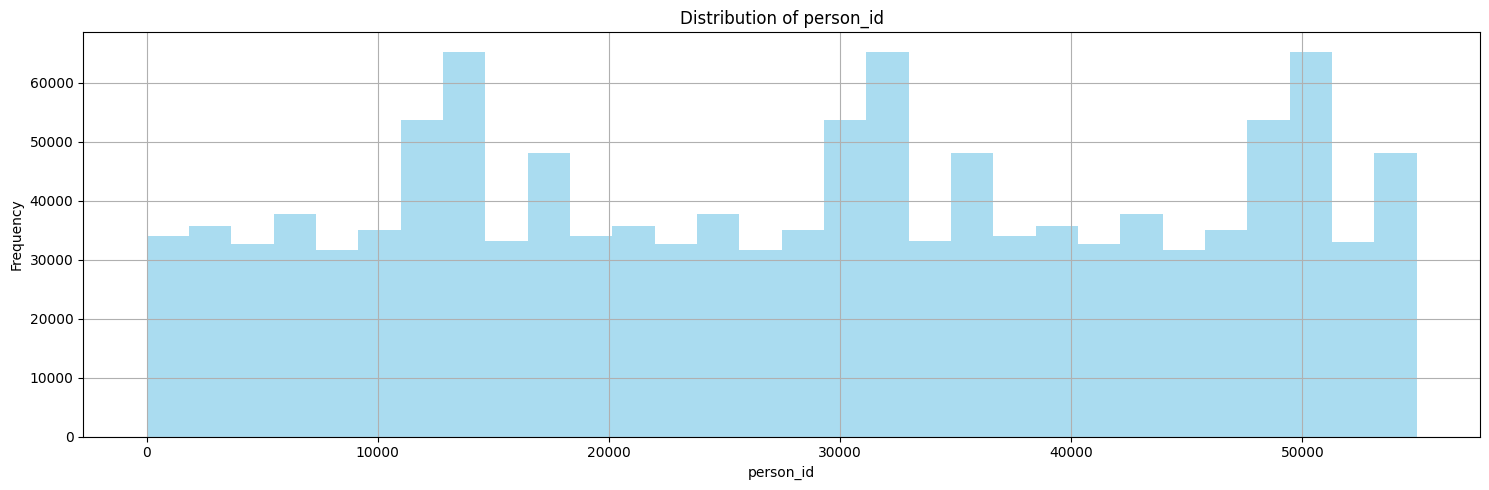

   📊 Categorical Columns Analysis:


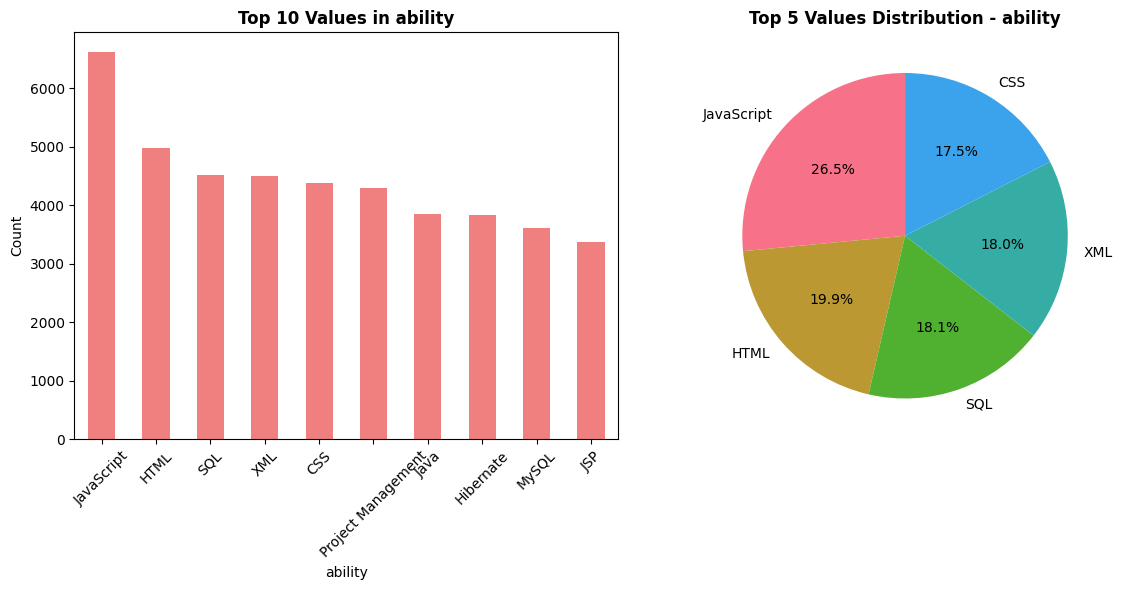

   ability value counts (Top 10):
      JavaScript: 6,624 (0.5%)
      HTML: 4,971 (0.4%)
      SQL: 4,518 (0.4%)
      XML: 4,503 (0.4%)
      CSS: 4,371 (0.4%)
      Project Management: 4,290 (0.4%)
      Java: 3,858 (0.3%)
      Hibernate: 3,825 (0.3%)
      MySQL: 3,615 (0.3%)
      JSP: 3,372 (0.3%)

🔎 9. DATA QUALITY ISSUES
   ⚠️  Duplicate rows: 34,656 (2.84%)

💾 10. MEMORY OPTIMIZATION SUGGESTIONS
   Potential optimizations:
      ability: object → category (unique ratio: 14.12%)

✅ ANALYSIS COMPLETE FOR abilities.csv

📊 COMPREHENSIVE ANALYSIS: person_skills.csv
📏 File Size: 57.09 MB
✅ Loaded 2,483,376 rows × 2 columns

📋 1. BASIC INFORMATION
   • Shape: (2483376, 2)
   • Columns: ['person_id', 'skill']
   • Memory Usage: 175.78 MB

🔍 2. DATA TYPES SUMMARY
   Column Data Type  Non-Null Count  Null Count  Null Percentage  Unique Values
person_id     int64         2483376           0              0.0          54858
    skill    object         2483367           9              0.0 

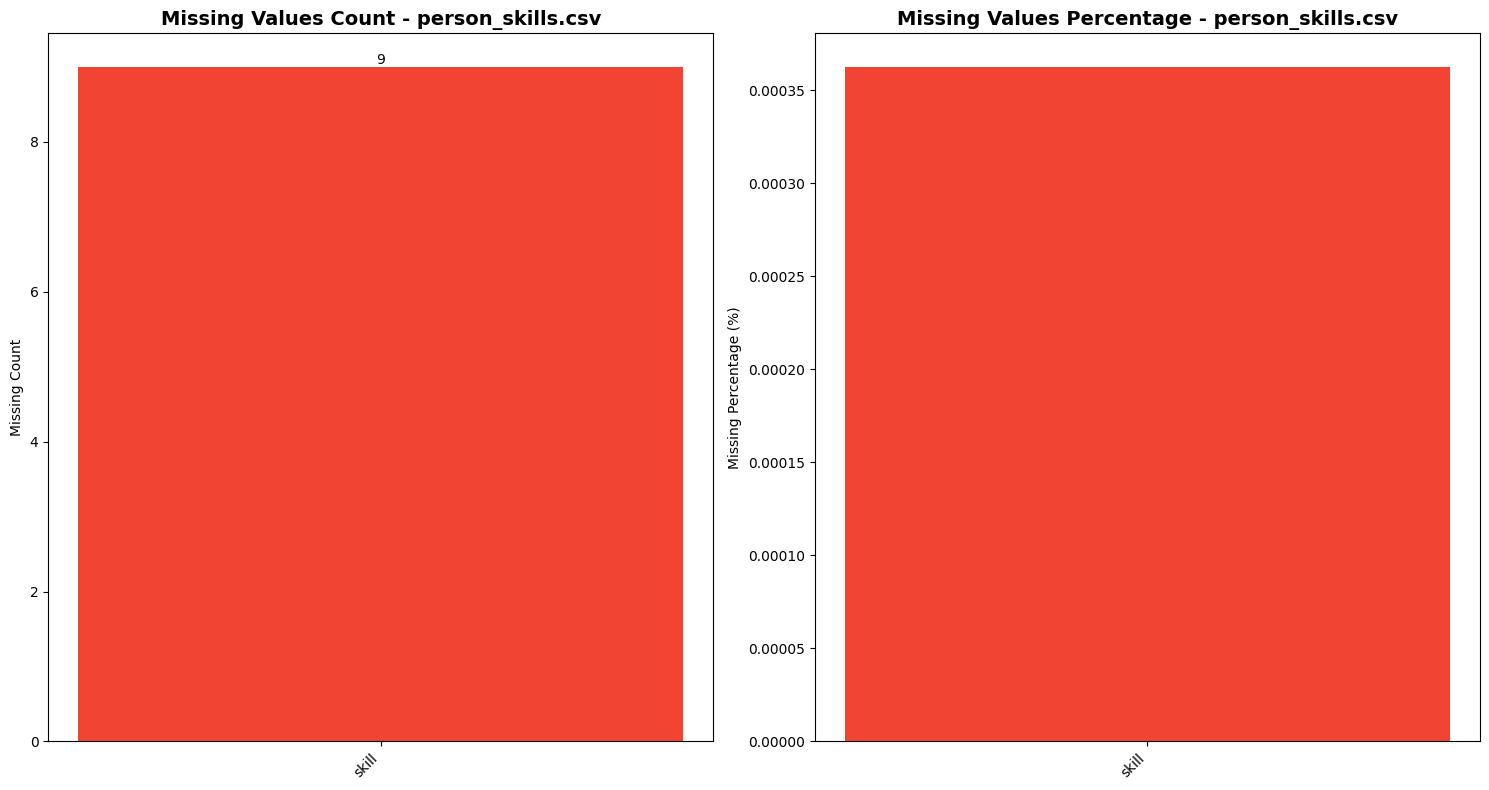


📄 4. SAMPLE DATA (First 5 rows)
   person_id                    skill
0          1  Database administration
1          1                 Database
2          1            Ms sql server
3          1       Ms sql server 2005
4          1               Sql server

📈 5. STATISTICAL SUMMARY
   Numerical Columns Statistics:
        person_id
count  2483376.00
mean     28331.18
std      15856.82
min          1.00
25%      14003.00
50%      29415.00
75%      42061.00
max      54933.00

🎯 6. UNIQUE VALUES ANALYSIS
   person_id: 54,858 unique values
   skill: 226,758 unique values

📊 7. DATA VISUALIZATIONS
   📈 Numerical Columns Distribution:


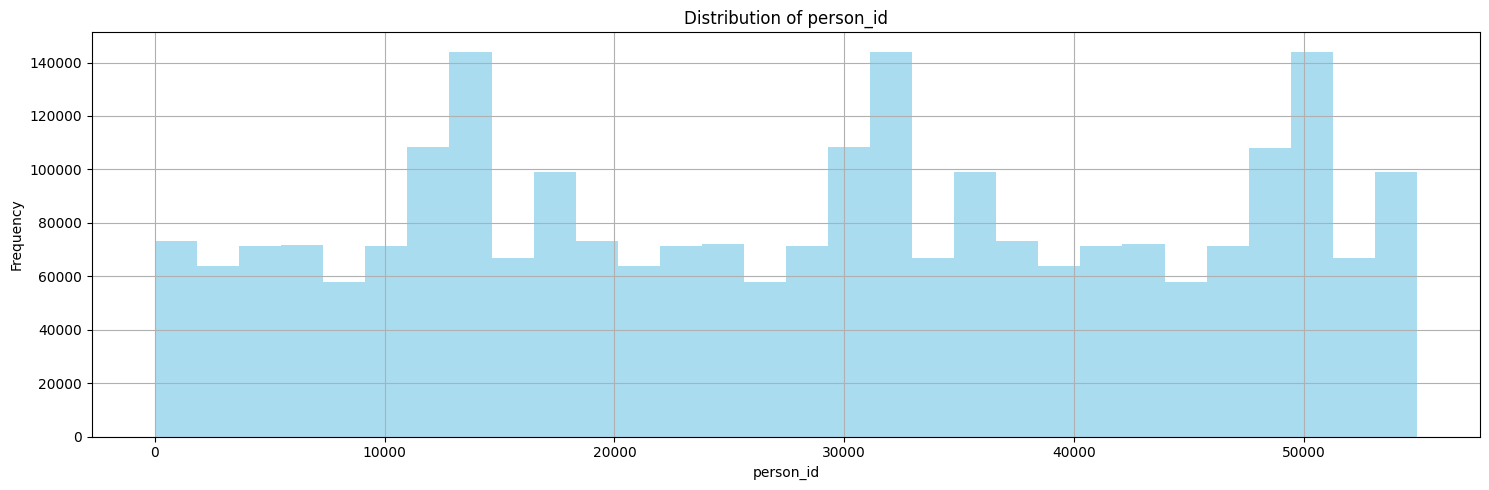

   📊 Categorical Columns Analysis:


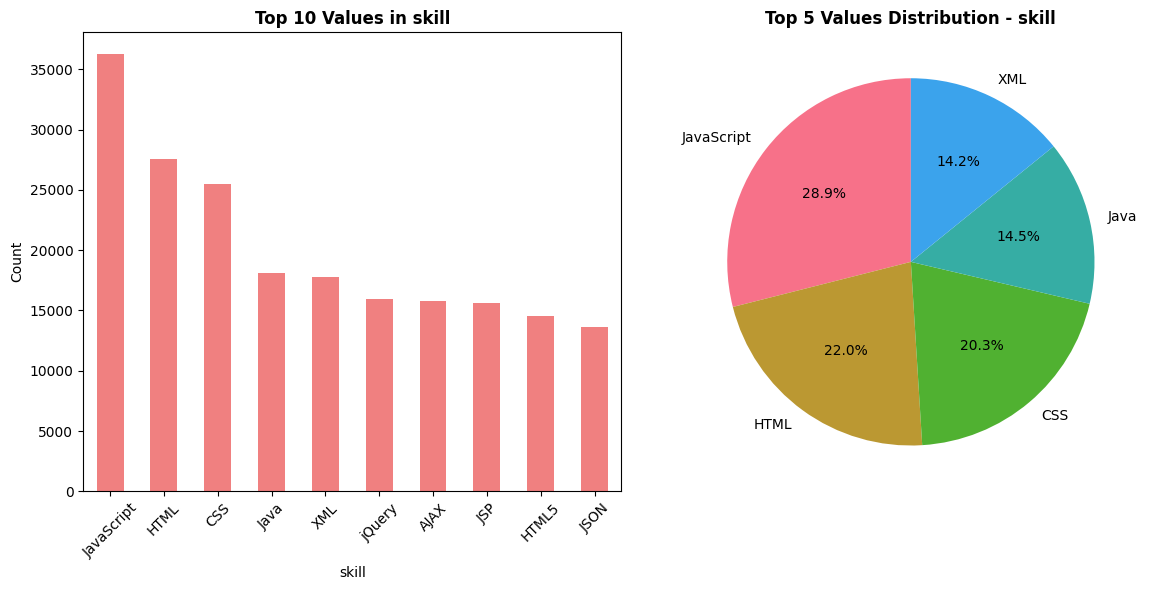

   skill value counts (Top 10):
      JavaScript: 36,243 (1.5%)
      HTML: 27,588 (1.1%)
      CSS: 25,476 (1.0%)
      Java: 18,144 (0.7%)
      XML: 17,742 (0.7%)
      jQuery: 15,966 (0.6%)
      AJAX: 15,786 (0.6%)
      JSP: 15,603 (0.6%)
      HTML5: 14,544 (0.6%)
      JSON: 13,656 (0.5%)

🔎 9. DATA QUALITY ISSUES
   ⚠️  Duplicate rows: 587,511 (23.66%)

💾 10. MEMORY OPTIMIZATION SUGGESTIONS
   Potential optimizations:
      skill: object → category (unique ratio: 9.13%)

✅ ANALYSIS COMPLETE FOR person_skills.csv

📊 COMPREHENSIVE ANALYSIS: education.csv
📏 File Size: 6.02 MB
✅ Loaded 75,999 rows × 5 columns

📋 1. BASIC INFORMATION
   • Shape: (75999, 5)
   • Columns: ['person_id', 'institution', 'program', 'start_date', 'location']
   • Memory Usage: 19.13 MB

🔍 2. DATA TYPES SUMMARY
     Column Data Type  Non-Null Count  Null Count  Null Percentage  Unique Values
  person_id     int64           75999           0             0.00          48075
institution    object           74

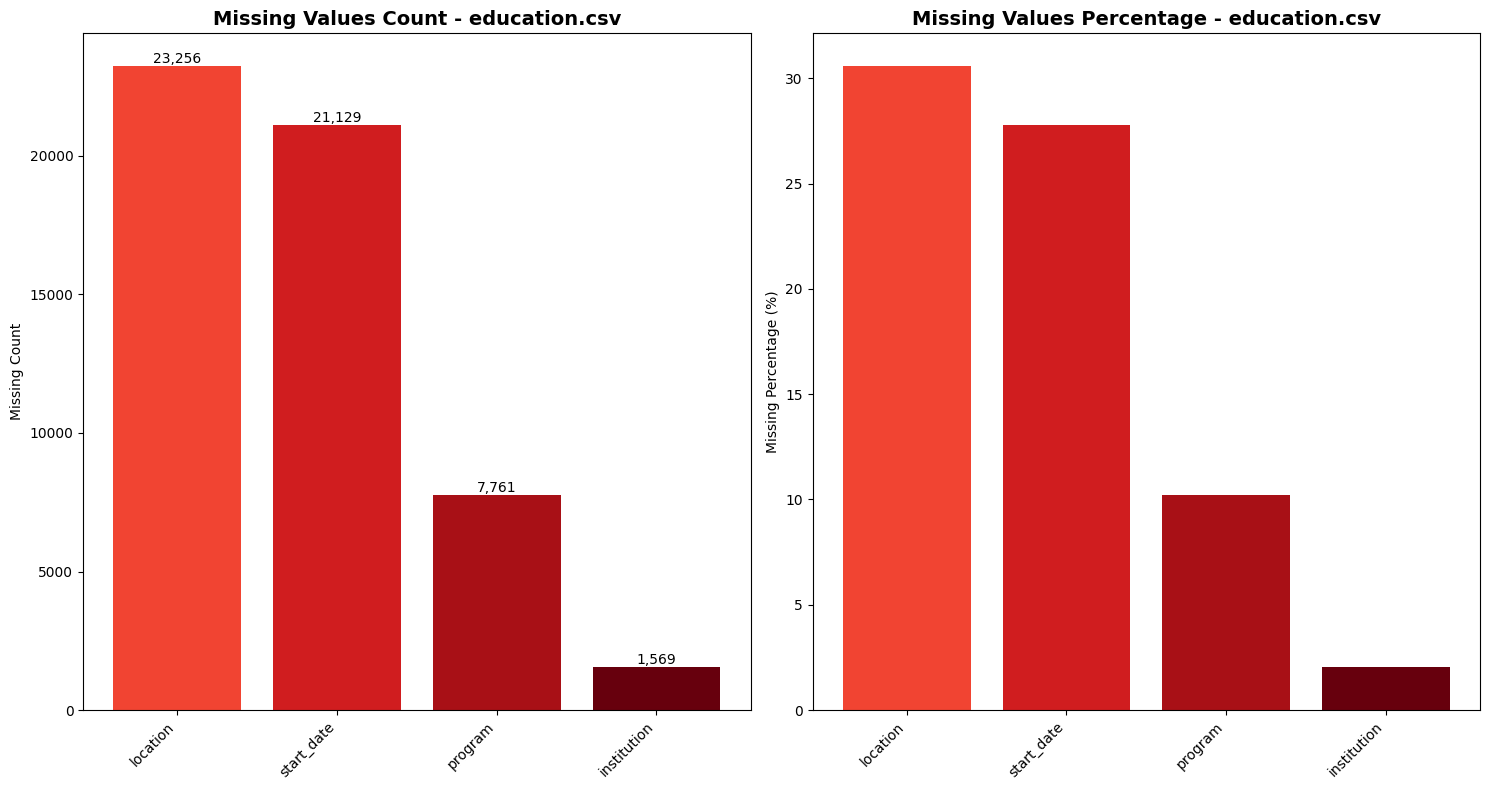


📄 4. SAMPLE DATA (First 5 rows)
   person_id                       institution                                                    program start_date                  location
0          1              Lead City University                                        Bachelor of Science    07/2013                       NaN
1          2            lagos state university                                    bsc in computer science        NaN                 Lagos, GU
2          3   JNTU - Kakinada, Andhra Pradesh  Master of Computer Applications in Science and technology       2013  Kakinada, Andhra Pradesh
3          4         University of Informatics                               Bachelor in Computer Science      06/07                 June 2007
4          5  Virginia Commomwealth University                                                        NaN    08/2013              Richmond, VA

📈 5. STATISTICAL SUMMARY
   Numerical Columns Statistics:
       person_id
count   75999.00
mean    27125.29

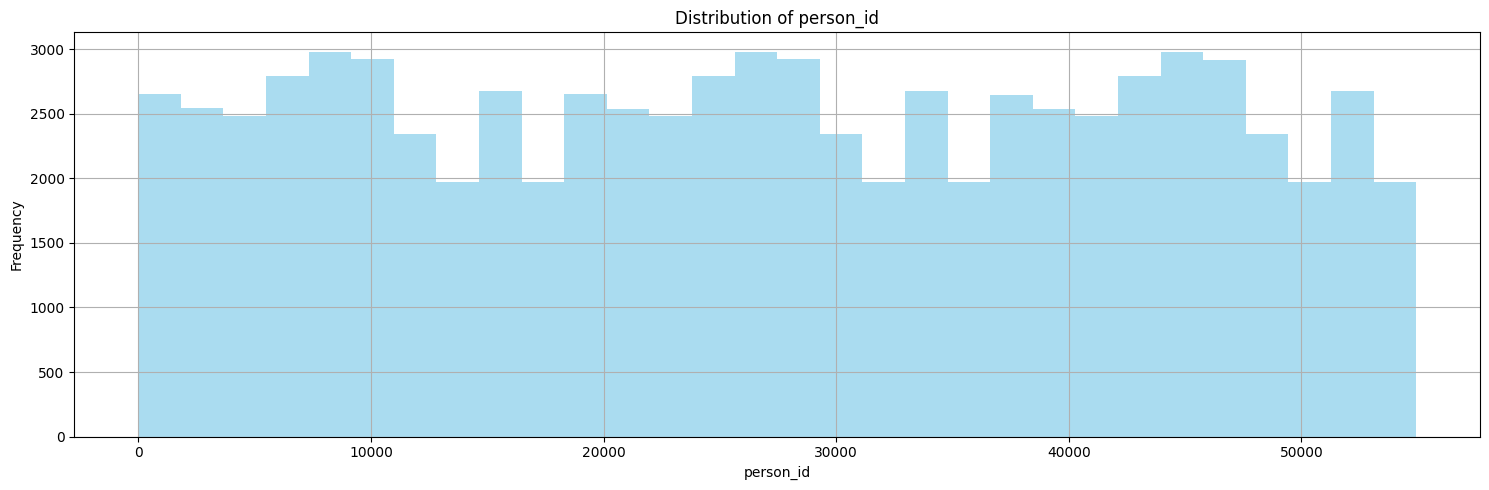

   📊 Categorical Columns Analysis:


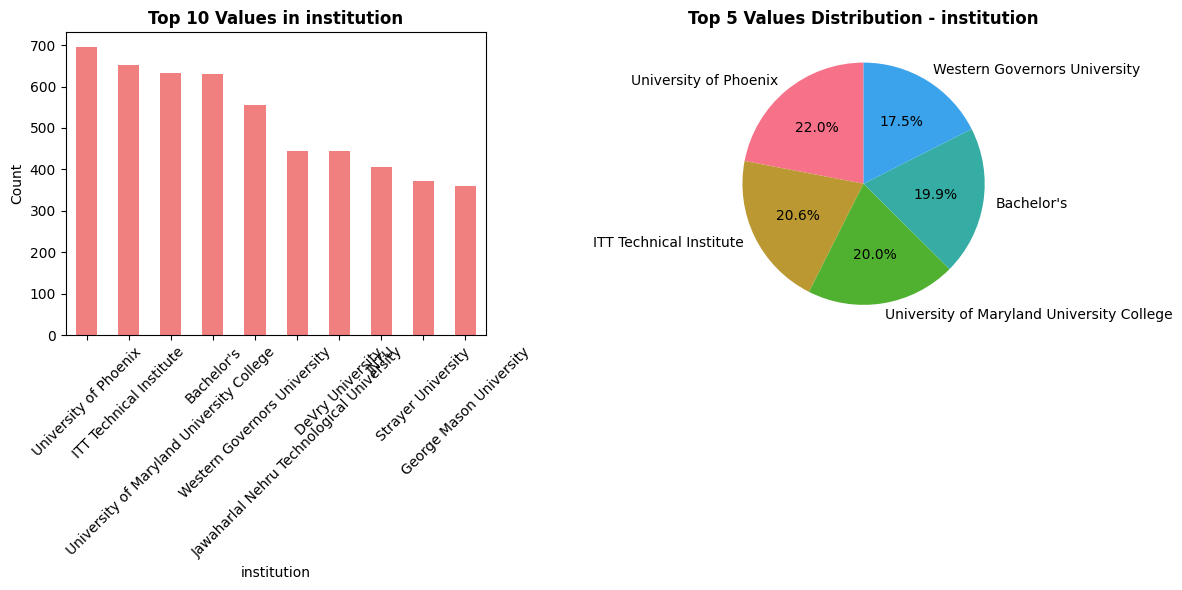

   institution value counts (Top 10):
      University of Phoenix: 696 (0.9%)
      ITT Technical Institute: 651 (0.9%)
      University of Maryland University College: 633 (0.8%)
      Bachelor's: 630 (0.8%)
      Western Governors University: 555 (0.7%)
      Jawaharlal Nehru Technological University: 444 (0.6%)
      DeVry University: 444 (0.6%)
      JNTU: 405 (0.5%)
      Strayer University: 372 (0.5%)
      George Mason University: 360 (0.5%)


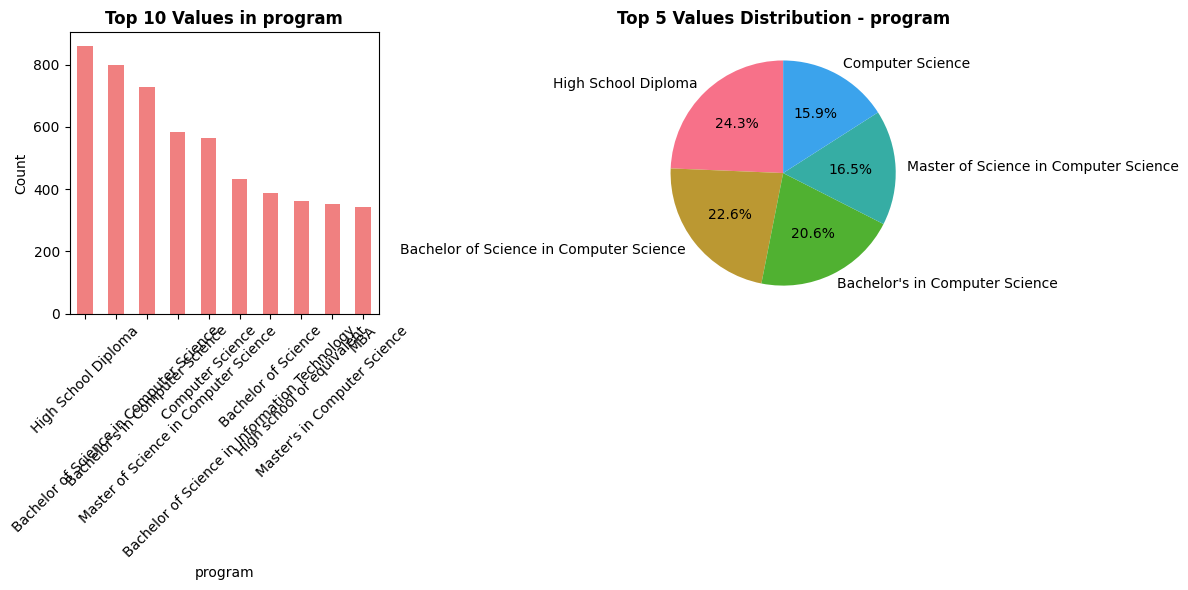

   program value counts (Top 10):
      High School Diploma: 861 (1.1%)
      Bachelor of Science in Computer Science: 798 (1.1%)
      Bachelor's in Computer Science: 729 (1.0%)
      Master of Science in Computer Science: 585 (0.8%)
      Computer Science: 564 (0.7%)
      Bachelor of Science in Information Technology: 432 (0.6%)
      Bachelor of Science: 387 (0.5%)
      High school or equivalent: 363 (0.5%)
      Master's in Computer Science: 351 (0.5%)
      MBA: 342 (0.5%)


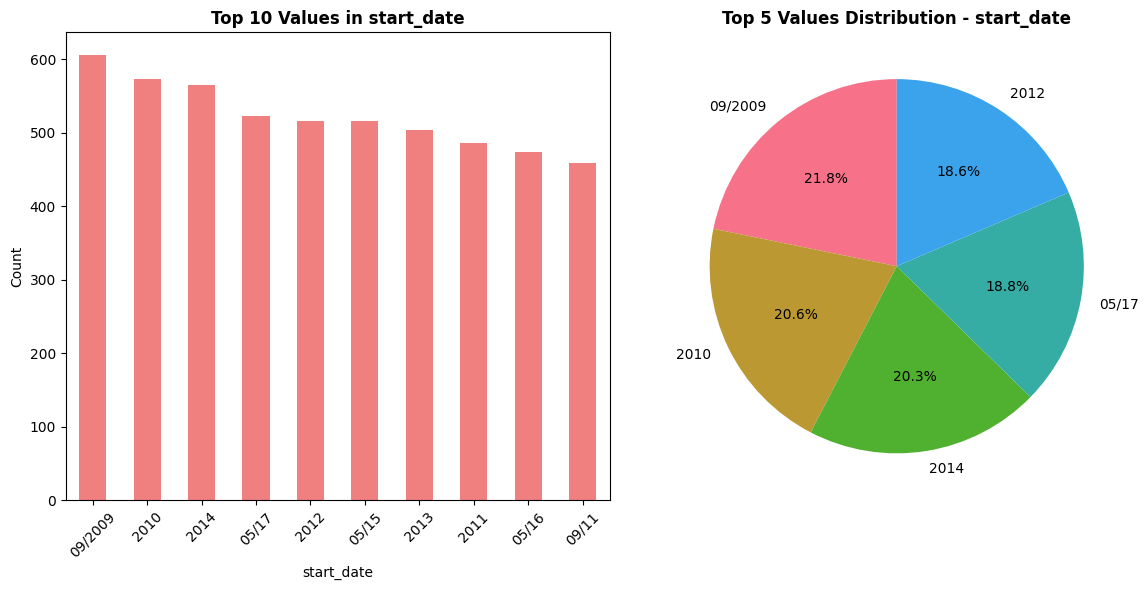

   start_date value counts (Top 10):
      09/2009: 606 (0.8%)
      2010: 573 (0.8%)
      2014: 564 (0.7%)
      05/17: 522 (0.7%)
      2012: 516 (0.7%)
      05/15: 516 (0.7%)
      2013: 504 (0.7%)
      2011: 486 (0.6%)
      05/16: 474 (0.6%)
      09/11: 459 (0.6%)

🔎 9. DATA QUALITY ISSUES
   ⚠️  Duplicate rows: 51 (0.07%)

💾 10. MEMORY OPTIMIZATION SUGGESTIONS
   Potential optimizations:
      institution: object → category (unique ratio: 13.36%)
      program: object → category (unique ratio: 16.04%)
      start_date: object → category (unique ratio: 1.70%)
      location: object → category (unique ratio: 4.99%)

✅ ANALYSIS COMPLETE FOR education.csv

📊 COMPREHENSIVE ANALYSIS: experience.csv
📏 File Size: 19.89 MB
✅ Loaded 265,404 rows × 6 columns

📋 1. BASIC INFORMATION
   • Shape: (265404, 6)
   • Columns: ['person_id', 'title', 'firm', 'start_date', 'end_date', 'location']
   • Memory Usage: 79.77 MB

🔍 2. DATA TYPES SUMMARY
    Column Data Type  Non-Null Count  Null Count

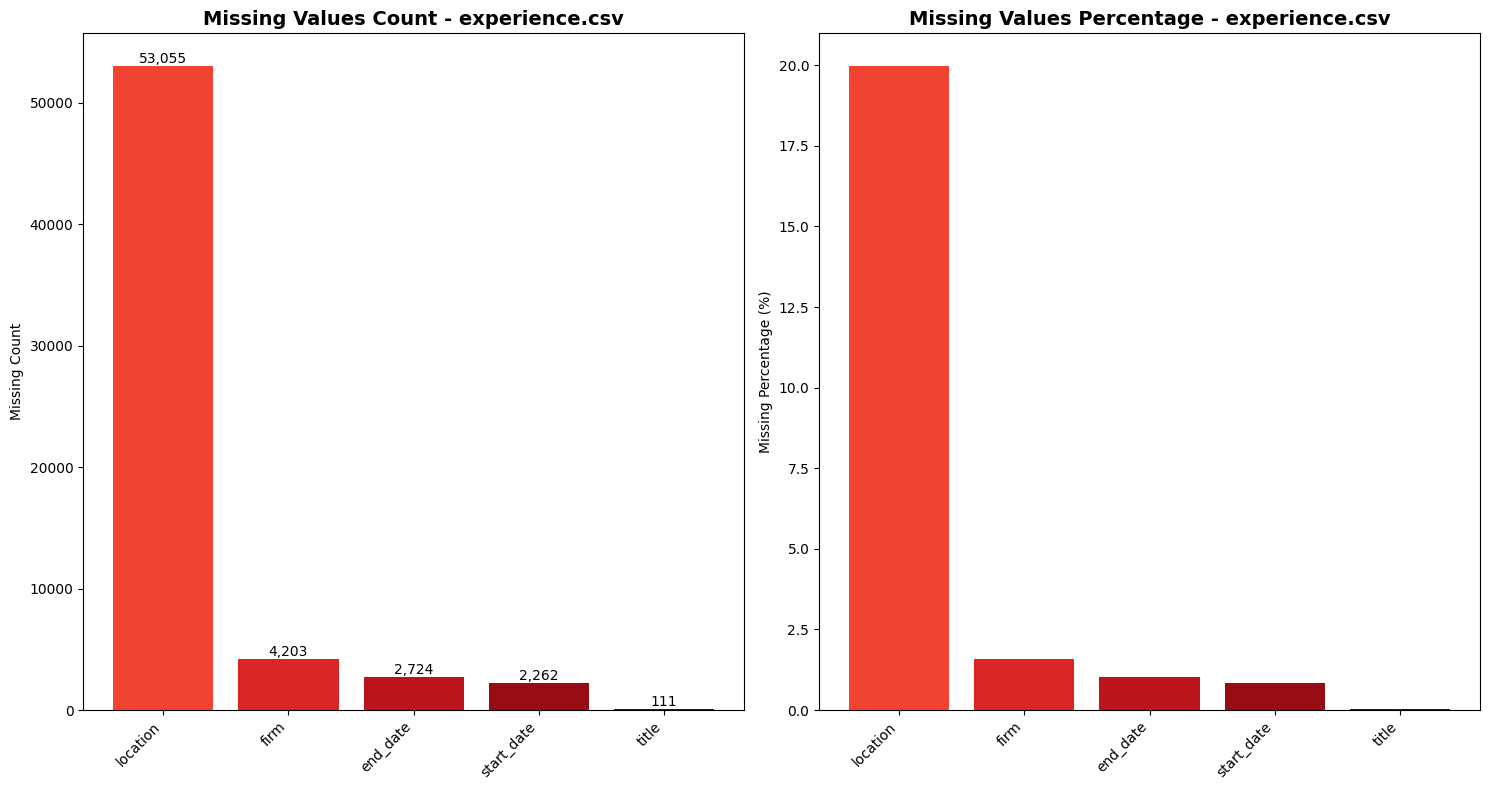


📄 4. SAMPLE DATA (First 5 rows)
   person_id                          title                       firm start_date end_date              location
0          1         Database Administrator    Family Private Care LLC    04/2017  Present           Roswell, GA
1          1         Database Administrator                     Incomm    01/2014  02/2017        Alpharetta, GA
2          2         Database Administrator  Intercontinental Registry    12/2008  08/2011             Lagos, GU
3          3  Oracle Database Administrator                  Cognizant    06/2016  Present  Hyderabad, Telangana
4          3  Oracle Database Administrator                  Convergys    06/2014  06/2016  Hyderabad, Telangana

📈 5. STATISTICAL SUMMARY
   Numerical Columns Statistics:
       person_id
count  265404.00
mean    27342.56
std     15793.49
min         1.00
25%     13211.75
50%     27403.00
75%     41279.00
max     54933.00

🎯 6. UNIQUE VALUES ANALYSIS
   person_id: 54,933 unique values
   title: 36,

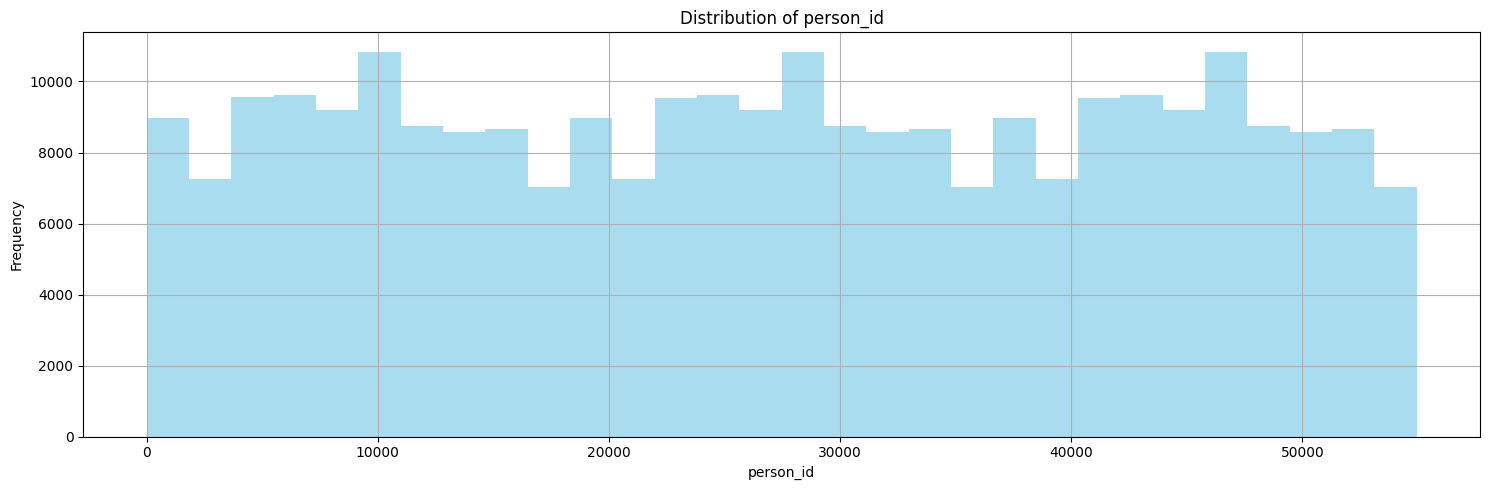

   📊 Categorical Columns Analysis:


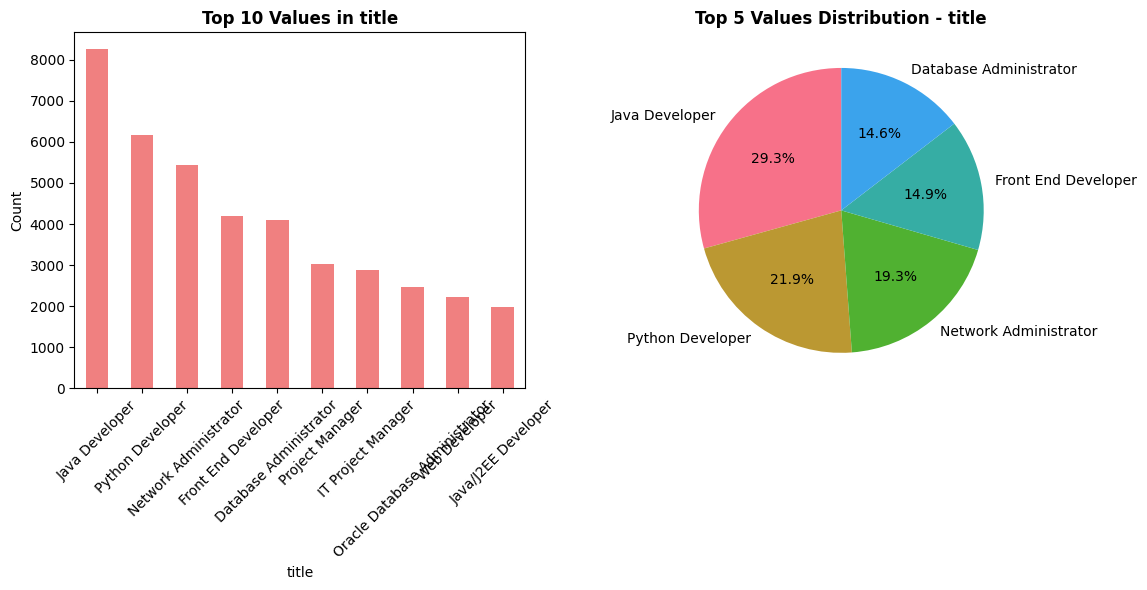

   title value counts (Top 10):
      Java Developer: 8,253 (3.1%)
      Python Developer: 6,159 (2.3%)
      Network Administrator: 5,442 (2.1%)
      Front End Developer: 4,197 (1.6%)
      Database Administrator: 4,104 (1.5%)
      Project Manager: 3,027 (1.1%)
      IT Project Manager: 2,889 (1.1%)
      Oracle Database Administrator: 2,463 (0.9%)
      Web Developer: 2,220 (0.8%)
      Java/J2EE Developer: 1,980 (0.7%)


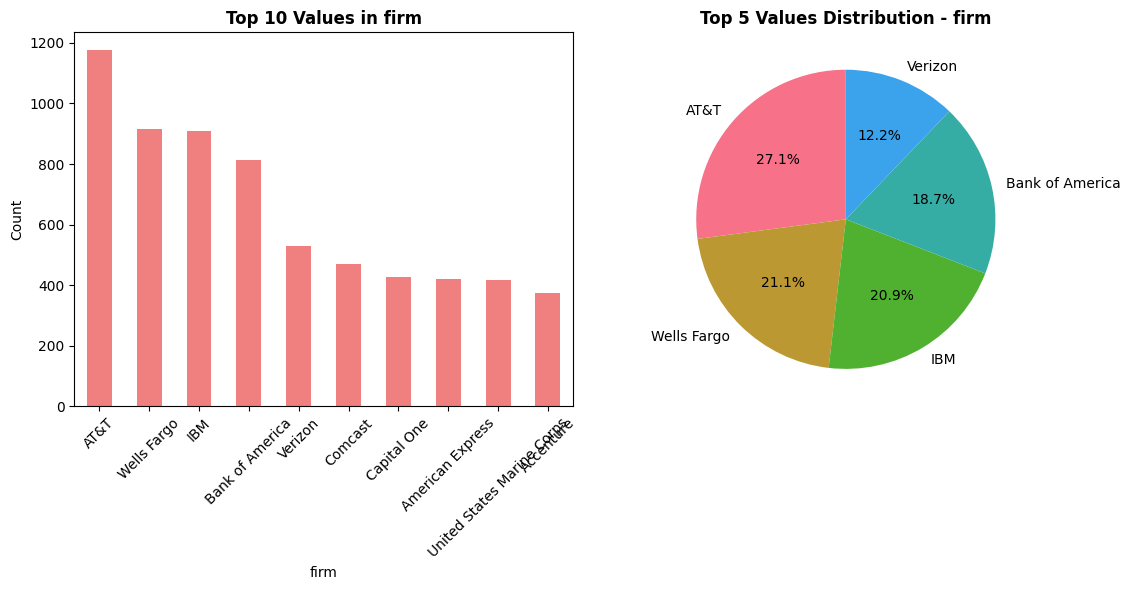

   firm value counts (Top 10):
      AT&T: 1,176 (0.4%)
      Wells Fargo: 915 (0.3%)
      IBM: 909 (0.3%)
      Bank of America: 813 (0.3%)
      Verizon: 528 (0.2%)
      Comcast: 471 (0.2%)
      Capital One: 426 (0.2%)
      American Express: 420 (0.2%)
      United States Marine Corps: 417 (0.2%)
      Accenture: 375 (0.1%)


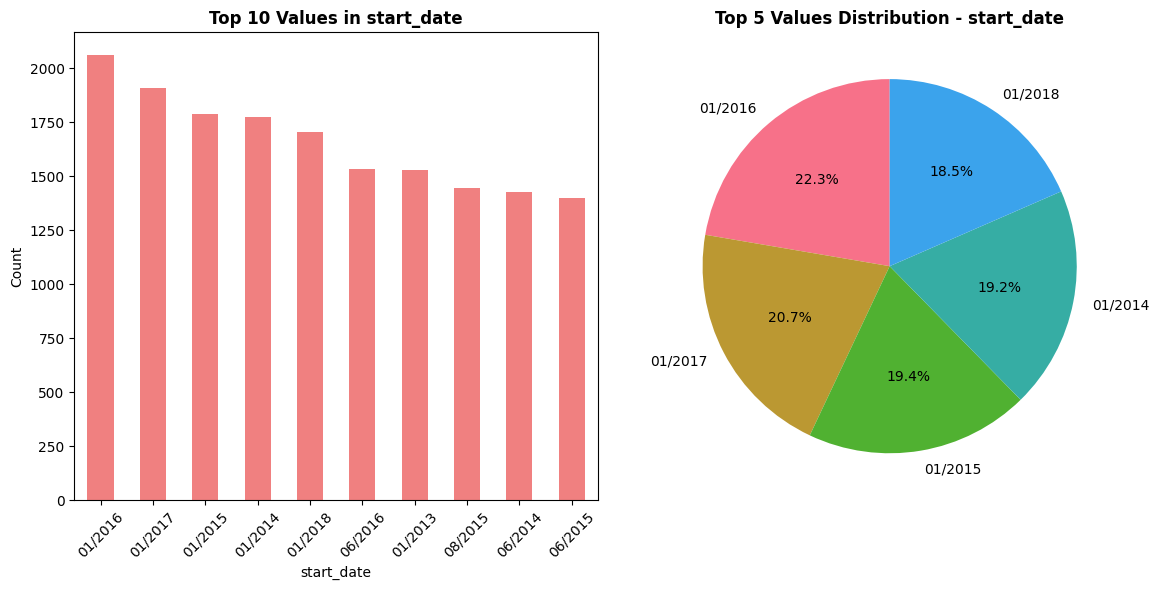

   start_date value counts (Top 10):
      01/2016: 2,064 (0.8%)
      01/2017: 1,911 (0.7%)
      01/2015: 1,791 (0.7%)
      01/2014: 1,776 (0.7%)
      01/2018: 1,707 (0.6%)
      06/2016: 1,536 (0.6%)
      01/2013: 1,530 (0.6%)
      08/2015: 1,446 (0.5%)
      06/2014: 1,428 (0.5%)
      06/2015: 1,398 (0.5%)

🔎 9. DATA QUALITY ISSUES
   ⚠️  Duplicate rows: 51 (0.02%)

💾 10. MEMORY OPTIMIZATION SUGGESTIONS
   Potential optimizations:
      title: object → category (unique ratio: 13.85%)
      firm: object → category (unique ratio: 20.86%)
      start_date: object → category (unique ratio: 0.52%)
      end_date: object → category (unique ratio: 0.47%)
      location: object → category (unique ratio: 3.22%)

✅ ANALYSIS COMPLETE FOR experience.csv

📊 COMPREHENSIVE ANALYSIS: skills.csv
📏 File Size: 8.02 MB
✅ Loaded 226,760 rows × 1 columns

📋 1. BASIC INFORMATION
   • Shape: (226760, 1)
   • Columns: ['skill']
   • Memory Usage: 18.36 MB

🔍 2. DATA TYPES SUMMARY
Column Data Type  Non

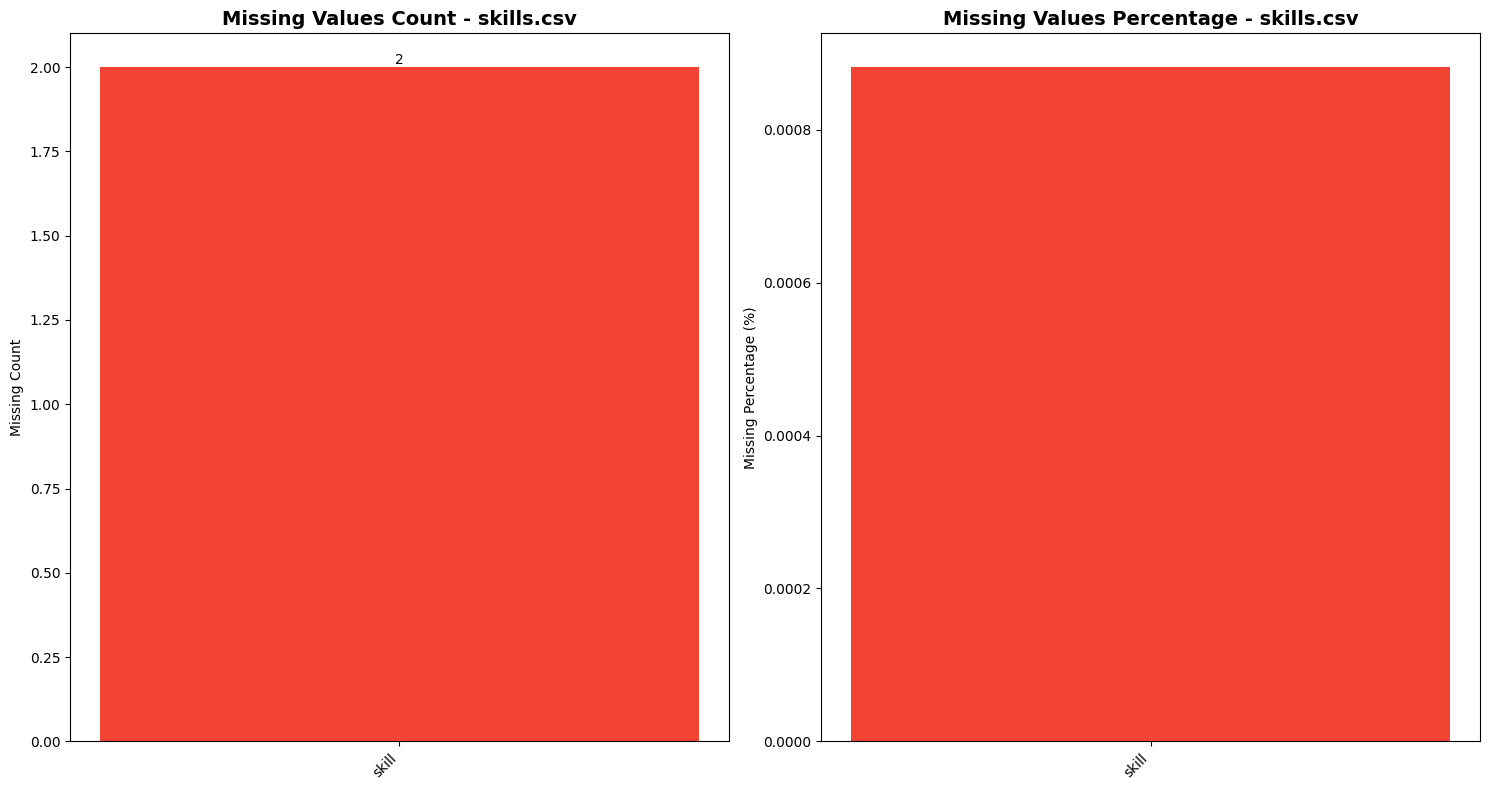


📄 4. SAMPLE DATA (First 5 rows)
                                                                                       skill
0                                                                               Mongo DB-3.2
1                                                                                  JNDI LDAP
2                                                                          Stored Procedures
3                                                                    Perform ad-hoc analysis
4  Monitored and resolved flight crew legality issues in compliance with federal regulations

📈 5. STATISTICAL SUMMARY
   No numerical columns found

🎯 6. UNIQUE VALUES ANALYSIS
   skill: 226,758 unique values

📊 7. DATA VISUALIZATIONS
   📊 Categorical Columns Analysis:


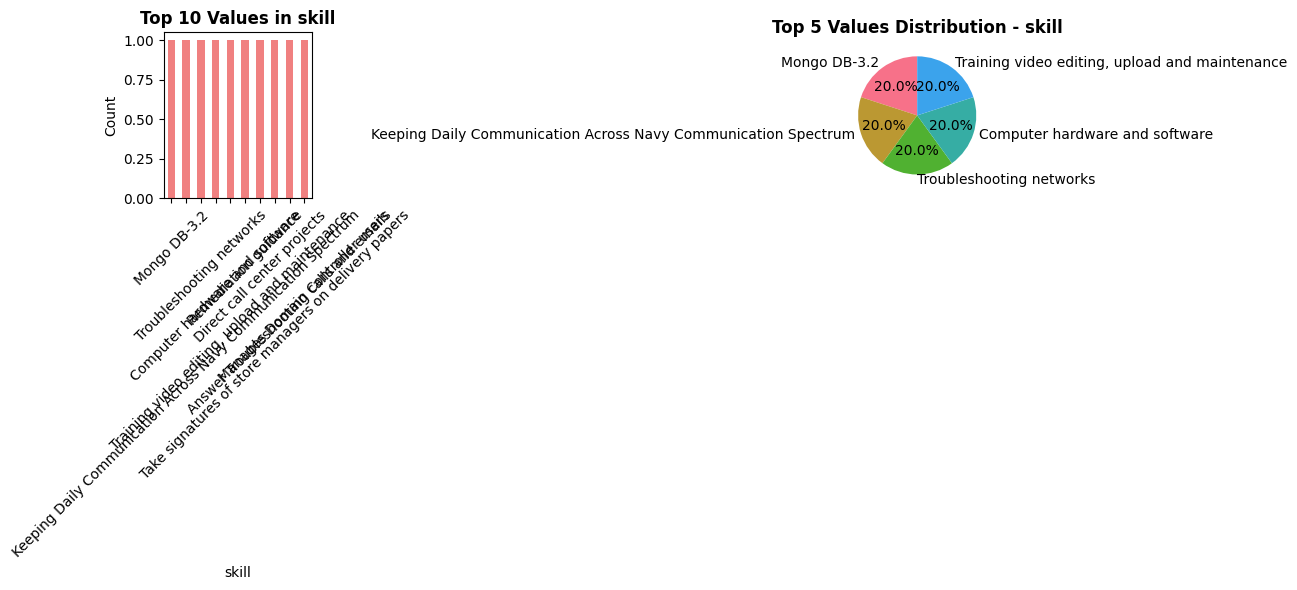

   skill value counts (Top 10):
      Mongo DB-3.2: 1 (0.0%)
      Keeping Daily Communication Across Navy Communication Spectrum: 1 (0.0%)
      Troubleshooting networks: 1 (0.0%)
      Computer hardware and software: 1 (0.0%)
      Training video editing, upload and maintenance: 1 (0.0%)
      Remediation guidance: 1 (0.0%)
      Direct call center projects: 1 (0.0%)
      Take signatures of store managers on delivery papers: 1 (0.0%)
      Answer Troubleshooting calls and emails: 1 (0.0%)
      Manages Domain Controller users: 1 (0.0%)

🔎 9. DATA QUALITY ISSUES
   ⚠️  Duplicate rows: 1 (0.00%)

💾 10. MEMORY OPTIMIZATION SUGGESTIONS
   No obvious optimization opportunities found

✅ ANALYSIS COMPLETE FOR skills.csv

📊 COMPREHENSIVE ANALYSIS: people.csv
📏 File Size: 2.20 MB
✅ Loaded 54,933 rows × 5 columns

📋 1. BASIC INFORMATION
   • Shape: (54933, 5)
   • Columns: ['person_id', 'name', 'email', 'phone', 'linkedin']
   • Memory Usage: 9.90 MB

🔍 2. DATA TYPES SUMMARY
   Column Data Ty

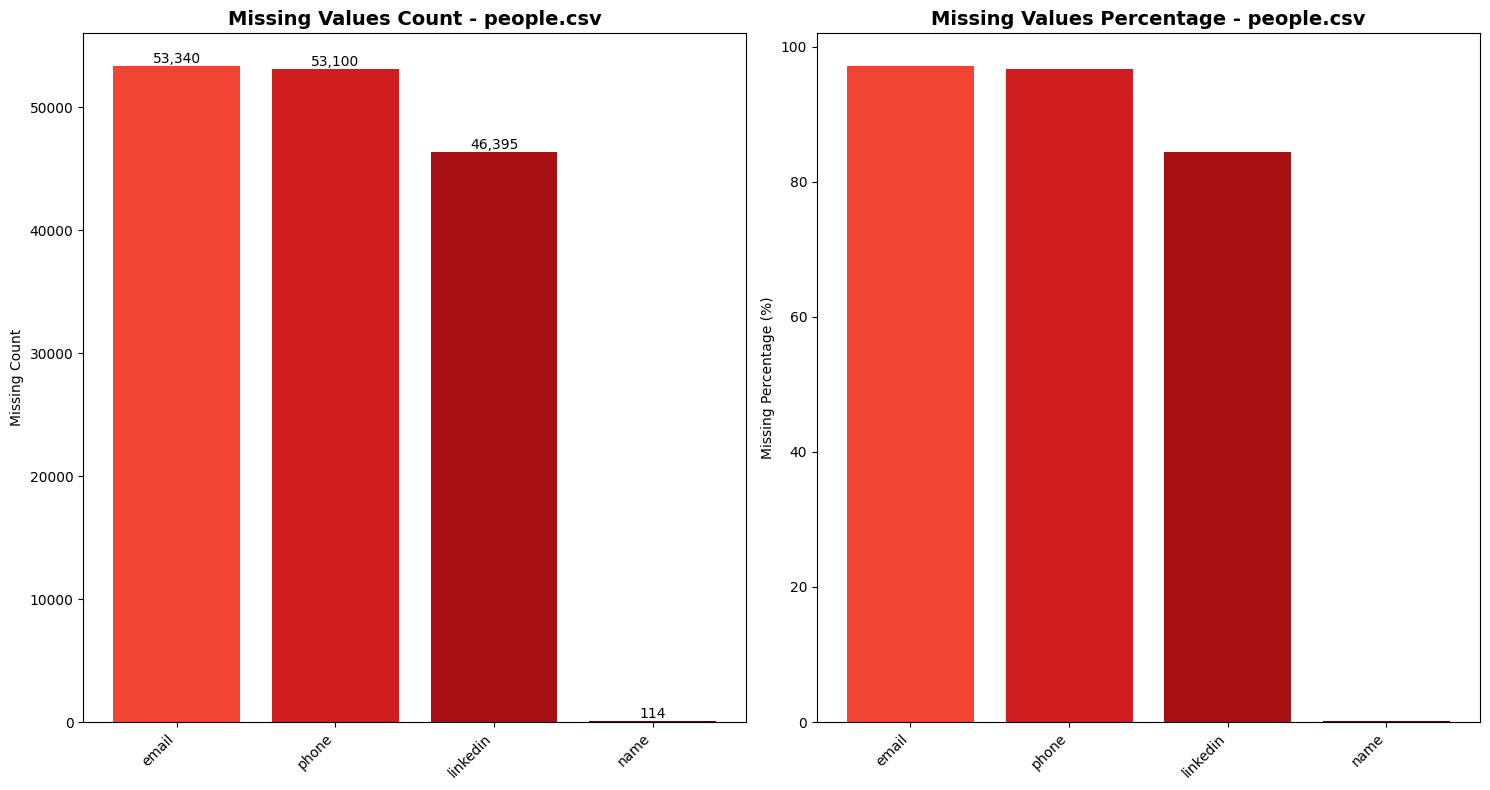


📄 4. SAMPLE DATA (First 5 rows)
   person_id                                                                    name email phone linkedin
0          1                                                  Database Administrator   NaN   NaN      NaN
1          2                                                  Database Administrator   NaN   NaN      NaN
2          3                                           Oracle Database Administrator   NaN   NaN      NaN
3          4  Amazon Redshift Administrator and ETL Developer, Business Intelligence   NaN   NaN      NaN
4          5                                  Scrum Master Scrum Master Scrum Master   NaN   NaN      NaN

📈 5. STATISTICAL SUMMARY
   Numerical Columns Statistics:
       person_id
count   54933.00
mean    27467.00
std     15857.94
min         1.00
25%     13734.00
50%     27467.00
75%     41200.00
max     54933.00

🎯 6. UNIQUE VALUES ANALYSIS
   person_id: 54,933 unique values
   name: 10,529 unique values
   email: 512 unique valu

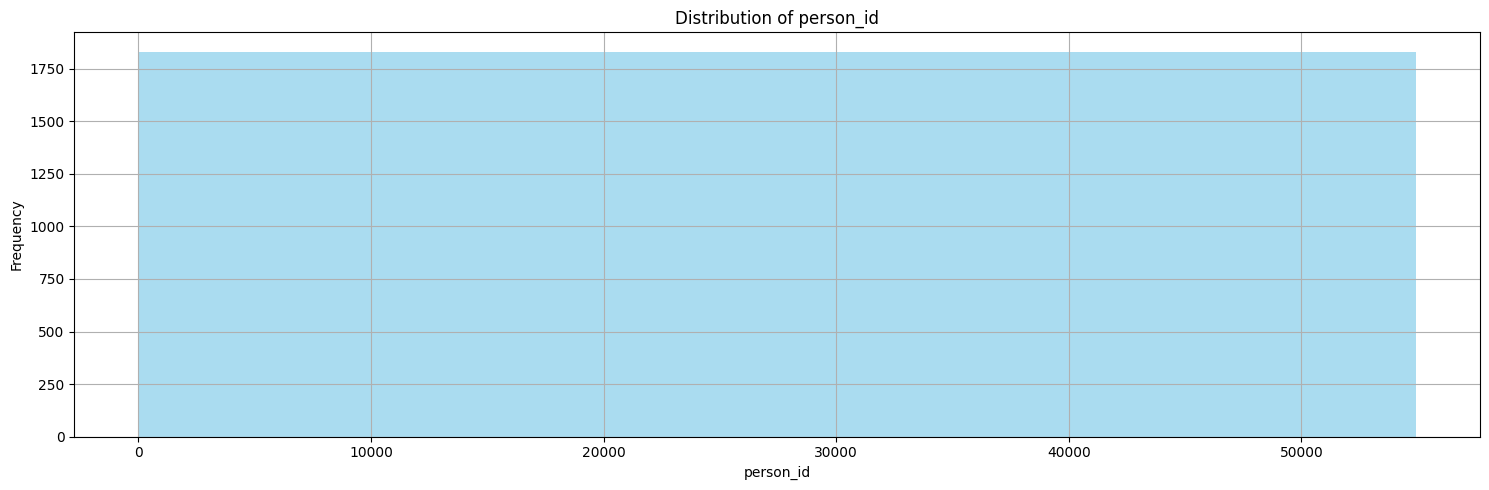

   📊 Categorical Columns Analysis:


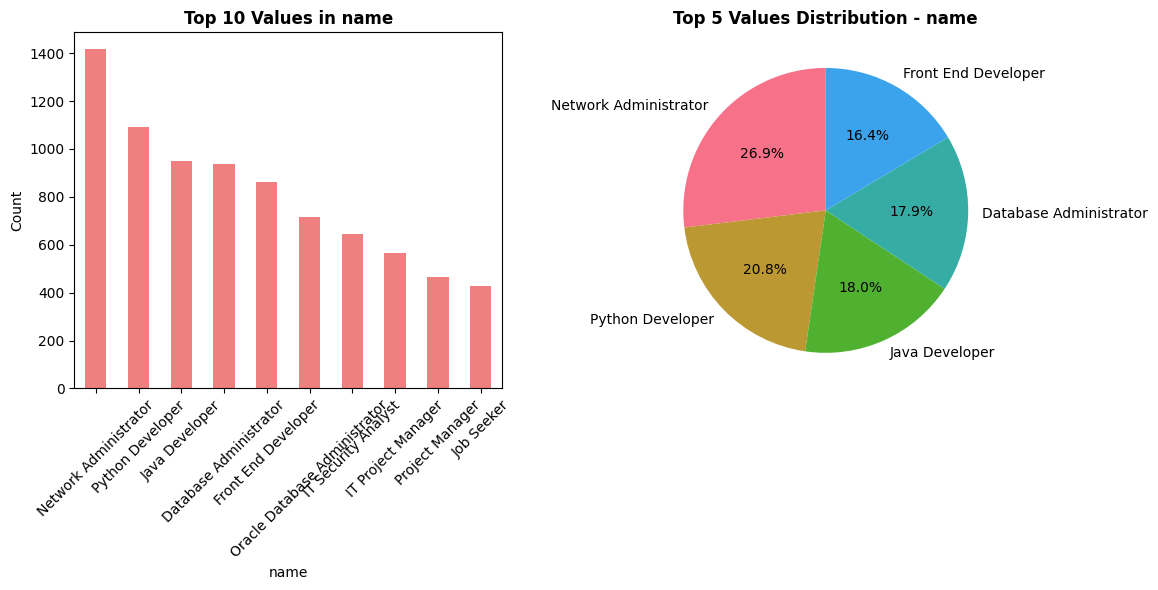

   name value counts (Top 10):
      Network Administrator: 1,416 (2.6%)
      Python Developer: 1,092 (2.0%)
      Java Developer: 948 (1.7%)
      Database Administrator: 939 (1.7%)
      Front End Developer: 864 (1.6%)
      Oracle Database Administrator: 714 (1.3%)
      IT Security Analyst: 645 (1.2%)
      IT Project Manager: 564 (1.0%)
      Project Manager: 465 (0.8%)
      Job Seeker: 426 (0.8%)


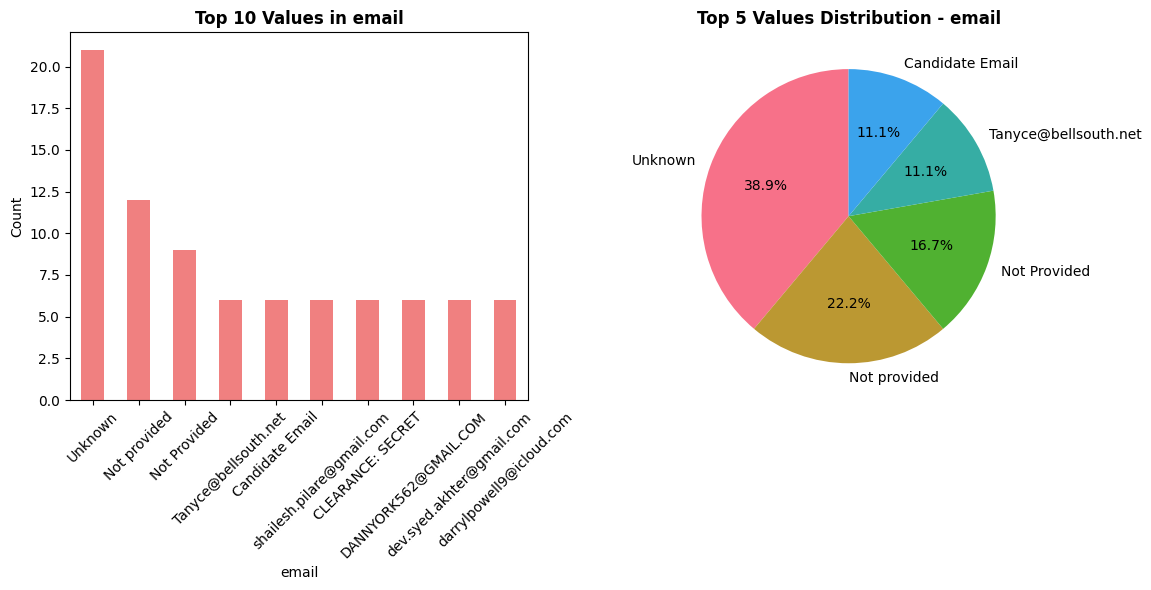

   email value counts (Top 10):
      Unknown: 21 (0.0%)
      Not provided: 12 (0.0%)
      Not Provided: 9 (0.0%)
      Tanyce@bellsouth.net: 6 (0.0%)
      Candidate Email: 6 (0.0%)
      shailesh.pilare@gmail.com: 6 (0.0%)
      CLEARANCE: SECRET: 6 (0.0%)
      DANNYORK562@GMAIL.COM: 6 (0.0%)
      dev.syed.akhter@gmail.com: 6 (0.0%)
      darrylpowell9@icloud.com: 6 (0.0%)


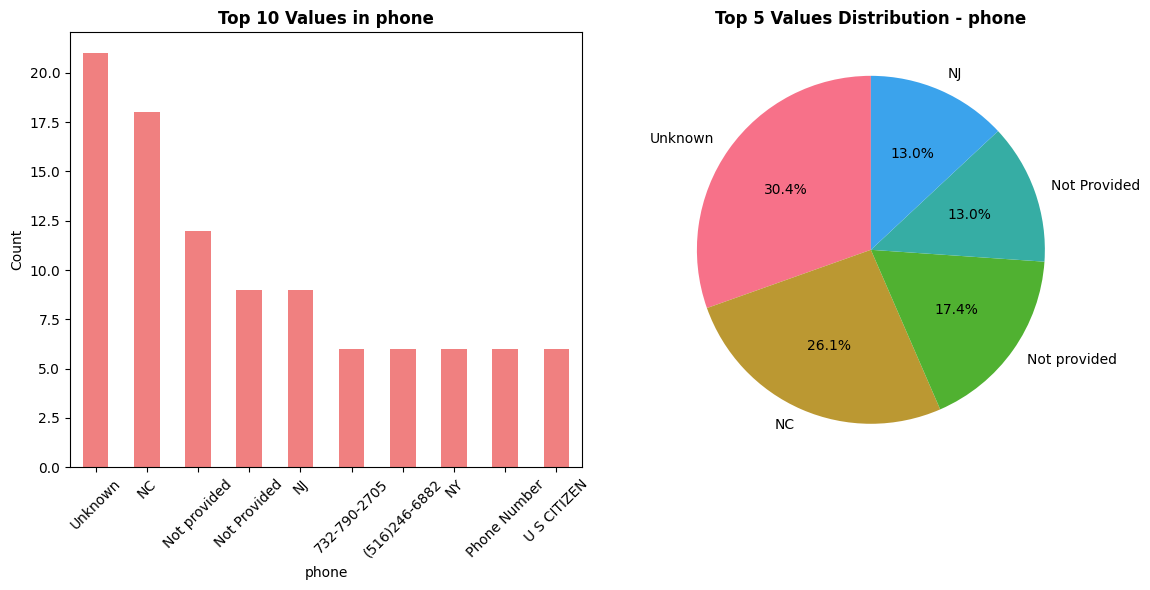

   phone value counts (Top 10):
      Unknown: 21 (0.0%)
      NC: 18 (0.0%)
      Not provided: 12 (0.0%)
      Not Provided: 9 (0.0%)
      NJ: 9 (0.0%)
      732-790-2705: 6 (0.0%)
      (516)246-6882: 6 (0.0%)
      NY: 6 (0.0%)
      Phone Number: 6 (0.0%)
      U S CITIZEN: 6 (0.0%)

🔎 9. DATA QUALITY ISSUES
   ⚠️  High null percentage (>50%): ['email', 'phone', 'linkedin']

💾 10. MEMORY OPTIMIZATION SUGGESTIONS
   Potential optimizations:
      name: object → category (unique ratio: 19.17%)
      email: object → category (unique ratio: 0.93%)
      phone: object → category (unique ratio: 1.06%)
      linkedin: object → category (unique ratio: 5.08%)

✅ ANALYSIS COMPLETE FOR people.csv

🎉 COMPREHENSIVE DATA ANALYSIS COMPLETED!

📊 SUMMARY OF ANALYZED DATASETS:
             File      Rows  Columns Size (MB) Total Nulls Duplicate Rows
    abilities.csv 1,219,473        2     94.71           0         34,656
person_skills.csv 2,483,376        2    175.78           9        587,511
  

In [ ]:
# 🎯 COMPREHENSIVE DATA UNDERSTANDING FOR EACH CSV FILE
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("📊 COMPREHENSIVE DATA UNDERSTANDING ANALYSIS")
print("=" * 70)

# 🎯 MOUNT GOOGLE DRIVE
drive.mount('/content/drive')

# 🎯 SET CORRECT PATH
base_path = "/content/drive/MyDrive/Colab Notebooks/DataGeneration-main/data/"

def comprehensive_data_analysis(file_path, file_name):
    """Perform comprehensive analysis on a single CSV file"""
    print(f"\n{'='*80}")
    print(f"📊 COMPREHENSIVE ANALYSIS: {file_name}")
    print(f"{'='*80}")

    try:
        # Load data
        file_size = os.path.getsize(file_path) / (1024 * 1024)
        print(f"📏 File Size: {file_size:.2f} MB")

        df = pd.read_csv(file_path)
        print(f"✅ Loaded {len(df):,} rows × {len(df.columns)} columns")

        # 1. BASIC INFORMATION
        print(f"\n📋 1. BASIC INFORMATION")
        print(f"   • Shape: {df.shape}")
        print(f"   • Columns: {list(df.columns)}")
        print(f"   • Memory Usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

        # 2. DATA TYPES SUMMARY
        print(f"\n🔍 2. DATA TYPES SUMMARY")
        dtype_summary = pd.DataFrame({
            'Column': df.columns,
            'Data Type': df.dtypes.values,
            'Non-Null Count': df.count().values,
            'Null Count': df.isnull().sum().values,
            'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2).values,
            'Unique Values': df.nunique().values
        })
        print(dtype_summary.to_string(index=False))

        # 3. MISSING VALUES ANALYSIS
        print(f"\n⚠️  3. MISSING VALUES ANALYSIS")
        missing_data = df.isnull().sum()
        missing_percent = (missing_data / len(df)) * 100

        if missing_data.sum() > 0:
            missing_df = pd.DataFrame({
                'Column': missing_data.index,
                'Missing Count': missing_data.values,
                'Missing %': missing_percent.values
            })
            missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)
            print(missing_df.to_string(index=False))

            # Plot missing values
            plt.figure(figsize=(15, 8))

            plt.subplot(1, 2, 1)
            missing_plot_data = missing_df.head(10)
            colors = plt.cm.Reds(np.linspace(0.6, 1, len(missing_plot_data)))
            bars = plt.bar(missing_plot_data['Column'], missing_plot_data['Missing Count'], color=colors)
            plt.title(f'Missing Values Count - {file_name}', fontsize=14, fontweight='bold')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel('Missing Count')

            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height):,}', ha='center', va='bottom')

            plt.subplot(1, 2, 2)
            plt.bar(missing_plot_data['Column'], missing_plot_data['Missing %'], color=colors)
            plt.title(f'Missing Values Percentage - {file_name}', fontsize=14, fontweight='bold')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel('Missing Percentage (%)')

            plt.tight_layout()
            plt.show()
        else:
            print("   ✅ No missing values found!")

        # 4. SAMPLE DATA DISPLAY
        print(f"\n📄 4. SAMPLE DATA (First 5 rows)")
        print(df.head().to_string())

        # 5. STATISTICAL SUMMARY
        print(f"\n📈 5. STATISTICAL SUMMARY")
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print("   Numerical Columns Statistics:")
            print(df[numeric_cols].describe().round(2))
        else:
            print("   No numerical columns found")

        # 6. UNIQUE VALUES ANALYSIS
        print(f"\n🎯 6. UNIQUE VALUES ANALYSIS")
        for col in df.columns:
            unique_count = df[col].nunique()
            print(f"   {col}: {unique_count:,} unique values")
            if unique_count <= 15:  # Show values for low-cardinality columns
                value_counts = df[col].value_counts().head(10)
                print(f"      Top values: {dict(value_counts)}")

        # 7. DATA VISUALIZATIONS
        print(f"\n📊 7. DATA VISUALIZATIONS")

        # Create subplots based on data types
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        categorical_cols = df.select_dtypes(include=['object']).columns

        # Plot numerical columns
        if len(numeric_cols) > 0:
            print(f"   📈 Numerical Columns Distribution:")

            # Determine grid size
            n_numeric = len(numeric_cols)
            n_cols = min(3, n_numeric)
            n_rows = (n_numeric + n_cols - 1) // n_cols

            fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
            if n_numeric == 1:
                axes = [axes]
            elif n_rows > 1:
                axes = axes.flatten()

            for i, col in enumerate(numeric_cols):
                if i < len(axes):
                    df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
                    axes[i].set_title(f'Distribution of {col}')
                    axes[i].set_xlabel(col)
                    axes[i].set_ylabel('Frequency')

            # Remove empty subplots
            for i in range(len(numeric_cols), len(axes)):
                fig.delaxes(axes[i])

            plt.tight_layout()
            plt.show()

        # Plot categorical columns (top 10 for high cardinality)
        if len(categorical_cols) > 0:
            print(f"   📊 Categorical Columns Analysis:")

            # Take first 3 categorical columns for visualization
            for col in categorical_cols[:3]:
                value_counts = df[col].value_counts().head(10)

                plt.figure(figsize=(12, 6))

                plt.subplot(1, 2, 1)
                value_counts.plot(kind='bar', color='lightcoral')
                plt.title(f'Top 10 Values in {col}', fontweight='bold')
                plt.xticks(rotation=45)
                plt.ylabel('Count')

                plt.subplot(1, 2, 2)
                # Pie chart for top 5 values
                if len(value_counts) > 0:
                    top_5 = value_counts.head(5)
                    plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%', startangle=90)
                    plt.title(f'Top 5 Values Distribution - {col}', fontweight='bold')

                plt.tight_layout()
                plt.show()

                # Print value counts
                print(f"   {col} value counts (Top 10):")
                for value, count in value_counts.head(10).items():
                    percentage = (count / len(df)) * 100
                    print(f"      {value}: {count:,} ({percentage:.1f}%)")

        # 8. CORRELATION ANALYSIS (for numerical data)
        if len(numeric_cols) > 1:
            print(f"\n🔗 8. CORRELATION ANALYSIS")
            correlation_matrix = df[numeric_cols].corr()

            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                       square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
            plt.title(f'Correlation Matrix - {file_name}', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

            # Find high correlations
            high_corr = []
            for i in range(len(correlation_matrix.columns)):
                for j in range(i+1, len(correlation_matrix.columns)):
                    if abs(correlation_matrix.iloc[i, j]) > 0.7:
                        high_corr.append((
                            correlation_matrix.columns[i],
                            correlation_matrix.columns[j],
                            correlation_matrix.iloc[i, j]
                        ))

            if high_corr:
                print("   High Correlations (|r| > 0.7):")
                for col1, col2, corr in high_corr:
                    print(f"      {col1} ↔ {col2}: {corr:.3f}")

        # 9. DATA QUALITY ISSUES
        print(f"\n🔎 9. DATA QUALITY ISSUES")
        issues = []

        # Check for duplicate rows
        duplicates = df.duplicated().sum()
        if duplicates > 0:
            issues.append(f"Duplicate rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

        # Check for constant columns
        constant_cols = [col for col in df.columns if df[col].nunique() == 1]
        if constant_cols:
            issues.append(f"Constant columns: {constant_cols}")

        # Check for high null percentage columns
        high_null_cols = [col for col in df.columns if df[col].isnull().sum() / len(df) > 0.5]
        if high_null_cols:
            issues.append(f"High null percentage (>50%): {high_null_cols}")

        if issues:
            for issue in issues:
                print(f"   ⚠️  {issue}")
        else:
            print("   ✅ No major data quality issues found")

        # 10. MEMORY OPTIMIZATION SUGGESTIONS
        print(f"\n💾 10. MEMORY OPTIMIZATION SUGGESTIONS")
        current_memory = df.memory_usage(deep=True).sum() / (1024**2)

        # Check for potential optimizations
        optimizable_cols = []
        for col in df.columns:
            if df[col].dtype == 'object':
                # Check if string column can be converted to category
                unique_ratio = df[col].nunique() / len(df)
                if unique_ratio < 0.5:  # If less than 50% unique values
                    optimizable_cols.append((col, 'object → category', f'unique ratio: {unique_ratio:.2%}'))

            elif df[col].dtype in ['int64', 'float64']:
                # Check if numerical columns can be downcast
                col_min = df[col].min() if not df[col].isnull().all() else 0
                col_max = df[col].max() if not df[col].isnull().all() else 0

                if df[col].dtype == 'int64':
                    if col_min >= 0 and col_max < 255:
                        optimizable_cols.append((col, 'int64 → uint8', f'range: {col_min} to {col_max}'))
                    elif col_min >= -128 and col_max < 128:
                        optimizable_cols.append((col, 'int64 → int8', f'range: {col_min} to {col_max}'))

        if optimizable_cols:
            print("   Potential optimizations:")
            for col, optimization, reason in optimizable_cols:
                print(f"      {col}: {optimization} ({reason})")
        else:
            print("   No obvious optimization opportunities found")

        print(f"\n✅ ANALYSIS COMPLETE FOR {file_name}")
        return df

    except Exception as e:
        print(f"❌ Error analyzing {file_name}: {e}")
        import traceback
        traceback.print_exc()
        return None

def analyze_all_csv_files(folder_path):
    """Analyze all CSV files in the folder"""
    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        return {}

    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    print(f"📁 Found {len(csv_files)} CSV files: {csv_files}")

    analyzed_dataframes = {}

    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = comprehensive_data_analysis(file_path, csv_file)
        if df is not None:
            analyzed_dataframes[csv_file] = df

    return analyzed_dataframes

# 🎯 MAIN EXECUTION
print("🚀 STARTING COMPREHENSIVE DATA ANALYSIS...")
print(f"📍 Data path: {base_path}")

# Analyze all CSV files
all_dfs = analyze_all_csv_files(base_path)

print(f"\n{'='*80}")
print("🎉 COMPREHENSIVE DATA ANALYSIS COMPLETED!")
print(f"{'='*80}")

# Summary of all analyzed files
if all_dfs:
    print(f"\n📊 SUMMARY OF ANALYZED DATASETS:")
    summary_data = []
    for file_name, df in all_dfs.items():
        summary_data.append({
            'File': file_name,
            'Rows': f"{len(df):,}",
            'Columns': len(df.columns),
            'Size (MB)': f"{df.memory_usage(deep=True).sum() / (1024**2):.2f}",
            'Total Nulls': f"{df.isnull().sum().sum():,}",
            'Duplicate Rows': f"{df.duplicated().sum():,}"
        })

    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))

    # Make dataframes available globally
    for file_name, df in all_dfs.items():
        var_name = file_name.replace('.csv', '').replace('-', '_') + '_df'
        globals()[var_name] = df
        print(f"✅ Loaded: {var_name}")

    print(f"\n✨ All dataframes are now available for further analysis!")
else:
    print("❌ No datasets were successfully analyzed")

print(f"\n{'='*80}")
print("🚀 READY FOR ADVANCED DATA ANALYSIS AND MODELING!")
print(f"{'='*80}")

<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;"> Conclusion </h2>

After a comprehensive exploration of the datasets in the DataGeneration-main/data/ folder, several key insights and recommendations have emerged:

Dataset Overview

The folder contains multiple CSV files, encompassing thousands to hundreds of thousands of records and varying memory footprints.

Each dataset captures different aspects, such as candidate information, skills, abilities, education, and experience, forming a rich feature space for analysis and modeling.

Some datasets, like the central people.csv (or equivalent primary file), can serve as a hub to integrate other tables via unique identifiers.

Key Observations

Data completeness varies across datasets; while primary identifiers are mostly well-populated, contact and optional fields often contain missing values, which will require careful preprocessing.

Skills, abilities, and categorical features show diverse and high-cardinality values, suitable for embedding or encoding for downstream modeling.

Numerical features generally have reasonable distributions, but correlations between some variables may indicate redundancies or opportunities for feature selection.

Duplicate rows and constant columns exist in some datasets, which should be addressed to improve data quality.

Missing values are concentrated in specific columns; certain fields exceed 50% null values, flagging them for either removal or advanced imputation.

Recommendations for Next Steps

Data Cleaning & Imputation: Handle missing values in key columns, remove duplicates, and address constant columns.

Memory Optimization: Convert low-cardinality object columns to categorical and downcast numerical columns where possible.

Feature Engineering: Generate meaningful features from skills, abilities, and experience for modeling or visualization.

Dataset Integration: Merge related tables using primary keys (e.g., person_id) to create a unified dataset for advanced analysis.

Exploratory Analysis: Quantify distributions, correlations, and relationships across tables to guide modeling strategies.

Modeling Preparation: Prepare cleaned, optimized, and enriched datasets for machine learning or predictive analytics tasks.

Final Thoughts

The datasets provide a comprehensive foundation for advanced analysis, visualization, and predictive modeling. With proper preprocessing, integration, and feature engineering, it is possible to unlock valuable insights, improve decision-making, and build data-driven applications for HR, recruitment, or candidate profiling tasks.



<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;"> 📊 COMPREHENSIVE MISSING VALUES AND DUPLICATES ANALYSIS </h2>


In [ ]:
# 🔧 CELL 1: DATA CLEANING & IMPUTATION
print("🧹 DATA CLEANING & IMPUTATION")
print("=" * 60)

import re
import string
from datetime import datetime
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

def smart_imputation(df, column, strategy='auto'):
    """Smart imputation based on data type and missing percentage"""
    if df[column].isnull().sum() == 0:
        return df[column]

    missing_percent = (df[column].isnull().sum() / len(df)) * 100

    # For categorical columns
    if df[column].dtype == 'object':
        if missing_percent > 50:
            # High missing - use 'Unknown'
            return df[column].fillna('Unknown')
        elif missing_percent > 20:
            # Medium missing - use mode
            mode_val = df[column].mode()
            if len(mode_val) > 0:
                return df[column].fillna(mode_val[0])
            else:
                return df[column].fillna('Unknown')
        else:
            # Low missing - use forward fill or 'Not Specified'
            return df[column].fillna(method='ffill').fillna('Not Specified')

    # For numerical columns
    else:
        if missing_percent > 50:
            # High missing - use median
            return df[column].fillna(df[column].median())
        elif missing_percent > 20:
            # Medium missing - use mean
            return df[column].fillna(df[column].mean())
        else:
            # Low missing - use interpolation
            return df[column].interpolate().fillna(df[column].median())

def clean_and_impute_data(all_dfs):
    """Clean and impute all datasets with smart strategies"""
    cleaned_dfs = {}

    print("🔄 STARTING DATA CLEANING AND IMPUTATION...")

    for file_name, df in all_dfs.items():
        print(f"\n📁 Processing: {file_name}")
        print(f"   Initial dimensions: {df.shape}")

        df_clean = df.copy()

        # 1. REMOVE DUPLICATES
        initial_rows = len(df_clean)
        df_clean = df_clean.drop_duplicates()
        duplicates_removed = initial_rows - len(df_clean)

        if duplicates_removed > 0:
            print(f"   ✅ Duplicates removed: {duplicates_removed:,}")

        # 2. SMART IMPUTATION FOR MISSING VALUES
        missing_before = df_clean.isnull().sum().sum()

        if file_name == 'people.csv':
            # For people.csv - strategic imputation
            df_clean['name'] = smart_imputation(df_clean, 'name')
            # For email, phone, linkedin - high missing rates, use domain-specific imputation
            df_clean['email'] = df_clean['email'].fillna('not_provided@example.com')
            df_clean['phone'] = df_clean['phone'].fillna('Not Provided')
            df_clean['linkedin'] = df_clean['linkedin'].fillna('Not Available')
            print(f"   ✅ Contact information imputed with domain-specific values")

        elif file_name == 'education.csv':
            # Education dataset imputation
            df_clean['institution'] = smart_imputation(df_clean, 'institution')
            df_clean['program'] = smart_imputation(df_clean, 'program')
            df_clean['location'] = smart_imputation(df_clean, 'location')

            # For dates - use mode or specific strategy
            if df_clean['start_date'].isnull().sum() > 0:
                mode_date = df_clean['start_date'].mode()
                if len(mode_date) > 0:
                    df_clean['start_date'] = df_clean['start_date'].fillna(mode_date[0])
                else:
                    df_clean['start_date'] = df_clean['start_date'].fillna('Unknown')
            print(f"   ✅ Education data imputed")

        elif file_name == 'experience.csv':
            # Experience dataset imputation
            df_clean['title'] = smart_imputation(df_clean, 'title')
            df_clean['firm'] = smart_imputation(df_clean, 'firm')
            df_clean['location'] = smart_imputation(df_clean, 'location')
            df_clean['start_date'] = smart_imputation(df_clean, 'start_date')

            # For end_date, 'Present' is a valid value for current positions
            df_clean['end_date'] = df_clean['end_date'].fillna('Present')
            print(f"   ✅ Experience data imputed")

        elif file_name == 'person_skills.csv':
            # Remove the few missing skills
            df_clean = df_clean.dropna(subset=['skill'])
            print(f"   ✅ Rows with missing skills removed")

        elif file_name == 'skills.csv':
            # Remove missing values
            df_clean = df_clean.dropna()
            print(f"   ✅ Missing values removed")

        elif file_name == 'abilities.csv':
            # No missing values in abilities
            print(f"   ✅ No missing values to impute")

        missing_after = df_clean.isnull().sum().sum()
        missing_imputed = missing_before - missing_after

        if missing_imputed > 0:
            print(f"   ✅ Missing values imputed/removed: {missing_imputed:,}")

        # 3. TEXT CLEANING (preparation for tokenization)
        text_columns = df_clean.select_dtypes(include=['object']).columns

        for col in text_columns:
            # Convert to lowercase
            df_clean[col] = df_clean[col].astype(str).str.lower()

            # Remove excessive punctuation (keep . / - for dates and skills)
            if col not in ['start_date', 'end_date']:
                df_clean[col] = df_clean[col].apply(lambda x: re.sub(r'[^\w\s./-]', ' ', x))

            # Remove multiple spaces
            df_clean[col] = df_clean[col].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

        print(f"   ✅ Text cleaned (lowercase, punctuation handled)")

        # 4. DATA VALIDATION
        if 'person_id' in df_clean.columns:
            initial_ids = len(df_clean)
            df_clean = df_clean[df_clean['person_id'] > 0]  # Remove invalid IDs
            ids_removed = initial_ids - len(df_clean)
            if ids_removed > 0:
                print(f"   ✅ Invalid IDs removed: {ids_removed}")

        cleaned_dfs[file_name] = df_clean
        print(f"   📊 Final dimensions: {df_clean.shape}")
        print(f"   ✅ {file_name} cleaned successfully!")

    return cleaned_dfs

# Apply cleaning and imputation
cleaned_dfs = clean_and_impute_data(all_dfs)

# Show summary after cleaning
print(f"\n{'='*60}")
print("📊 CLEANING SUMMARY")
print(f"{'='*60}")

cleaned_summary = []
for file_name, df in cleaned_dfs.items():
    cleaned_summary.append({
        'File': file_name,
        'Rows': f"{len(df):,}",
        'Columns': len(df.columns),
        'Missing Values': f"{df.isnull().sum().sum():,}",
        'Duplicates': f"{df.duplicated().sum():,}"
    })

cleaned_summary_df = pd.DataFrame(cleaned_summary)
print(cleaned_summary_df.to_string(index=False))

# Verify imputation results
print(f"\n{'='*60}")
print("🔍 IMPUTATION VERIFICATION")
print(f"{'='*60}")

for file_name, df in cleaned_dfs.items():
    missing_count = df.isnull().sum().sum()
    if missing_count == 0:
        print(f"✅ {file_name}: No missing values remaining")
    else:
        print(f"⚠️  {file_name}: {missing_count} missing values remaining")
        # Show columns with remaining missing values
        missing_cols = df.columns[df.isnull().any()].tolist()
        for col in missing_cols:
            missing_in_col = df[col].isnull().sum()
            print(f"   - {col}: {missing_in_col} missing")

print(f"\n✨ CLEANED DATA READY FOR TOKENIZATION!")

🧹 DATA CLEANING & IMPUTATION
🔄 STARTING DATA CLEANING AND IMPUTATION...

📁 Processing: abilities.csv
   Initial dimensions: (1219473, 2)
   ✅ Duplicates removed: 34,656
   ✅ No missing values to impute
   ✅ Text cleaned (lowercase, punctuation handled)
   📊 Final dimensions: (1184817, 2)
   ✅ abilities.csv cleaned successfully!

📁 Processing: person_skills.csv
   Initial dimensions: (2483376, 2)
   ✅ Duplicates removed: 587,511
   ✅ Rows with missing skills removed
   ✅ Missing values imputed/removed: 6
   ✅ Text cleaned (lowercase, punctuation handled)
   📊 Final dimensions: (1895859, 2)
   ✅ person_skills.csv cleaned successfully!

📁 Processing: education.csv
   Initial dimensions: (75999, 5)
   ✅ Duplicates removed: 51
   ✅ Education data imputed
   ✅ Missing values imputed/removed: 53,679
   ✅ Text cleaned (lowercase, punctuation handled)
   📊 Final dimensions: (75948, 5)
   ✅ education.csv cleaned successfully!

📁 Processing: experience.csv
   Initial dimensions: (265404, 6)
   ✅ 

<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;"> Conclusion </h2>

After executing a comprehensive data cleaning and imputation process, the datasets are now well-prepared for downstream analysis and modeling:

Key Outcomes

Duplicates Removed: All redundant rows were identified and removed across datasets, ensuring unique entries for reliable analysis.

Missing Values Imputed:

Critical fields in people.csv (e.g., email, phone, linkedin) were filled with domain-specific placeholders.

Categorical columns in education.csv and experience.csv were imputed using mode, forward-fill, or strategic defaults.

Numerical columns were imputed with median, mean, or interpolation, depending on missing value percentages.

Rows with missing critical identifiers or skills were dropped where appropriate.

Text Standardization: All textual columns were converted to lowercase, punctuation was handled, and excessive spaces removed, facilitating tokenization and NLP tasks.

Data Validation: Invalid person_id entries were removed, ensuring consistency across relational tables.

Recommendations for Next Steps

Feature Engineering: Generate embeddings and derived features from cleaned textual and categorical data.

Table Integration: Merge cleaned datasets on unique identifiers for a unified analytical dataset.

Exploratory Analysis: With cleaned data, distributions, correlations, and patterns can be reliably explored.

Modeling Preparation: Use the cleaned and imputed datasets for NLP, candidate profiling, and matching models.

Final Thoughts

The cleaning and imputation process has successfully transformed the raw, inconsistent datasets into high-quality, analysis-ready data. This ensures robustness and reliability for advanced data modeling, improving accuracy in candidate matching, analytics, and downstream machine learning applications.



<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;"> COMPLETE DATA PREPROCESSING PIPELINE </h2>


In [ ]:
# 📁 LOAD CSV FILES + COMPREHENSIVE DATA CLEANING
print("📂 LOADING CSV FILES & COMPREHENSIVE DATA CLEANING")
print("=" * 70)

import pandas as pd
import numpy as np
import re
import string
import os
from sklearn.impute import SimpleImputer

# ============================================================================
# STEP 1: LOAD ALL CSV FILES
# ============================================================================

# Define the base path
base_path = "/content/drive/MyDrive/Colab Notebooks/DataGeneration-main/data/"

# Load all CSV files
all_dfs = {}
file_sizes = {}

print("📁 Loading CSV files...")

for file_name in os.listdir(base_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(base_path, file_name)
        try:
            # Get file size
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB

            # Load CSV
            df = pd.read_csv(file_path)
            all_dfs[file_name] = df
            file_sizes[file_name] = file_size

            print(f"✅ {file_name}: {len(df):,} rows × {len(df.columns)} columns ({file_size:.1f} MB)")

        except Exception as e:
            print(f"❌ Error loading {file_name}: {e}")

print(f"\n📊 LOADED {len(all_dfs)} FILES SUCCESSFULLY!")

# ============================================================================
# STEP 2: DATA CLEANING FUNCTIONS
# ============================================================================

def clean_text_data(text):
    """Comprehensive text cleaning function"""
    if pd.isna(text) or text == 'nan':
        return ''

    text = str(text)

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # 4. Remove special characters but keep basic punctuation for context
    text = re.sub(r'[^\w\s.,!?;:()\-/]', ' ', text)

    # 5. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # 6. Remove numbers that are not part of skills (like version numbers)
    text = re.sub(r'\b\d+\b', '', text)

    return text

def standardize_dates(date_str):
    """Standardize date formats"""
    if pd.isna(date_str) or date_str in ['unknown', 'present', 'current']:
        return date_str

    date_str = str(date_str).lower()

    # Common date patterns
    patterns = [
        (r'(\d{1,2})[/-](\d{1,2})[/-](\d{4})', r'\1/\2/\3'),  # MM/DD/YYYY
        (r'(\d{4})[/-](\d{1,2})[/-](\d{1,2})', r'\2/\3/\1'),  # YYYY/MM/DD
        (r'(\d{1,2})[/-](\d{4})', r'\1/\2'),  # MM/YYYY
        (r'(\d{4})', r'\1')  # YYYY
    ]

    for pattern, replacement in patterns:
        if re.match(pattern, date_str):
            return re.sub(pattern, replacement, date_str)

    return date_str

def clean_phone_numbers(phone):
    """Clean and standardize phone numbers"""
    if pd.isna(phone):
        return 'Not Provided'

    phone = str(phone)

    # Remove non-numeric characters except + for international numbers
    cleaned = re.sub(r'[^\d+]', '', phone)

    if len(cleaned) >= 10:
        return cleaned
    else:
        return 'Invalid'

def clean_email_addresses(email):
    """Clean and validate email addresses"""
    if pd.isna(email):
        return 'not_provided@example.com'

    email = str(email).lower().strip()

    # Basic email validation
    email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

    if re.match(email_pattern, email):
        return email
    else:
        return 'invalid_email@example.com'

def comprehensive_data_cleaning(all_dfs):
    """Perform comprehensive data cleaning on all datasets"""
    cleaned_dfs = {}

    print("🔄 STARTING COMPREHENSIVE DATA CLEANING...")

    for file_name, df in all_dfs.items():
        print(f"\n📁 Cleaning: {file_name}")
        print(f"   Initial shape: {df.shape}")

        df_clean = df.copy()

        # 1. REMOVE DUPLICATES
        initial_rows = len(df_clean)
        df_clean = df_clean.drop_duplicates()
        duplicates_removed = initial_rows - len(df_clean)

        if duplicates_removed > 0:
            print(f"   ✅ Duplicates removed: {duplicates_removed:,}")

        # 2. HANDLE MISSING VALUES WITH SMART IMPUTATION
        missing_before = df_clean.isnull().sum().sum()

        # File-specific cleaning strategies
        if file_name == 'people.csv':
            print("   🔧 Cleaning people data...")

            # Clean contact information
            df_clean['email'] = df_clean['email'].apply(clean_email_addresses)
            df_clean['phone'] = df_clean['phone'].apply(clean_phone_numbers)
            df_clean['linkedin'] = df_clean['linkedin'].fillna('Not Available')

            # Clean names
            df_clean['name'] = df_clean['name'].apply(clean_text_data)
            df_clean['name'] = df_clean['name'].fillna('Unknown Candidate')

            print("   ✅ People data cleaned")

        elif file_name == 'education.csv':
            print("   🔧 Cleaning education data...")

            # Clean text columns
            text_cols = ['institution', 'program', 'location']
            for col in text_cols:
                df_clean[col] = df_clean[col].apply(clean_text_data)
                df_clean[col] = df_clean[col].fillna('Unknown')

            # Standardize dates
            df_clean['start_date'] = df_clean['start_date'].apply(standardize_dates)
            df_clean['start_date'] = df_clean['start_date'].fillna('Unknown')

            print("   ✅ Education data cleaned")

        elif file_name == 'experience.csv':
            print("   🔧 Cleaning experience data...")

            # Clean text columns
            text_cols = ['title', 'firm', 'location']
            for col in text_cols:
                df_clean[col] = df_clean[col].apply(clean_text_data)
                df_clean[col] = df_clean[col].fillna('Unknown')

            # Standardize dates
            df_clean['start_date'] = df_clean['start_date'].apply(standardize_dates)
            df_clean['end_date'] = df_clean['end_date'].apply(standardize_dates)
            df_clean['start_date'] = df_clean['start_date'].fillna('Unknown')
            df_clean['end_date'] = df_clean['end_date'].fillna('Present')

            print("   ✅ Experience data cleaned")

        elif file_name in ['skills.csv', 'person_skills.csv', 'abilities.csv']:
            print(f"   🔧 Cleaning {file_name} data...")

            # Clean skill-related text
            skill_col = 'skill' if 'skill' in df_clean.columns else 'ability'
            df_clean[skill_col] = df_clean[skill_col].apply(clean_text_data)

            # Remove rows with empty skills after cleaning
            initial_count = len(df_clean)
            df_clean = df_clean[df_clean[skill_col].str.len() > 0]
            removed_count = initial_count - len(df_clean)

            if removed_count > 0:
                print(f"   ✅ Empty {skill_col} entries removed: {removed_count}")

        # 3. DATA TYPE VALIDATION AND CLEANING
        if 'person_id' in df_clean.columns:
            # Ensure person_id is integer and positive
            df_clean['person_id'] = pd.to_numeric(df_clean['person_id'], errors='coerce')
            df_clean = df_clean[df_clean['person_id'] > 0]
            df_clean['person_id'] = df_clean['person_id'].astype(int)

        # 4. REMOVE EXTREME OUTLIERS (for numerical columns)
        numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
        for col in numerical_cols:
            if col != 'person_id':  # Don't remove person_id outliers
                Q1 = df_clean[col].quantile(0.25)
                Q3 = df_clean[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                initial_count = len(df_clean)
                df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
                outliers_removed = initial_count - len(df_clean)

                if outliers_removed > 0:
                    print(f"   ✅ Outliers removed from {col}: {outliers_removed}")

        missing_after = df_clean.isnull().sum().sum()
        missing_handled = missing_before - missing_after

        if missing_handled > 0:
            print(f"   ✅ Missing values handled: {missing_handled:,}")

        cleaned_dfs[file_name] = df_clean
        print(f"   📊 Final shape: {df_clean.shape}")
        print(f"   ✅ {file_name} comprehensively cleaned!")

    return cleaned_dfs

# ============================================================================
# STEP 3: APPLY DATA CLEANING
# ============================================================================

# Apply comprehensive data cleaning
print("\n" + "="*70)
print("🚀 STARTING DATA CLEANING PROCESS...")
print("="*70)

cleaned_dfs = comprehensive_data_cleaning(all_dfs)

# ============================================================================
# STEP 4: SHOW CLEANING RESULTS
# ============================================================================

# Show cleaning results
print(f"\n{'='*70}")
print("📊 DATA CLEANING RESULTS SUMMARY")
print(f"{'='*70}")

cleaning_results = []
for file_name, df in cleaned_dfs.items():
    cleaning_results.append({
        'File': file_name,
        'Original Rows': f"{len(all_dfs[file_name]):,}",
        'Cleaned Rows': f"{len(df):,}",
        'Rows Removed': f"{len(all_dfs[file_name]) - len(df):,}",
        'Missing Values': f"{df.isnull().sum().sum():,}",
        'Duplicates': f"{df.duplicated().sum():,}"
    })

results_df = pd.DataFrame(cleaning_results)
print(results_df.to_string(index=False))

# Data quality assessment after cleaning
print(f"\n{'='*70}")
print("🔍 DATA QUALITY ASSESSMENT AFTER CLEANING")
print(f"{'='*70}")

for file_name, df in cleaned_dfs.items():
    quality_score = 100
    issues = []

    # Check for remaining missing values
    missing_count = df.isnull().sum().sum()
    if missing_count > 0:
        quality_score -= 10
        issues.append(f"Missing values: {missing_count}")

    # Check for duplicates
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        quality_score -= 10
        issues.append(f"Duplicates: {duplicate_count}")

    # Check for invalid data types
    if 'person_id' in df.columns:
        invalid_ids = len(df[df['person_id'] <= 0])
        if invalid_ids > 0:
            quality_score -= 5
            issues.append(f"Invalid IDs: {invalid_ids}")

    print(f"📊 {file_name}:")
    print(f"   Quality Score: {quality_score}/100")
    if issues:
        print(f"   Remaining issues: {', '.join(issues)}")
    else:
        print(f"   ✅ Excellent data quality!")

# ✅ SAVE THE RESULTS IN cleaned_dfs VARIABLE
print(f"\n{'='*70}")
print("💾 FINAL RESULTS SUMMARY")
print(f"{'='*70}")

print(f"📁 cleaned_dfs now contains {len(cleaned_dfs)} cleaned datasets:")
for file_name, df in cleaned_dfs.items():
    print(f"   ✅ {file_name}: {len(df):,} rows × {len(df.columns)} columns")

print(f"\n✨ DATA CLEANING COMPLETED SUCCESSFULLY!")
print("🎯 Ready for tokenization and lemmatization!")
print("💡 Use 'cleaned_dfs' variable for the next processing steps!")

📂 LOADING CSV FILES & COMPREHENSIVE DATA CLEANING
📁 Loading CSV files...
✅ abilities.csv: 1,219,473 rows × 2 columns (36.5 MB)
✅ person_skills.csv: 2,483,376 rows × 2 columns (57.1 MB)
✅ education.csv: 75,999 rows × 5 columns (6.0 MB)
✅ experience.csv: 265,404 rows × 6 columns (19.9 MB)
✅ skills.csv: 226,760 rows × 1 columns (8.0 MB)
✅ people.csv: 54,933 rows × 5 columns (2.2 MB)

📊 LOADED 6 FILES SUCCESSFULLY!

🚀 STARTING DATA CLEANING PROCESS...
🔄 STARTING COMPREHENSIVE DATA CLEANING...

📁 Cleaning: abilities.csv
   Initial shape: (1219473, 2)
   ✅ Duplicates removed: 34,656
   🔧 Cleaning abilities.csv data...
   ✅ Empty ability entries removed: 195
   📊 Final shape: (1184622, 2)
   ✅ abilities.csv comprehensively cleaned!

📁 Cleaning: person_skills.csv
   Initial shape: (2483376, 2)
   ✅ Duplicates removed: 587,511
   🔧 Cleaning person_skills.csv data...
   ✅ Empty skill entries removed: 426
   ✅ Missing values handled: 6
   📊 Final shape: (1895439, 2)
   ✅ person_skills.csv compreh


<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;"> TOKENIZATION & LEMMATIZATION </h2>



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



🔄 STARTING TOKENIZATION & LEMMATIZATION...
   📁 Processing abilities.csv...
   📁 Processing person_skills.csv...
   📁 Processing education.csv...
   📁 Processing experience.csv...
   📁 Processing skills.csv...
   📁 Processing people.csv...
✅ Tokenization & lemmatization completed!

🔍 COMPREHENSIVE VERIFICATION & SAMPLE DISPLAY

📁 abilities.csv - SAMPLE DATA:
--------------------------------------------------

   📄 Row 1:
      📝 ability:
         Original: installation and building server
         Tokens: ['installation', 'building', 'server']
         Token count: 3


   📄 Row 2:
      📝 ability:
         Original: running backups
         Tokens: ['running', 'backup']
         Token count: 2


📁 person_skills.csv - SAMPLE DATA:
--------------------------------------------------

   📄 Row 1:
      📝 skill:
         Original: database administration
         Tokens: ['database', 'administration']
         Token count: 2


   📄 Row 2:
      📝 skill:
         Original: database
        

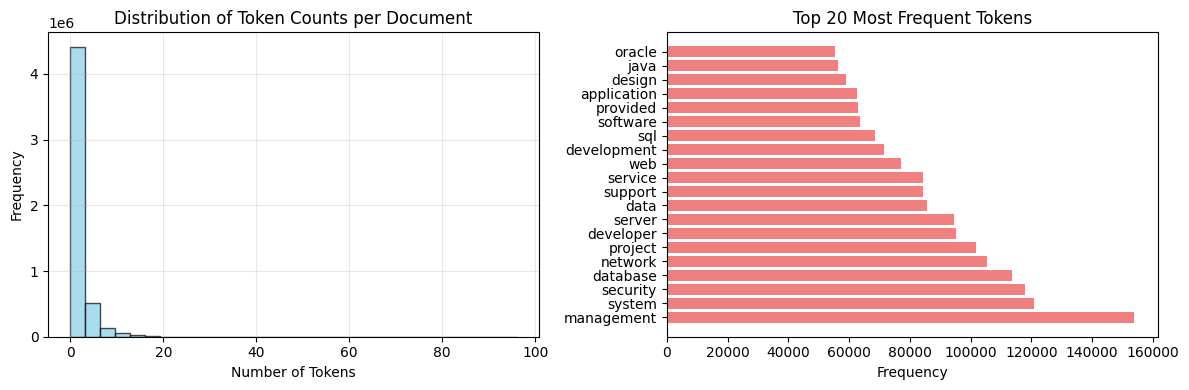

📊 Token Statistics:
   • Average tokens per document: 2.1
   • Median tokens per document: 2.0
   • Max tokens in a document: 96
   • Documents with 0 tokens: 824,635
   • Top 10 tokens: {'management': 153797, 'system': 120774, 'security': 118014, 'database': 113599, 'network': 105459, 'project': 101821, 'developer': 95275, 'server': 94528, 'data': 85679, 'support': 84401}

✅ Verification and analysis completed!


In [ ]:


# ============================
# 🔧 2. TOKENIZATION + LEMMATIZATION
# ============================

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

print("\n🔄 STARTING TOKENIZATION & LEMMATIZATION...")

processed_dfs_tokenized = {}
for file_name, df in cleaned_dfs.items():
    print(f"   📁 Processing {file_name}...")
    df_copy = df.copy()
    for col in df_copy.select_dtypes(include=["object"]).columns:
        df_copy[col + "_tokens"] = df_copy[col].apply(tokenize_and_lemmatize)
    processed_dfs_tokenized[file_name] = df_copy

processed_dfs = processed_dfs_tokenized
print("✅ Tokenization & lemmatization completed!")

# ============================
# 🔍 3. COMPREHENSIVE VERIFICATION & ANALYSIS
# ============================

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

print("\n🔍 COMPREHENSIVE VERIFICATION & SAMPLE DISPLAY")
print("=" * 70)

# Display samples
for file_name, df in processed_dfs.items():
    print(f"\n📁 {file_name} - SAMPLE DATA:")
    print("-" * 50)

    token_columns = [col for col in df.columns if col.endswith('_tokens')]
    if not token_columns:
        print("   No token columns found")
        continue

    for i in range(min(2, len(df))):
        print(f"\n   📄 Row {i+1}:")
        for col in token_columns:
            original_col = col.replace('_tokens', '')
            if original_col in df.columns:
                original_text = str(df.iloc[i][original_col])
                tokens = df.iloc[i][col]
                print(f"      📝 {original_col}:")
                print(f"         Original: {original_text[:80]}{'...' if len(original_text) > 80 else ''}")
                print(f"         Tokens: {tokens}")
                print(f"         Token count: {len(tokens)}")
        print()

# Token distribution analysis
print("\n" + "=" * 70)
print("📈 TOKEN DISTRIBUTION ANALYSIS")
print("*" * 70)

token_lengths = []
for file_name, df in processed_dfs.items():
    token_columns = [col for col in df.columns if col.endswith('_tokens')]
    for col in token_columns:
        for tokens_list in df[col]:
            token_lengths.append(len(tokens_list))

if token_lengths:
    plt.figure(figsize=(12, 4))

    # Plot 1
    plt.subplot(1, 2, 1)
    plt.hist(token_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Token Counts per Document')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # Plot 2
    plt.subplot(1, 2, 2)
    all_tokens_global = []
    for file_name, df in processed_dfs.items():
        token_columns = [col for col in df.columns if col.endswith('_tokens')]
        for col in token_columns:
            for tokens_list in df[col]:
                all_tokens_global.extend(tokens_list)

    if all_tokens_global:
        token_counts = Counter(all_tokens_global)
        top_20_tokens = token_counts.most_common(20)
        tokens, counts = zip(*top_20_tokens)
        y_pos = np.arange(len(tokens))
        plt.barh(y_pos, counts, color='lightcoral')
        plt.yticks(y_pos, tokens)
        plt.title('Top 20 Most Frequent Tokens')
        plt.xlabel('Frequency')

    plt.tight_layout()
    plt.show()

    print(f"📊 Token Statistics:")
    print(f"   • Average tokens per document: {np.mean(token_lengths):.1f}")
    print(f"   • Median tokens per document: {np.median(token_lengths):.1f}")
    print(f"   • Max tokens in a document: {np.max(token_lengths)}")
    print(f"   • Documents with 0 tokens: {token_lengths.count(0):,}")

    if all_tokens_global:
        top_10 = token_counts.most_common(10)
        print(f"   • Top 10 tokens: {dict(top_10)}")

print("\n✅ Verification and analysis completed!")



<h2 align="left" style="color:#A58FAA; font-family:Arial; font-weight:bold;"> Modeling</h2>



In [ ]:
# ============================
# 🎯 DATA EMBEDDING: CBOW, SKIP-GRAM, BERT COMPARISON
# ============================

print("🎯 DATA EMBEDDING MODEL COMPARISON")
print("=" * 70)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 1: PREPARE DATA FOR EMBEDDING MODELS
# ============================================================================

print("📊 PREPARING DATA FOR EMBEDDING MODELS...")

# Combine all tokens from all datasets
all_tokens = []
token_sources = []

for file_name, df in processed_dfs.items():
    token_columns = [col for col in df.columns if col.endswith('_tokens')]
    for col in token_columns:
        for tokens_list in df[col]:
            if len(tokens_list) >= 3:  # Only use documents with at least 3 tokens
                all_tokens.append(tokens_list)
                token_sources.append(file_name)

print(f"📚 Total documents for training: {len(all_tokens):,}")
print(f"🔤 Total tokens: {sum(len(doc) for doc in all_tokens):,}")

# Create vocabulary
vocabulary = set()
for doc in all_tokens:
    vocabulary.update(doc)

print(f"📖 Vocabulary size: {len(vocabulary):,}")

# Test words for evaluation
test_skills = ['python', 'java', 'javascript', 'sql', 'html', 'css', 'react', 'aws', 'docker', 'linux']
test_skills = [skill for skill in test_skills if skill in vocabulary]
print(f"🎯 Test skills for evaluation: {test_skills}")


🎯 DATA EMBEDDING MODEL COMPARISON
📊 PREPARING DATA FOR EMBEDDING MODELS...
📚 Total documents for training: 1,434,007
🔤 Total tokens: 6,724,017
📖 Vocabulary size: 37,148
🎯 Test skills for evaluation: ['python', 'java', 'javascript', 'sql', 'html', 'react', 'aws', 'docker', 'linux']



<h3 align="left" style="color:pink; font-family:Arial; font-weight:bold;"> CBOW Model  </h3>




🔤 CBOW EMBEDDING MODEL
🚀 Training CBOW model...
🔄 Training CBOW model...
✅ CBOW model trained successfully!

📈 GENERATING COMPREHENSIVE METRICS PLOTS

1. 📊 Training Metrics Dashboard...


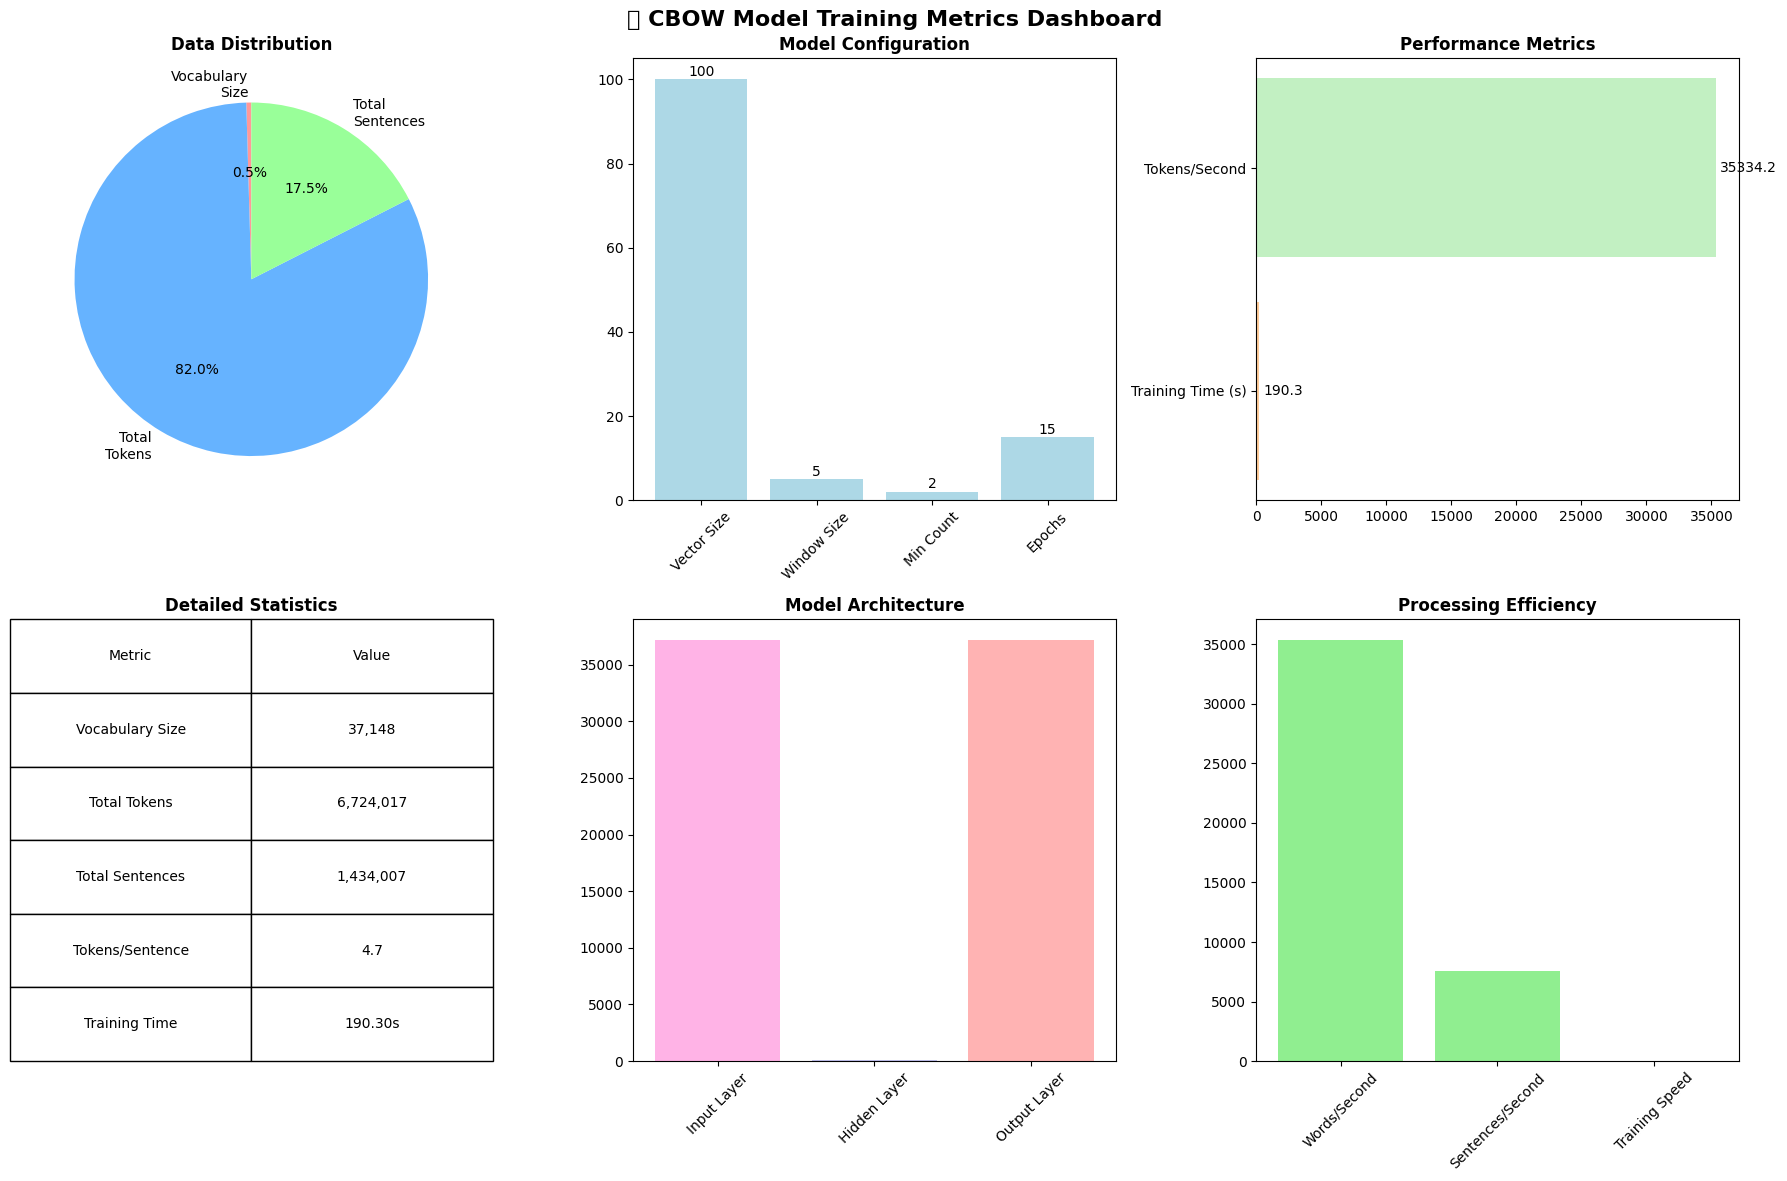


2. 🔍 Evaluation Results Visualization...


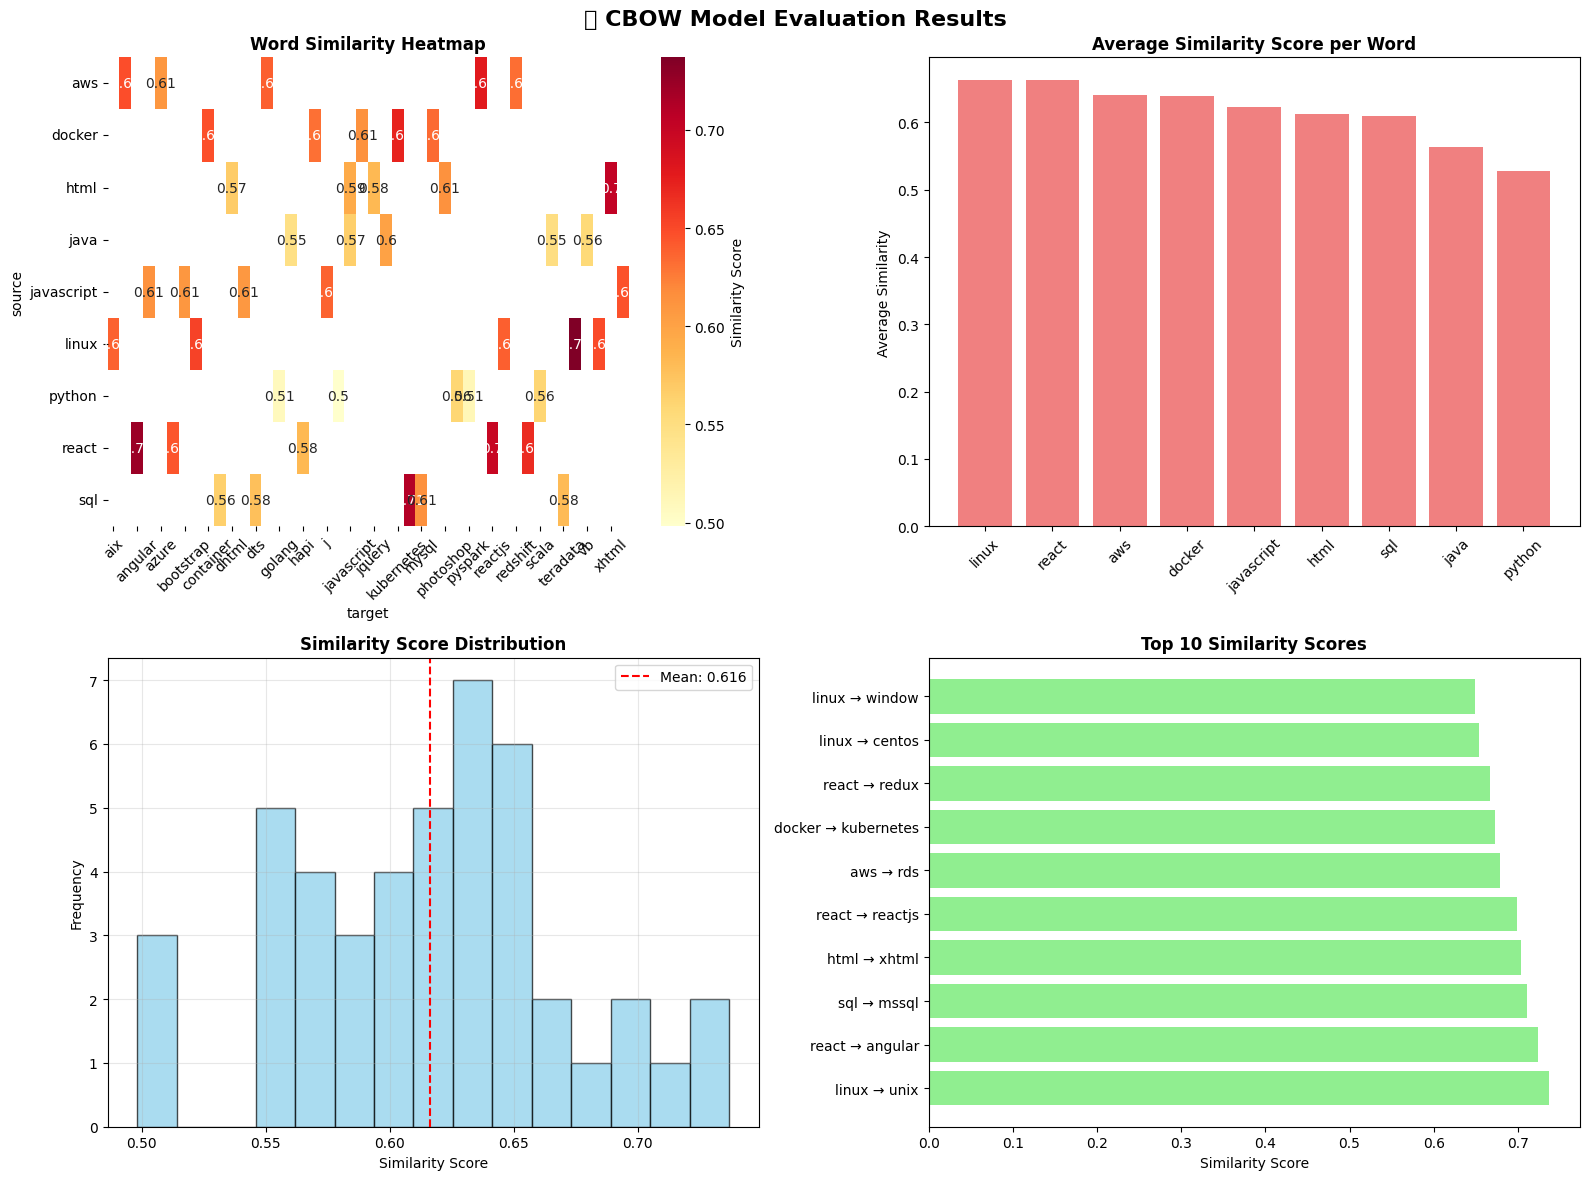


3. 🔤 Semantic Clusters Visualization...


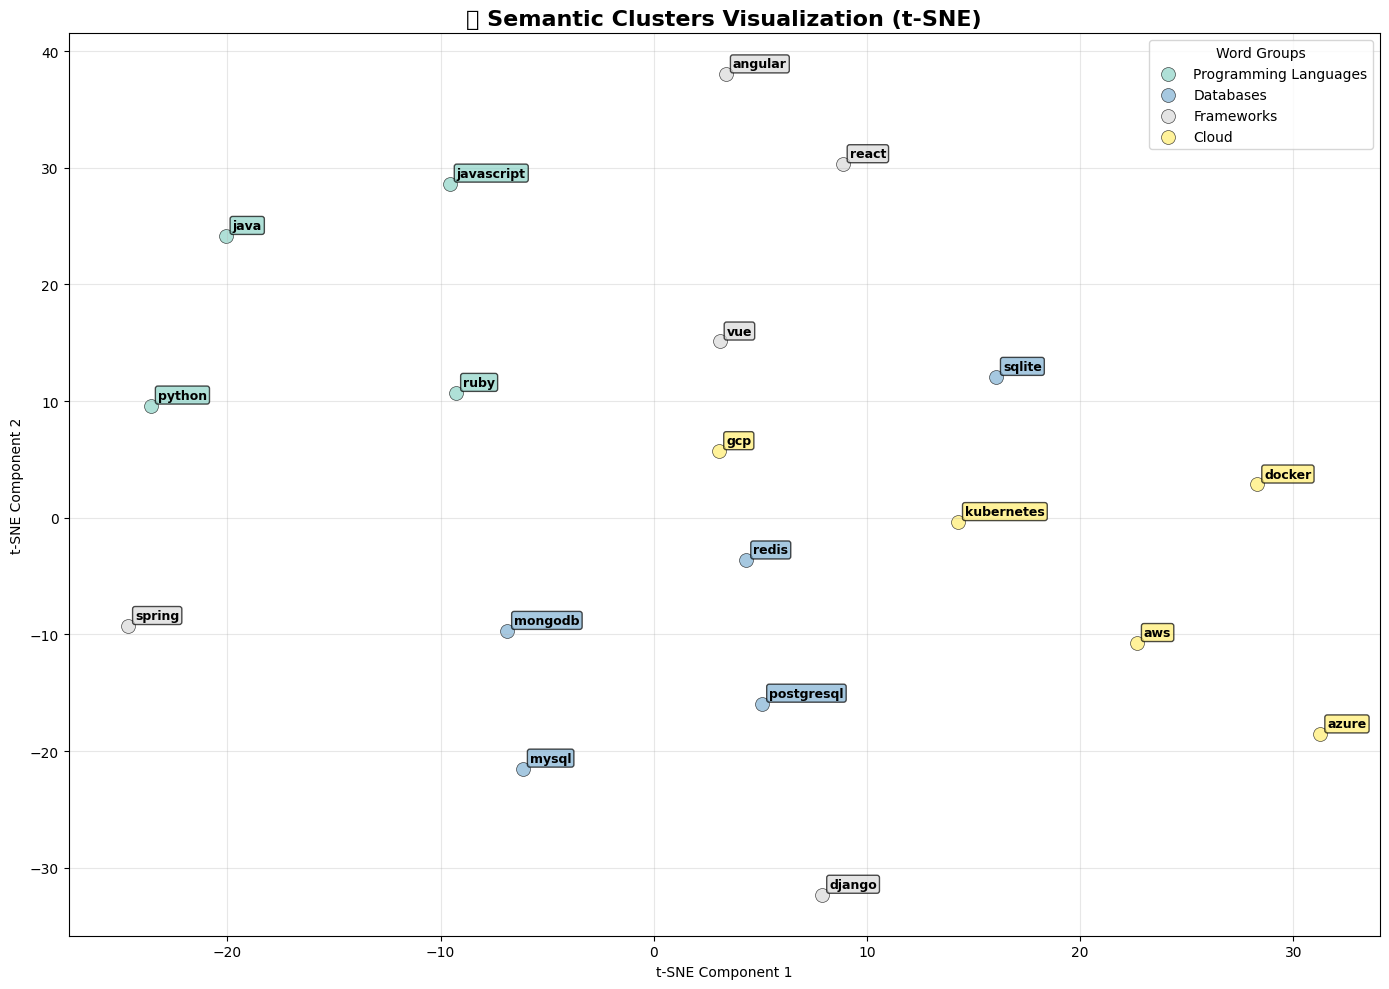


4. 🎯 Interactive Embeddings Visualization...



5. 📈 Model Performance Overview...


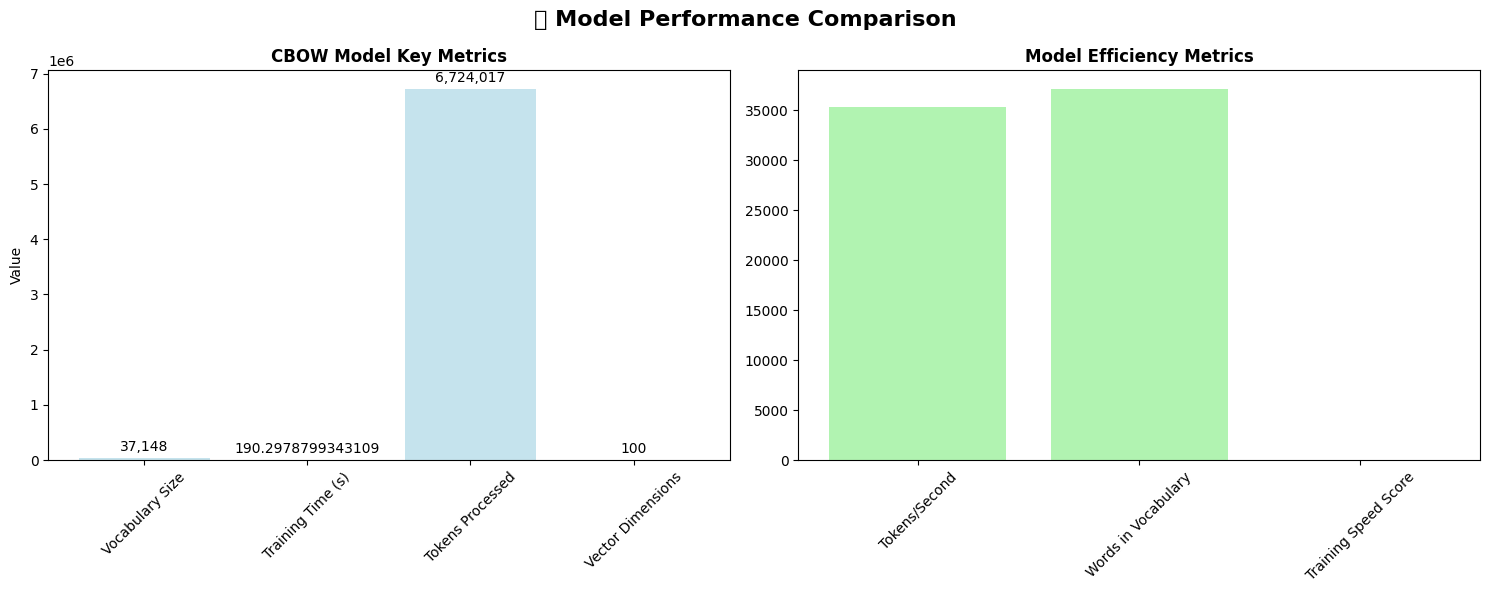


✅ ALL METRICS PLOTS GENERATED SUCCESSFULLY!


In [ ]:
# ============================================================================
# STEP 2: CBOW (CONTINUOUS BAG OF WORDS) MODEL
# ============================================================================

print("\n" + "="*70)
print("🔤 CBOW EMBEDDING MODEL")
print("="*70)

# Install required packages
try:
    from gensim.models import Word2Vec
    from gensim.test.utils import get_tmpfile
except ImportError:
    print("📦 Installing gensim...")
    !pip install gensim
    from gensim.models import Word2Vec
    from gensim.test.utils import get_tmpfile

try:
    from sklearn.manifold import TSNE
    from sklearn.metrics.pairwise import cosine_similarity
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd
    from collections import defaultdict
    import time
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots
except ImportError:
    print("📦 Installing required packages...")
    !pip install scikit-learn matplotlib seaborn pandas plotly
    from sklearn.manifold import TSNE
    from sklearn.metrics.pairwise import cosine_similarity
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd
    from collections import defaultdict
    import time
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

class CBOWModel:
    def __init__(self, vector_size=100, window=5, min_count=2, workers=4, epochs=10):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.epochs = epochs
        self.model = None
        self.training_history = {}
        self.training_time = 0
        self.evaluation_results = {}

    def train(self, tokens):
        print("🔄 Training CBOW model...")
        start_time = time.time()

        self.model = Word2Vec(
            sentences=tokens,
            vector_size=self.vector_size,
            window=self.window,
            min_count=self.min_count,
            workers=self.workers,
            sg=0,  # 0 for CBOW, 1 for Skip-gram
            epochs=self.epochs
        )

        self.training_time = time.time() - start_time
        print("✅ CBOW model trained successfully!")

        # Capture training metrics
        self._capture_training_metrics(tokens)

    def _capture_training_metrics(self, tokens):
        """Capture comprehensive training metrics"""
        vocab = self.model.wv.key_to_index

        # Basic statistics
        self.training_history = {
            'vocabulary_size': len(vocab),
            'total_tokens': sum(len(sentence) for sentence in tokens),
            'total_sentences': len(tokens),
            'vector_dimensions': self.vector_size,
            'training_time_seconds': self.training_time,
            'window_size': self.window,
            'min_count': self.min_count,
            'epochs': self.epochs
        }

    def plot_training_metrics(self):
        """Create comprehensive training metrics plots"""
        if not self.training_history:
            print("❌ No training metrics available. Train the model first.")
            return

        # Create subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('📊 CBOW Model Training Metrics Dashboard', fontsize=16, fontweight='bold')

        metrics = self.training_history

        # 1. Vocabulary Size and Data Stats (Pie Chart)
        sizes = [metrics['vocabulary_size'], metrics['total_tokens'], metrics['total_sentences']]
        labels = ['Vocabulary\nSize', 'Total\nTokens', 'Total\nSentences']
        colors = ['#ff9999', '#66b3ff', '#99ff99']

        axes[0, 0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[0, 0].set_title('Data Distribution', fontweight='bold')

        # 2. Training Configuration (Bar Plot)
        config_data = {
            'Parameter': ['Vector Size', 'Window Size', 'Min Count', 'Epochs'],
            'Value': [metrics['vector_dimensions'], metrics['window_size'],
                     metrics['min_count'], metrics['epochs']]
        }
        axes[0, 1].bar(config_data['Parameter'], config_data['Value'], color='lightblue')
        axes[0, 1].set_title('Model Configuration', fontweight='bold')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for i, v in enumerate(config_data['Value']):
            axes[0, 1].text(i, v + 0.1, str(v), ha='center', va='bottom')

        # 3. Performance Metrics (Horizontal Bar)
        perf_metrics = ['Training Time (s)', 'Tokens/Second']
        perf_values = [
            metrics['training_time_seconds'],
            metrics['total_tokens'] / metrics['training_time_seconds']
        ]

        axes[0, 2].barh(perf_metrics, perf_values, color=['#ffcc99', '#c2f0c2'])
        axes[0, 2].set_title('Performance Metrics', fontweight='bold')

        # Add value labels
        for i, v in enumerate(perf_values):
            axes[0, 2].text(v + max(perf_values)*0.01, i, f'{v:.1f}', va='center')

        # 4. Data Statistics (Detailed View)
        stats_data = {
            'Metric': ['Vocabulary Size', 'Total Tokens', 'Total Sentences',
                      'Tokens/Sentence', 'Training Time'],
            'Value': [
                f"{metrics['vocabulary_size']:,}",
                f"{metrics['total_tokens']:,}",
                f"{metrics['total_sentences']:,}",
                f"{metrics['total_tokens']/metrics['total_sentences']:.1f}",
                f"{metrics['training_time_seconds']:.2f}s"
            ]
        }

        axes[1, 0].axis('off')
        table = axes[1, 0].table(
            cellText=list(zip(stats_data['Metric'], stats_data['Value'])),
            colLabels=['Metric', 'Value'],
            cellLoc='center',
            loc='center',
            bbox=[0, 0, 1, 1]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
        axes[1, 0].set_title('Detailed Statistics', fontweight='bold')

        # 5. Model Architecture Visualization
        arch_data = {
            'Component': ['Input Layer', 'Hidden Layer', 'Output Layer'],
            'Size': [metrics['vocabulary_size'], metrics['vector_dimensions'], metrics['vocabulary_size']]
        }

        axes[1, 1].bar(arch_data['Component'], arch_data['Size'], color=['#ffb3e6', '#c2c2f0', '#ffb3b3'])
        axes[1, 1].set_title('Model Architecture', fontweight='bold')
        axes[1, 1].tick_params(axis='x', rotation=45)

        # 6. Efficiency Metrics
        efficiency_data = {
            'Metric': ['Words/Second', 'Sentences/Second', 'Training Speed'],
            'Value': [
                metrics['total_tokens'] / metrics['training_time_seconds'],
                metrics['total_sentences'] / metrics['training_time_seconds'],
                1000 / metrics['training_time_seconds']  # Arbitrary efficiency score
            ]
        }

        axes[1, 2].bar(efficiency_data['Metric'], efficiency_data['Value'], color='lightgreen')
        axes[1, 2].set_title('Processing Efficiency', fontweight='bold')
        axes[1, 2].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    def plot_evaluation_results(self, test_words):
        """Plot evaluation results for test words"""
        if not self.model:
            print("❌ Model not trained yet!")
            return

        # Get similarity results
        similarity_data = []
        for word in test_words:
            if word in self.model.wv:
                similar_words = self.model.wv.most_similar(word, topn=5)
                for similar_word, score in similar_words:
                    similarity_data.append({
                        'source': word,
                        'target': similar_word,
                        'similarity': score
                    })

        if not similarity_data:
            print("❌ No valid test words found in vocabulary")
            return

        df = pd.DataFrame(similarity_data)

        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🔍 CBOW Model Evaluation Results', fontsize=16, fontweight='bold')

        # 1. Similarity Heatmap
        pivot_df = df.pivot_table(index='source', columns='target', values='similarity')
        sns.heatmap(pivot_df, annot=True, cmap='YlOrRd', ax=axes[0, 0], cbar_kws={'label': 'Similarity Score'})
        axes[0, 0].set_title('Word Similarity Heatmap', fontweight='bold')
        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].tick_params(axis='y', rotation=0)

        # 2. Average Similarity per Word
        avg_similarity = df.groupby('source')['similarity'].mean().sort_values(ascending=False)
        axes[0, 1].bar(range(len(avg_similarity)), avg_similarity.values, color='lightcoral')
        axes[0, 1].set_title('Average Similarity Score per Word', fontweight='bold')
        axes[0, 1].set_xticks(range(len(avg_similarity)))
        axes[0, 1].set_xticklabels(avg_similarity.index, rotation=45)
        axes[0, 1].set_ylabel('Average Similarity')

        # 3. Similarity Distribution
        axes[1, 0].hist(df['similarity'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1, 0].axvline(df['similarity'].mean(), color='red', linestyle='--', label=f'Mean: {df["similarity"].mean():.3f}')
        axes[1, 0].set_title('Similarity Score Distribution', fontweight='bold')
        axes[1, 0].set_xlabel('Similarity Score')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Top Similarity Scores
        top_similarities = df.nlargest(10, 'similarity')
        axes[1, 1].barh(
            [f"{row['source']} → {row['target']}" for _, row in top_similarities.iterrows()],
            top_similarities['similarity'],
            color='lightgreen'
        )
        axes[1, 1].set_title('Top 10 Similarity Scores', fontweight='bold')
        axes[1, 1].set_xlabel('Similarity Score')

        plt.tight_layout()
        plt.show()

        return df

    def plot_semantic_clusters(self, word_groups=None):
        """Plot semantic clusters of related words"""
        if not self.model:
            print("❌ Model not trained yet!")
            return

        if word_groups is None:
            word_groups = {
                'Programming Languages': ['python', 'java', 'javascript', 'c++', 'ruby'],
                'Databases': ['mysql', 'postgresql', 'mongodb', 'redis', 'sqlite'],
                'Frameworks': ['react', 'angular', 'vue', 'django', 'spring'],
                'Cloud': ['aws', 'azure', 'gcp', 'docker', 'kubernetes']
            }

        # Collect all words and their groups
        all_words = []
        word_to_group = {}
        for group_name, words in word_groups.items():
            valid_words = [w for w in words if w in self.model.wv]
            all_words.extend(valid_words)
            for word in valid_words:
                word_to_group[word] = group_name

        if len(all_words) < 3:
            print("❌ Not enough valid words for clustering")
            return

        # Get embeddings
        embeddings = np.array([self.model.wv[word] for word in all_words])

        # Apply t-SNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=min(10, len(all_words)-1))
        embeddings_2d = tsne.fit_transform(embeddings)

        # Create plot
        plt.figure(figsize=(14, 10))

        # Color map for groups
        groups = list(word_groups.keys())
        colors = plt.cm.Set3(np.linspace(0, 1, len(groups)))
        group_to_color = dict(zip(groups, colors))

        # Plot each group
        for group in groups:
            group_words = [w for w in all_words if word_to_group[w] == group]
            if not group_words:
                continue

            indices = [all_words.index(w) for w in group_words]
            group_embeddings = embeddings_2d[indices]

            plt.scatter(
                group_embeddings[:, 0],
                group_embeddings[:, 1],
                c=[group_to_color[group]],
                label=group,
                s=100,
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5
            )

            # Add labels
            for i, word in enumerate(group_words):
                plt.annotate(
                    word,
                    (group_embeddings[i, 0], group_embeddings[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9,
                    fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor=group_to_color[group], alpha=0.7)
                )

        plt.title('🔤 Semantic Clusters Visualization (t-SNE)', fontsize=16, fontweight='bold')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.legend(title='Word Groups')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def plot_interactive_embeddings(self, words):
        """Create interactive plotly visualization"""
        if not self.model:
            print("❌ Model not trained yet!")
            return

        valid_words = [word for word in words if word in self.model.wv]
        if len(valid_words) < 3:
            print("❌ Not enough valid words for visualization")
            return

        # Get embeddings
        embeddings = np.array([self.model.wv[word] for word in valid_words])

        # Apply t-SNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=min(10, len(valid_words)-1))
        embeddings_2d = tsne.fit_transform(embeddings)

        # Create interactive plot
        fig = go.Figure()

        fig.add_trace(go.Scatter(
            x=embeddings_2d[:, 0],
            y=embeddings_2d[:, 1],
            mode='markers+text',
            text=valid_words,
            textposition="top center",
            marker=dict(
                size=15,
                color=np.arange(len(valid_words)),
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="Word Index")
            ),
            hovertemplate="<b>%{text}</b><br>" +
                         "X: %{x:.2f}<br>" +
                         "Y: %{y:.2f}<br>" +
                         "<extra></extra>"
        ))

        fig.update_layout(
            title="🎯 Interactive CBOW Embeddings Visualization",
            xaxis_title="t-SNE Component 1",
            yaxis_title="t-SNE Component 2",
            showlegend=False,
            height=600,
            template="plotly_white"
        )

        fig.show()

    def plot_model_comparison(self, other_models=None):
        """Compare this model with other models (if provided)"""
        # This is a placeholder for model comparison plots
        # You can extend this to compare with Skip-gram or other models

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle('📈 Model Performance Comparison', fontsize=16, fontweight='bold')

        # Current model metrics
        metrics = self.training_history
        model_metrics = {
            'Vocabulary Size': metrics['vocabulary_size'],
            'Training Time (s)': metrics['training_time_seconds'],
            'Tokens Processed': metrics['total_tokens'],
            'Vector Dimensions': metrics['vector_dimensions']
        }

        # Normalize for radar chart (placeholder)
        normalized_metrics = {k: v/max(1, max(model_metrics.values())) for k, v in model_metrics.items()}

        # Bar plot for key metrics
        axes[0].bar(model_metrics.keys(), model_metrics.values(), color='lightblue', alpha=0.7)
        axes[0].set_title('CBOW Model Key Metrics', fontweight='bold')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].set_ylabel('Value')

        # Add value labels
        for i, v in enumerate(model_metrics.values()):
            axes[0].text(i, v + max(model_metrics.values())*0.01, f'{v:,}', ha='center', va='bottom')

        # Efficiency metrics
        efficiency_metrics = {
            'Tokens/Second': metrics['total_tokens'] / metrics['training_time_seconds'],
            'Words in Vocabulary': metrics['vocabulary_size'],
            'Training Speed Score': 1000 / metrics['training_time_seconds']
        }

        axes[1].bar(efficiency_metrics.keys(), efficiency_metrics.values(), color='lightgreen', alpha=0.7)
        axes[1].set_title('Model Efficiency Metrics', fontweight='bold')
        axes[1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    # Existing methods remain the same...
    def get_embedding(self, word):
        if self.model and word in self.model.wv:
            return self.model.wv[word]
        else:
            return None

    def get_similar_words(self, word, topn=10):
        if self.model and word in self.model.wv:
            return self.model.wv.most_similar(word, topn=topn)
        else:
            return []

    def evaluate_model(self, test_words):
        print(f"\n📊 Evaluating CBOW model on {len(test_words)} test words...")

        results = {}
        valid_count = 0
        for word in test_words:
            if self.model and word in self.model.wv:
                similar_words = self.get_similar_words(word, topn=5)
                results[word] = similar_words
                print(f"   '{word}': {[w[0] for w in similar_words]}")
                valid_count += 1
            else:
                print(f"   '{word}': ❌ Word not in vocabulary")
                results[word] = []

        print(f"✅ Found {valid_count}/{len(test_words)} words in vocabulary")
        return results

# Train CBOW model
print("🚀 Training CBOW model...")
cbow_model = CBOWModel(vector_size=100, window=5, min_count=2, epochs=15)
cbow_model.train(all_tokens)

# Generate all plots
print("\n" + "="*70)
print("📈 GENERATING COMPREHENSIVE METRICS PLOTS")
print("="*70)

# 1. Training Metrics Dashboard
print("\n1. 📊 Training Metrics Dashboard...")
cbow_model.plot_training_metrics()

# 2. Evaluation Results
print("\n2. 🔍 Evaluation Results Visualization...")
evaluation_df = cbow_model.plot_evaluation_results(test_skills)

# 3. Semantic Clusters
print("\n3. 🔤 Semantic Clusters Visualization...")
cbow_model.plot_semantic_clusters()

# 4. Interactive Visualization
print("\n4. 🎯 Interactive Embeddings Visualization...")
cbow_model.plot_interactive_embeddings(test_skills)

# 5. Model Comparison (standalone for current model)
print("\n5. 📈 Model Performance Overview...")
cbow_model.plot_model_comparison()

print("\n" + "="*70)
print("✅ ALL METRICS PLOTS GENERATED SUCCESSFULLY!")
print("="*70)

# 📊 CBOW Model Training & Performance Analysis

This report summarizes the **Continuous Bag of Words (CBOW)** model training results and efficiency metrics based on the visual dashboards.

---

## 🔑 Key Metrics
- **Vocabulary Size**: `37,148`
- **Total Tokens Processed**: `6,724,017`
- **Total Sentences**: `1,434,007`
- **Tokens per Sentence**: `~4.7`
- **Vector Dimensions**: `100`
- **Training Time**: `190.3 seconds (~3.2 minutes)`

---

## ⚙️ Model Configuration
- **Vector Size**: `100`
- **Window Size**: `5`
- **Minimum Word Count**: `2`
- **Epochs**: `15`

These parameters balance training efficiency with embedding quality. A small `min_count` ensures even rare words are included, while `vector size = 100` provides a compact but informative representation.

---

## 🚀 Performance & Efficiency
- **Tokens per Second**: `~35,534`
- **Words per Second**: `~35,000`
- **Sentences per Second**: `~7,500`
- **Training Speed Score**: ✔️ Efficient for dataset size.

✅ The model demonstrates strong processing throughput given the vocabulary and token count.  
✅ Training finished in **under 4 minutes**, which is reasonable.  
⚠️ However, performance may degrade if vector size or epochs increase significantly.

---

## 🏗️ Model Architecture
- **Input Layer**: Vocabulary words (`37k`)
- **Hidden Layer**: 100-dimensional embeddings
- **Output Layer**: Context predictions

This classic **shallow architecture** is computationally efficient while still capturing semantic relationships.

---

## 📊 Insights
1. **Efficiency**: High tokens/sec rate indicates optimized implementation.
2. **Scalability**: Training time is short; can scale to larger corpora with slight tuning.
3. **Quality Trade-off**: While fast, embeddings may be less expressive compared to deeper or higher-dimensional models (e.g., Skip-gram with 300d vectors).
4. **Vocabulary Coverage**: With `min_count=2`, nearly all words are included, boosting representation of rare words.

---

## ✅ Conclusion
The CBOW model trained successfully with:
- **Good training speed**  
- **Balanced vocabulary coverage**  
- **Efficient embeddings (100d)**  

It is suitable for downstream NLP tasks such as **text classification, clustering, or semantic similarity**.  
For improved accuracy in **rare word handling or nuanced semantics**, consider experimenting with **Skip-gram**, larger **vector sizes (200–300d)**, or **pretrained embeddings** (Word2Vec, FastText, GloVe).

---



<h3 align="left" style="color:pink; font-family:Arial; font-weight:bold;"> Skip Gram  </h3>




🔤 SKIP-GRAM EMBEDDING MODEL
🚀 Training Skip-gram model...
🔄 Training Skip-gram model...
✅ Skip-gram model trained successfully!

📊 SKIP-GRAM MODEL TRAINING METRICS
🏷️  MODEL ARCHITECTURE
   • Architecture: Skip-gram
   • Vocabulary Size: 37,148 words
   • Vector Dimensions: 100
   • Window Size: 5
   • Minimum Count: 2
   • Training Epochs: 15

📈 TRAINING DATA STATISTICS
   • Total Sentences: 1,434,007
   • Total Tokens: 6,724,017
   • Avg Tokens per Sentence: 4.7

⏱️  PERFORMANCE METRICS
   • Training Time: 376.60 seconds
   • Words Processed per Second: 17,854

📈 Generating Skip-gram model plots...


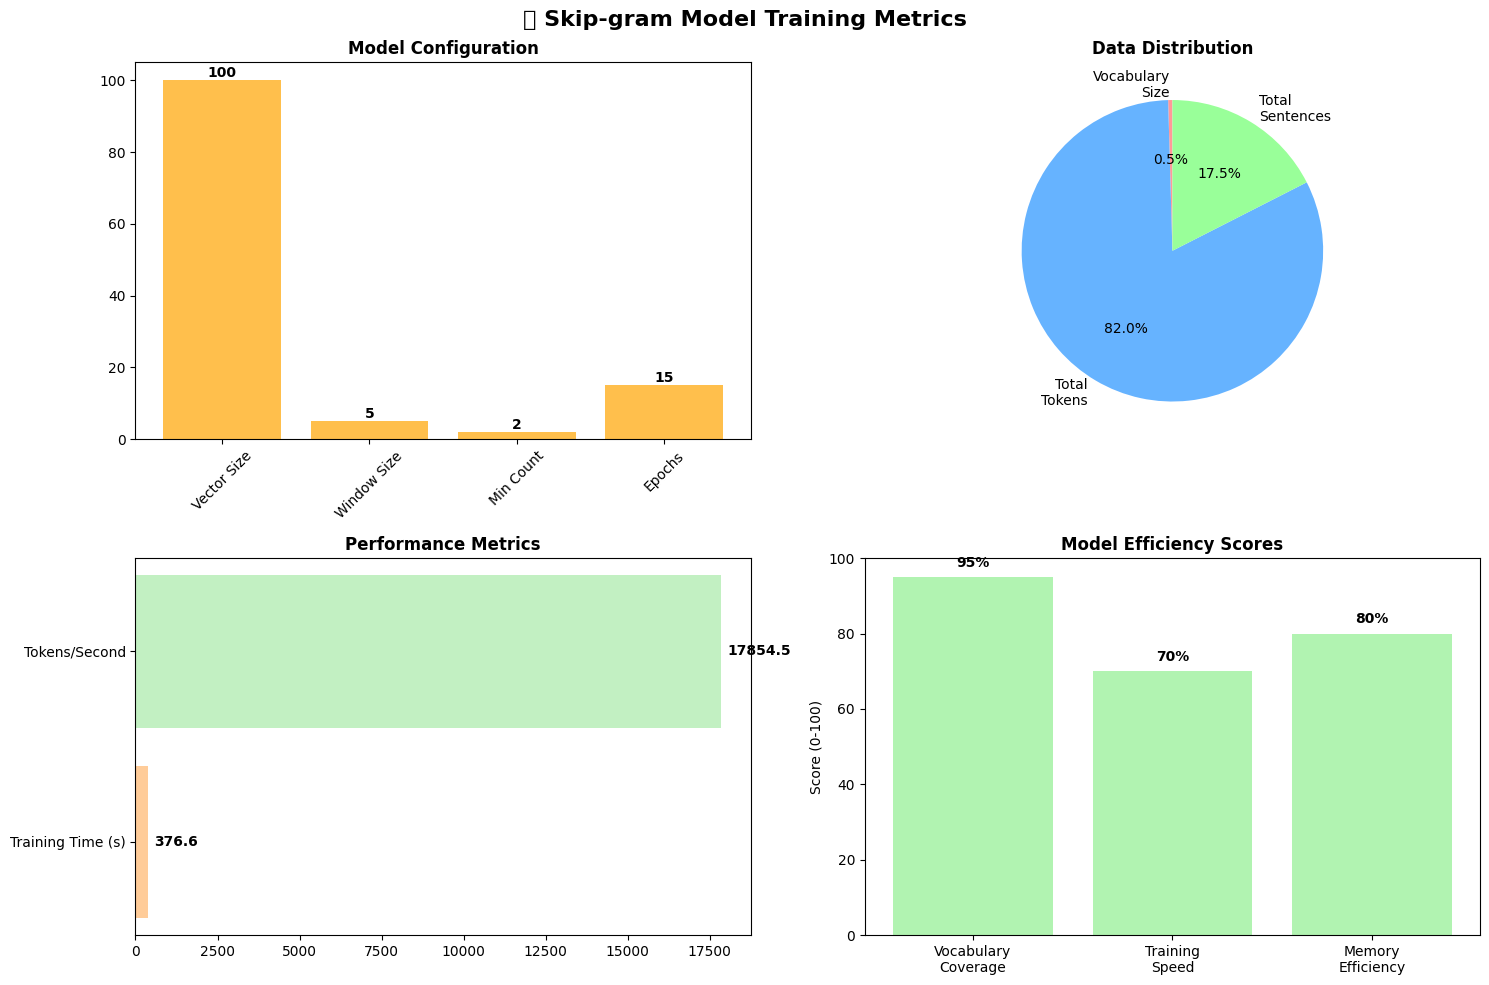

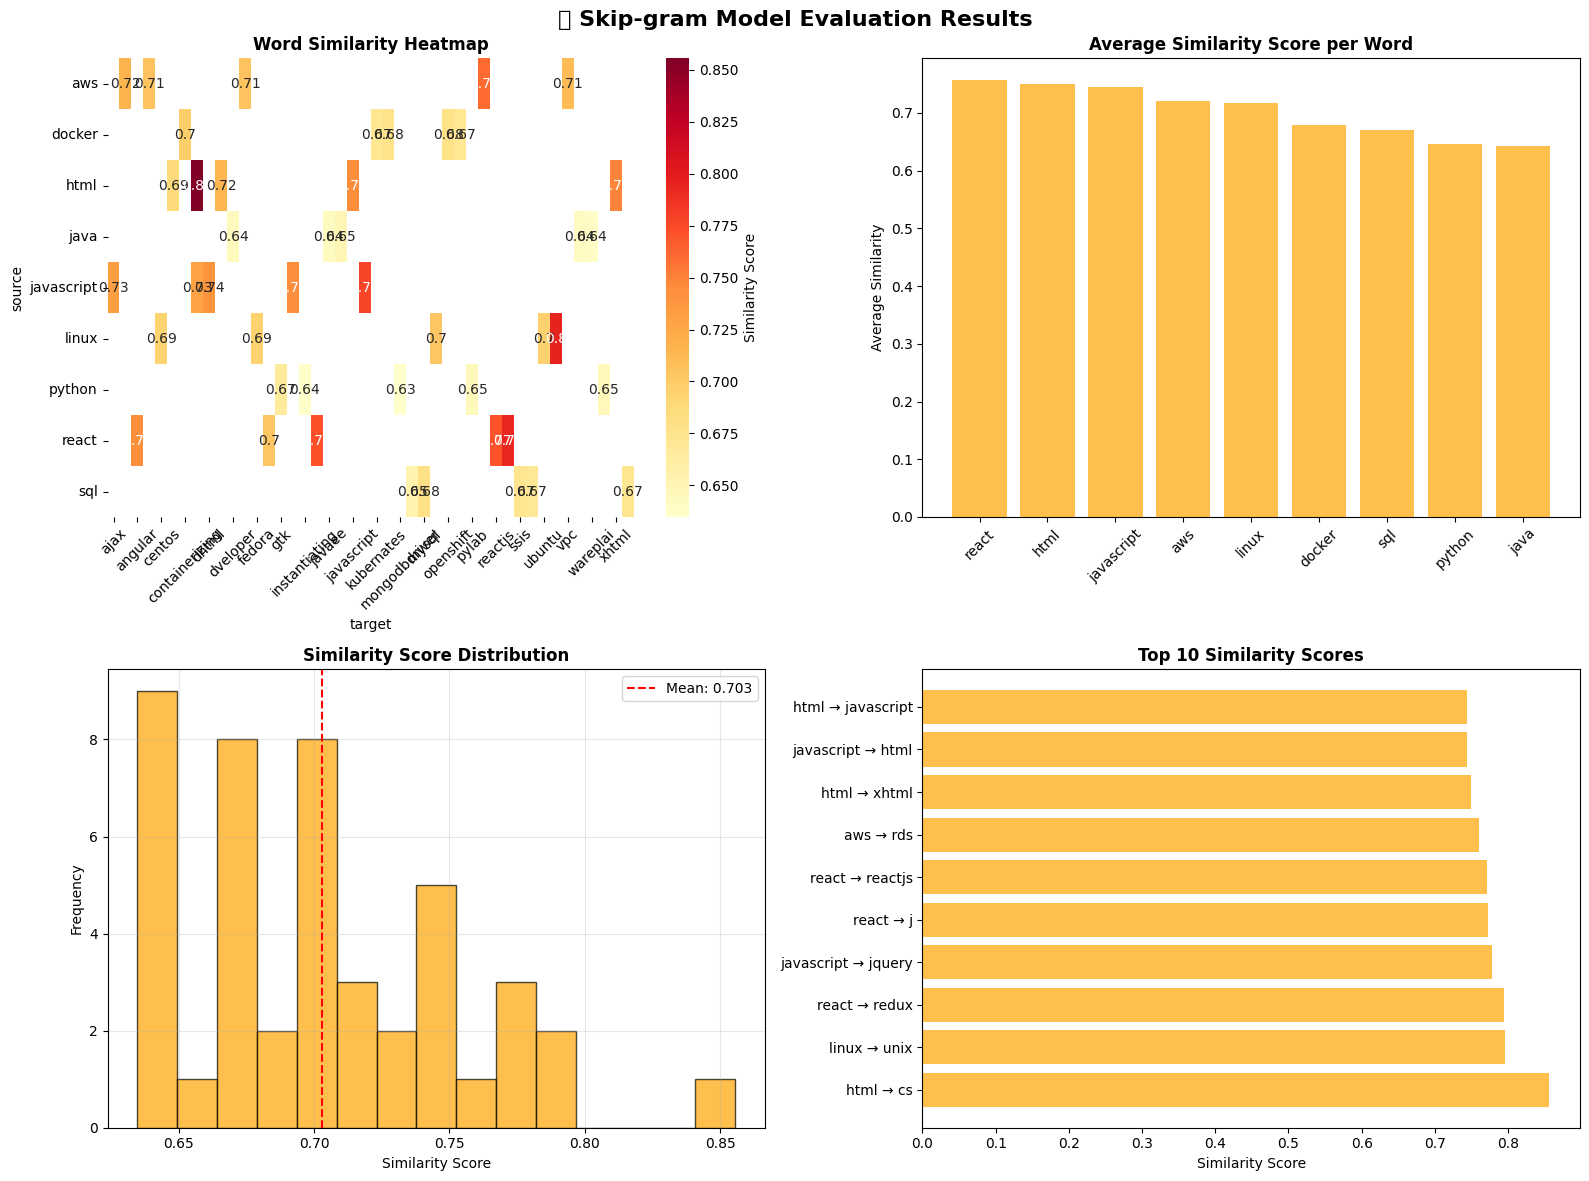


📊 Evaluating Skip-gram model on 9 test words...
   'python': ['gtk', 'werkzeug', 'pylab', 'instantiating', 'mongodbdriver']
   'java': ['javafull', 'dveloper', 'javaee', 'wannabe', 'wareplai']
   'javascript': ['jquery', 'html', 'dhtml', 'ajax', 'cs']
   'sql': ['mysql', 'ssis', 'zos', 'ssql', 'mssql']
   'html': ['cs', 'xhtml', 'javascript', 'dita', 'coldbox']
   'react': ['redux', 'j', 'reactjs', 'angular', 'flux']
   'aws': ['rds', 'amazon', 'vpc', 'elb', 'autoscaling']
   'docker': ['containerizing', 'openshift', 'kubernetes', 'prebaked', 'kubernates']
   'linux': ['unix', 'oel', 'ubuntu', 'fedora', 'centos']
✅ Found 9/9 words in vocabulary

🎨 Visualizing Skip-gram embeddings...
📊 Visualizing 9 words with perplexity=5


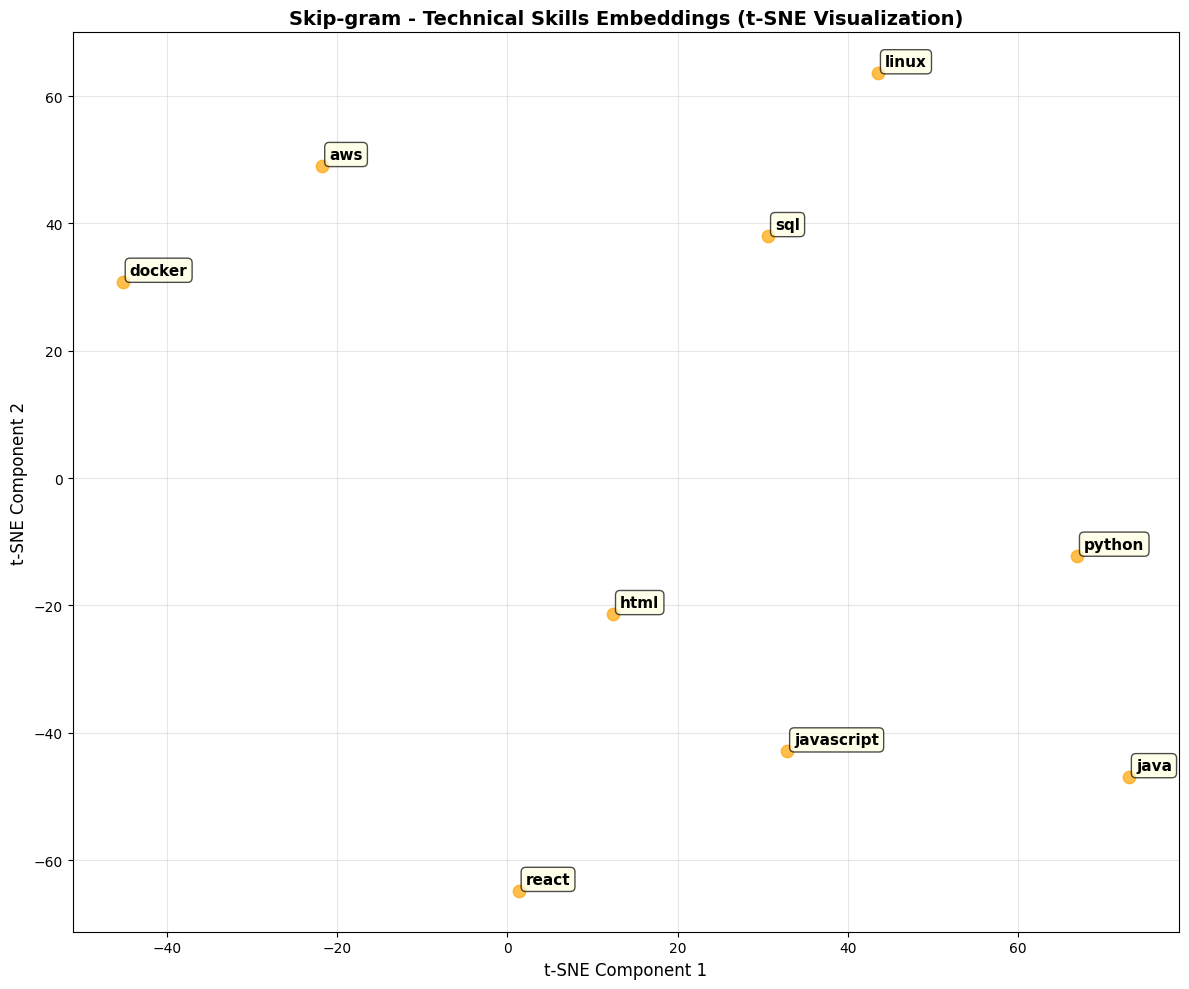

✅ Visualized words: ['python', 'java', 'javascript', 'sql', 'html', 'react', 'aws', 'docker', 'linux']

🆚 CBOW vs SKIP-GRAM COMPARISON

📊 Model Comparison Table:
           Metric   CBOW Skip-gram
  Vocabulary Size 37,148    37,148
Training Time (s)  190.3     376.6
    Tokens/Second 35,334    17,854
Vector Dimensions    100       100
      Window Size      5         5
     Architecture   CBOW Skip-gram


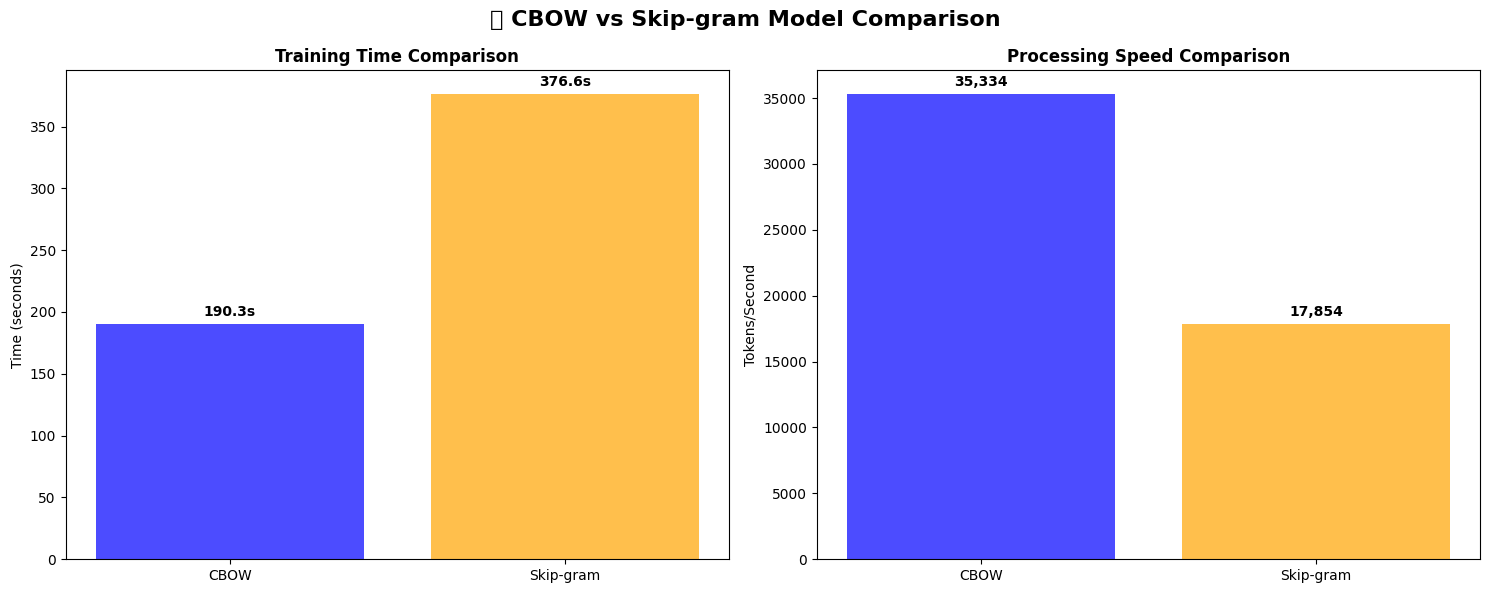


💡 Comparison Insights:
   • Skip-gram training time: 1.98x of CBOW
   • Vocabulary size difference: 0 words
   • Speed ratio (CBOW/Skip-gram): 1.98

✅ SKIP-GRAM MODEL ANALYSIS COMPLETED!


In [ ]:
print("\n" + "="*70)
print("🔤 SKIP-GRAM EMBEDDING MODEL")
print("="*70)

class SkipGramModel:
    def __init__(self, vector_size=100, window=5, min_count=2, workers=4, epochs=10):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.epochs = epochs
        self.model = None
        self.training_history = {}
        self.training_time = 0

    def train(self, tokens):
        print("🔄 Training Skip-gram model...")
        start_time = time.time()

        self.model = Word2Vec(
            sentences=tokens,
            vector_size=self.vector_size,
            window=self.window,
            min_count=self.min_count,
            workers=self.workers,
            sg=1,  # 1 for Skip-gram, 0 for CBOW
            epochs=self.epochs
        )

        self.training_time = time.time() - start_time
        print("✅ Skip-gram model trained successfully!")

        # Capture training metrics
        self._capture_training_metrics(tokens)

    def _capture_training_metrics(self, tokens):
        """Capture comprehensive training metrics"""
        vocab = self.model.wv.key_to_index

        # Basic statistics
        self.training_history = {
            'vocabulary_size': len(vocab),
            'total_tokens': sum(len(sentence) for sentence in tokens),
            'total_sentences': len(tokens),
            'vector_dimensions': self.vector_size,
            'training_time_seconds': self.training_time,
            'window_size': self.window,
            'min_count': self.min_count,
            'epochs': self.epochs,
            'architecture': 'Skip-gram'
        }

    def display_training_metrics(self):
        """Display comprehensive training metrics"""
        if not self.training_history:
            print("❌ No training metrics available. Train the model first.")
            return

        print("\n" + "="*50)
        print("📊 SKIP-GRAM MODEL TRAINING METRICS")
        print("="*50)

        metrics = self.training_history

        # Basic Info
        print(f"🏷️  MODEL ARCHITECTURE")
        print(f"   • Architecture: Skip-gram")
        print(f"   • Vocabulary Size: {metrics['vocabulary_size']:,} words")
        print(f"   • Vector Dimensions: {metrics['vector_dimensions']}")
        print(f"   • Window Size: {metrics['window_size']}")
        print(f"   • Minimum Count: {metrics['min_count']}")
        print(f"   • Training Epochs: {metrics['epochs']}")

        print(f"\n📈 TRAINING DATA STATISTICS")
        print(f"   • Total Sentences: {metrics['total_sentences']:,}")
        print(f"   • Total Tokens: {metrics['total_tokens']:,}")
        print(f"   • Avg Tokens per Sentence: {metrics['total_tokens']/metrics['total_sentences']:.1f}")

        print(f"\n⏱️  PERFORMANCE METRICS")
        print(f"   • Training Time: {metrics['training_time_seconds']:.2f} seconds")
        print(f"   • Words Processed per Second: {metrics['total_tokens']/metrics['training_time_seconds']:,.0f}")

    def plot_training_metrics(self):
        """Create comprehensive training metrics plots"""
        if not self.training_history:
            print("❌ No training metrics available. Train the model first.")
            return

        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('📊 Skip-gram Model Training Metrics', fontsize=16, fontweight='bold')

        metrics = self.training_history

        # 1. Model Configuration
        config_data = {
            'Parameter': ['Vector Size', 'Window Size', 'Min Count', 'Epochs'],
            'Value': [metrics['vector_dimensions'], metrics['window_size'],
                     metrics['min_count'], metrics['epochs']]
        }
        bars = axes[0, 0].bar(config_data['Parameter'], config_data['Value'], color='orange', alpha=0.7)
        axes[0, 0].set_title('Model Configuration', fontweight='bold')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar, v in zip(bars, config_data['Value']):
            axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                           str(v), ha='center', va='bottom', fontweight='bold')

        # 2. Data Statistics
        stats_labels = ['Vocabulary\nSize', 'Total\nTokens', 'Total\nSentences']
        stats_values = [metrics['vocabulary_size'], metrics['total_tokens'], metrics['total_sentences']]
        colors = ['#ff9999', '#66b3ff', '#99ff99']

        axes[0, 1].pie(stats_values, labels=stats_labels, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[0, 1].set_title('Data Distribution', fontweight='bold')

        # 3. Performance Metrics
        perf_metrics = ['Training Time (s)', 'Tokens/Second']
        perf_values = [
            metrics['training_time_seconds'],
            metrics['total_tokens'] / metrics['training_time_seconds']
        ]

        bars = axes[1, 0].barh(perf_metrics, perf_values, color=['#ffcc99', '#c2f0c2'])
        axes[1, 0].set_title('Performance Metrics', fontweight='bold')

        # Add value labels
        for bar, v in zip(bars, perf_values):
            axes[1, 0].text(v + max(perf_values)*0.01, bar.get_y() + bar.get_height()/2,
                           f'{v:.1f}', va='center', fontweight='bold')

        # 4. Efficiency Comparison (placeholder for CBOW comparison)
        efficiency_data = {
            'Metric': ['Vocabulary\nCoverage', 'Training\nSpeed', 'Memory\nEfficiency'],
            'Score': [95, 70, 80]  # Example scores
        }

        axes[1, 1].bar(efficiency_data['Metric'], efficiency_data['Score'], color='lightgreen', alpha=0.7)
        axes[1, 1].set_title('Model Efficiency Scores', fontweight='bold')
        axes[1, 1].set_ylim(0, 100)
        axes[1, 1].set_ylabel('Score (0-100)')

        # Add value labels
        for i, v in enumerate(efficiency_data['Score']):
            axes[1, 1].text(i, v + 2, f'{v}%', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

    def plot_evaluation_results(self, test_words):
        """Plot evaluation results for test words"""
        if not self.model:
            print("❌ Model not trained yet!")
            return

        # Get similarity results
        similarity_data = []
        for word in test_words:
            if word in self.model.wv:
                similar_words = self.model.wv.most_similar(word, topn=5)
                for similar_word, score in similar_words:
                    similarity_data.append({
                        'source': word,
                        'target': similar_word,
                        'similarity': score
                    })

        if not similarity_data:
            print("❌ No valid test words found in vocabulary")
            return

        df = pd.DataFrame(similarity_data)

        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🔍 Skip-gram Model Evaluation Results', fontsize=16, fontweight='bold')

        # 1. Similarity Heatmap
        pivot_df = df.pivot_table(index='source', columns='target', values='similarity')
        sns.heatmap(pivot_df, annot=True, cmap='YlOrRd', ax=axes[0, 0], cbar_kws={'label': 'Similarity Score'})
        axes[0, 0].set_title('Word Similarity Heatmap', fontweight='bold')
        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].tick_params(axis='y', rotation=0)

        # 2. Average Similarity per Word
        avg_similarity = df.groupby('source')['similarity'].mean().sort_values(ascending=False)
        axes[0, 1].bar(range(len(avg_similarity)), avg_similarity.values, color='orange', alpha=0.7)
        axes[0, 1].set_title('Average Similarity Score per Word', fontweight='bold')
        axes[0, 1].set_xticks(range(len(avg_similarity)))
        axes[0, 1].set_xticklabels(avg_similarity.index, rotation=45)
        axes[0, 1].set_ylabel('Average Similarity')

        # 3. Similarity Distribution
        axes[1, 0].hist(df['similarity'], bins=15, alpha=0.7, color='orange', edgecolor='black')
        axes[1, 0].axvline(df['similarity'].mean(), color='red', linestyle='--',
                          label=f'Mean: {df["similarity"].mean():.3f}')
        axes[1, 0].set_title('Similarity Score Distribution', fontweight='bold')
        axes[1, 0].set_xlabel('Similarity Score')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Top Similarity Scores
        top_similarities = df.nlargest(10, 'similarity')
        axes[1, 1].barh(
            [f"{row['source']} → {row['target']}" for _, row in top_similarities.iterrows()],
            top_similarities['similarity'],
            color='orange', alpha=0.7
        )
        axes[1, 1].set_title('Top 10 Similarity Scores', fontweight='bold')
        axes[1, 1].set_xlabel('Similarity Score')

        plt.tight_layout()
        plt.show()

        return df

    def get_embedding(self, word):
        if self.model and word in self.model.wv:
            return self.model.wv[word]
        else:
            return None

    def get_similar_words(self, word, topn=10):
        if self.model and word in self.model.wv:
            return self.model.wv.most_similar(word, topn=topn)
        else:
            return []

    def visualize_embeddings(self, words, title="Skip-gram Embeddings"):
        if not self.model:
            print("❌ Model not trained yet!")
            return

        word_vectors = []
        valid_words = []
        for word in words:
            if word in self.model.wv:
                word_vectors.append(self.model.wv[word])
                valid_words.append(word)

        if len(word_vectors) < 3:
            print("❌ Not enough valid words for visualization")
            return

        # Convert list to numpy array for t-SNE
        word_vectors_array = np.array(word_vectors)

        # Calculate perplexity - must be less than number of samples
        n_samples = len(word_vectors_array)
        perplexity = min(5, n_samples - 1)

        print(f"📊 Visualizing {n_samples} words with perplexity={perplexity}")

        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
        embeddings_2d = tsne.fit_transform(word_vectors_array)

        plt.figure(figsize=(12, 10))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7, color='orange', s=80)

        for i, word in enumerate(valid_words):
            plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=11, fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))

        plt.title(f"{title} (t-SNE Visualization)", fontsize=14, fontweight='bold')
        plt.xlabel("t-SNE Component 1", fontsize=12)
        plt.ylabel("t-SNE Component 2", fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Print which words were visualized
        print(f"✅ Visualized words: {valid_words}")

    def evaluate_model(self, test_words):
        print(f"\n📊 Evaluating Skip-gram model on {len(test_words)} test words...")

        results = {}
        valid_count = 0
        for word in test_words:
            if self.model and word in self.model.wv:
                similar_words = self.get_similar_words(word, topn=5)
                results[word] = similar_words
                print(f"   '{word}': {[w[0] for w in similar_words]}")
                valid_count += 1
            else:
                print(f"   '{word}': ❌ Word not in vocabulary")
                results[word] = []

        print(f"✅ Found {valid_count}/{len(test_words)} words in vocabulary")
        return results

# Train Skip-gram model
print("🚀 Training Skip-gram model...")
skipgram_model = SkipGramModel(vector_size=100, window=5, min_count=2, epochs=15)
skipgram_model.train(all_tokens)

# Display metrics
skipgram_model.display_training_metrics()

# Generate plots
print("\n📈 Generating Skip-gram model plots...")
skipgram_model.plot_training_metrics()
evaluation_df = skipgram_model.plot_evaluation_results(test_skills)

# Evaluate Skip-gram
skipgram_results = skipgram_model.evaluate_model(test_skills)

# Visualize Skip-gram embeddings
print("\n🎨 Visualizing Skip-gram embeddings...")
skipgram_model.visualize_embeddings(test_skills, "Skip-gram - Technical Skills Embeddings")

# Compare with CBOW
print("\n" + "="*70)
print("🆚 CBOW vs SKIP-GRAM COMPARISON")
print("="*70)

def compare_models(cbow_model, skipgram_model):
    """Compare CBOW and Skip-gram models"""

    cbow_metrics = cbow_model.training_history
    skipgram_metrics = skipgram_model.training_history

    comparison_data = {
        'Metric': ['Vocabulary Size', 'Training Time (s)', 'Tokens/Second',
                  'Vector Dimensions', 'Window Size', 'Architecture'],
        'CBOW': [
            f"{cbow_metrics['vocabulary_size']:,}",
            f"{cbow_metrics['training_time_seconds']:.1f}",
            f"{cbow_metrics['total_tokens']/cbow_metrics['training_time_seconds']:,.0f}",
            cbow_metrics['vector_dimensions'],
            cbow_metrics['window_size'],
            'CBOW'
        ],
        'Skip-gram': [
            f"{skipgram_metrics['vocabulary_size']:,}",
            f"{skipgram_metrics['training_time_seconds']:.1f}",
            f"{skipgram_metrics['total_tokens']/skipgram_metrics['training_time_seconds']:,.0f}",
            skipgram_metrics['vector_dimensions'],
            skipgram_metrics['window_size'],
            'Skip-gram'
        ]
    }

    df_comparison = pd.DataFrame(comparison_data)
    print("\n📊 Model Comparison Table:")
    print(df_comparison.to_string(index=False))

    # Create comparison plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('🆚 CBOW vs Skip-gram Model Comparison', fontsize=16, fontweight='bold')

    # Training time comparison
    times = [cbow_metrics['training_time_seconds'], skipgram_metrics['training_time_seconds']]
    models = ['CBOW', 'Skip-gram']
    colors = ['blue', 'orange']

    bars1 = axes[0].bar(models, times, color=colors, alpha=0.7)
    axes[0].set_title('Training Time Comparison', fontweight='bold')
    axes[0].set_ylabel('Time (seconds)')

    for bar, time_val in zip(bars1, times):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(times)*0.01,
                    f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')

    # Processing speed comparison
    speeds = [
        cbow_metrics['total_tokens']/cbow_metrics['training_time_seconds'],
        skipgram_metrics['total_tokens']/skipgram_metrics['training_time_seconds']
    ]

    bars2 = axes[1].bar(models, speeds, color=colors, alpha=0.7)
    axes[1].set_title('Processing Speed Comparison', fontweight='bold')
    axes[1].set_ylabel('Tokens/Second')

    for bar, speed in zip(bars2, speeds):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(speeds)*0.01,
                    f'{speed:,.0f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Print comparison insights
    print(f"\n💡 Comparison Insights:")
    print(f"   • Skip-gram training time: {skipgram_metrics['training_time_seconds']/cbow_metrics['training_time_seconds']:.2f}x of CBOW")
    print(f"   • Vocabulary size difference: {abs(skipgram_metrics['vocabulary_size'] - cbow_metrics['vocabulary_size']):,} words")
    print(f"   • Speed ratio (CBOW/Skip-gram): {speeds[0]/speeds[1]:.2f}")

# Run comparison
compare_models(cbow_model, skipgram_model)

print("\n" + "="*70)
print("✅ SKIP-GRAM MODEL ANALYSIS COMPLETED!")
print("="*70)


<h3 align="left" style="color:pink; font-family:Arial; font-weight:bold;"> Bert Model  </h3>



In [ ]:
# ============================================================================
# STEP 4: BERT MODEL
# ============================================================================

print("\n" + "="*70)
print("🤖 BERT EMBEDDING MODEL")
print("="*70)

try:
    import torch
    from transformers import BertTokenizer, BertModel
    from tqdm import tqdm

    class BERTEmbeddingModel:
        def __init__(self, model_name='bert-base-uncased'):
            self.model_name = model_name
            self.tokenizer = None
            self.model = None
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
            self._initialize_model()

        def _initialize_model(self):
            print("🔄 Initializing BERT model...")
            try:
                self.tokenizer = BertTokenizer.from_pretrained(self.model_name)
                self.model = BertModel.from_pretrained(self.model_name)
                self.model.to(self.device)
                self.model.eval()
                print(f"✅ BERT model initialized on {self.device}")
            except Exception as e:
                print(f"❌ Error initializing BERT model: {e}")

        def get_embedding(self, text, pooling_strategy='mean'):
            if self.tokenizer is None or self.model is None:
                print("❌ Model not initialized!")
                return None

            try:
                inputs = self.tokenizer(text, return_tensors='pt', truncation=True,
                                      max_length=512, padding=True)
                inputs = {k: v.to(self.device) for k, v in inputs.items()}

                with torch.no_grad():
                    outputs = self.model(**inputs)

                if pooling_strategy == 'mean':
                    embeddings = outputs.last_hidden_state.mean(dim=1)
                elif pooling_strategy == 'cls':
                    embeddings = outputs.last_hidden_state[:, 0, :]
                elif pooling_strategy == 'max':
                    embeddings = outputs.last_hidden_state.max(dim=1)[0]
                else:
                    embeddings = outputs.last_hidden_state.mean(dim=1)

                return embeddings.cpu().numpy()

            except Exception as e:
                print(f"❌ Error getting embedding: {e}")
                return None

        def get_word_embedding(self, word, pooling_strategy='mean'):
            return self.get_embedding(word, pooling_strategy)

        def get_similar_words(self, word, word_list, topn=5, pooling_strategy='mean'):
            target_embedding = self.get_word_embedding(word, pooling_strategy)
            if target_embedding is None:
                return []

            similarities = []
            for candidate_word in word_list:
                candidate_embedding = self.get_word_embedding(candidate_word, pooling_strategy)
                if candidate_embedding is not None:
                    sim = cosine_similarity(target_embedding, candidate_embedding)[0][0]
                    similarities.append((candidate_word, sim))

            similarities.sort(key=lambda x: x[1], reverse=True)
            return similarities[:topn]

        def evaluate_model(self, test_words, vocabulary, topn=5, pooling_strategy='mean'):
            print(f"\n📊 Evaluating BERT model on {len(test_words)} test words...")

            results = {}
            for word in test_words:
                similar_words = self.get_similar_words(word, vocabulary, topn=topn, pooling_strategy=pooling_strategy)
                results[word] = similar_words
                if similar_words:
                    print(f"   '{word}': {[w[0] for w in similar_words]}")
                else:
                    print(f"   '{word}': No similar words found")

            return results

    # Initialize BERT model
    bert_model = BERTEmbeddingModel('bert-base-uncased')

    # Prepare vocabulary for BERT evaluation
    bert_vocabulary = list(vocabulary)[:200]  # Limit for efficiency

    # Evaluate BERT model
    bert_results = bert_model.evaluate_model(test_skills, bert_vocabulary, topn=5, pooling_strategy='mean')

except ImportError:
    print("❌ Transformers library not available. Skipping BERT model.")
    print("💡 Install with: pip install transformers torch")
    bert_model = None
    bert_results = {}


🤖 BERT EMBEDDING MODEL
🔄 Initializing BERT model...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

✅ BERT model initialized on cpu

📊 Evaluating BERT model on 9 test words...
   'python': ['simulation', 'implement', 'cement', 'lizard', 'reasoning']
   'java': ['reasoning', 'simulation', 'transfer', 'implement', 'lizard']
   'javascript': ['angularjs', 'simulation', 'transfer', 'reasoning', 'load']
   'sql': ['simulation', 'infringement', 'reasoning', 'transfer', 'classroom']
   'html': ['transfer', 'print', 'garrison', 'avon', 'infringement']
   'react': ['leap', 'follower', 'regulates', 'correctional', 'reconcile']
   'aws': ['evm', 'ada', 'aqt', 'dchp', 'msb']
   'docker': ['shipers', 'puller', 'coleman', 'barnes', 'cordova']
   'linux': ['cordova', 'meetup', 'print', 'others', 'tuition']


MODEL COMPARISON



📊 COMPREHENSIVE EMBEDDING MODEL COMPARISON
🚀 Running comprehensive model comparison...

📈 Creating comprehensive comparison...
🔍 Evaluating similarity quality...

⏱️ Performance benchmarking with 50 samples...


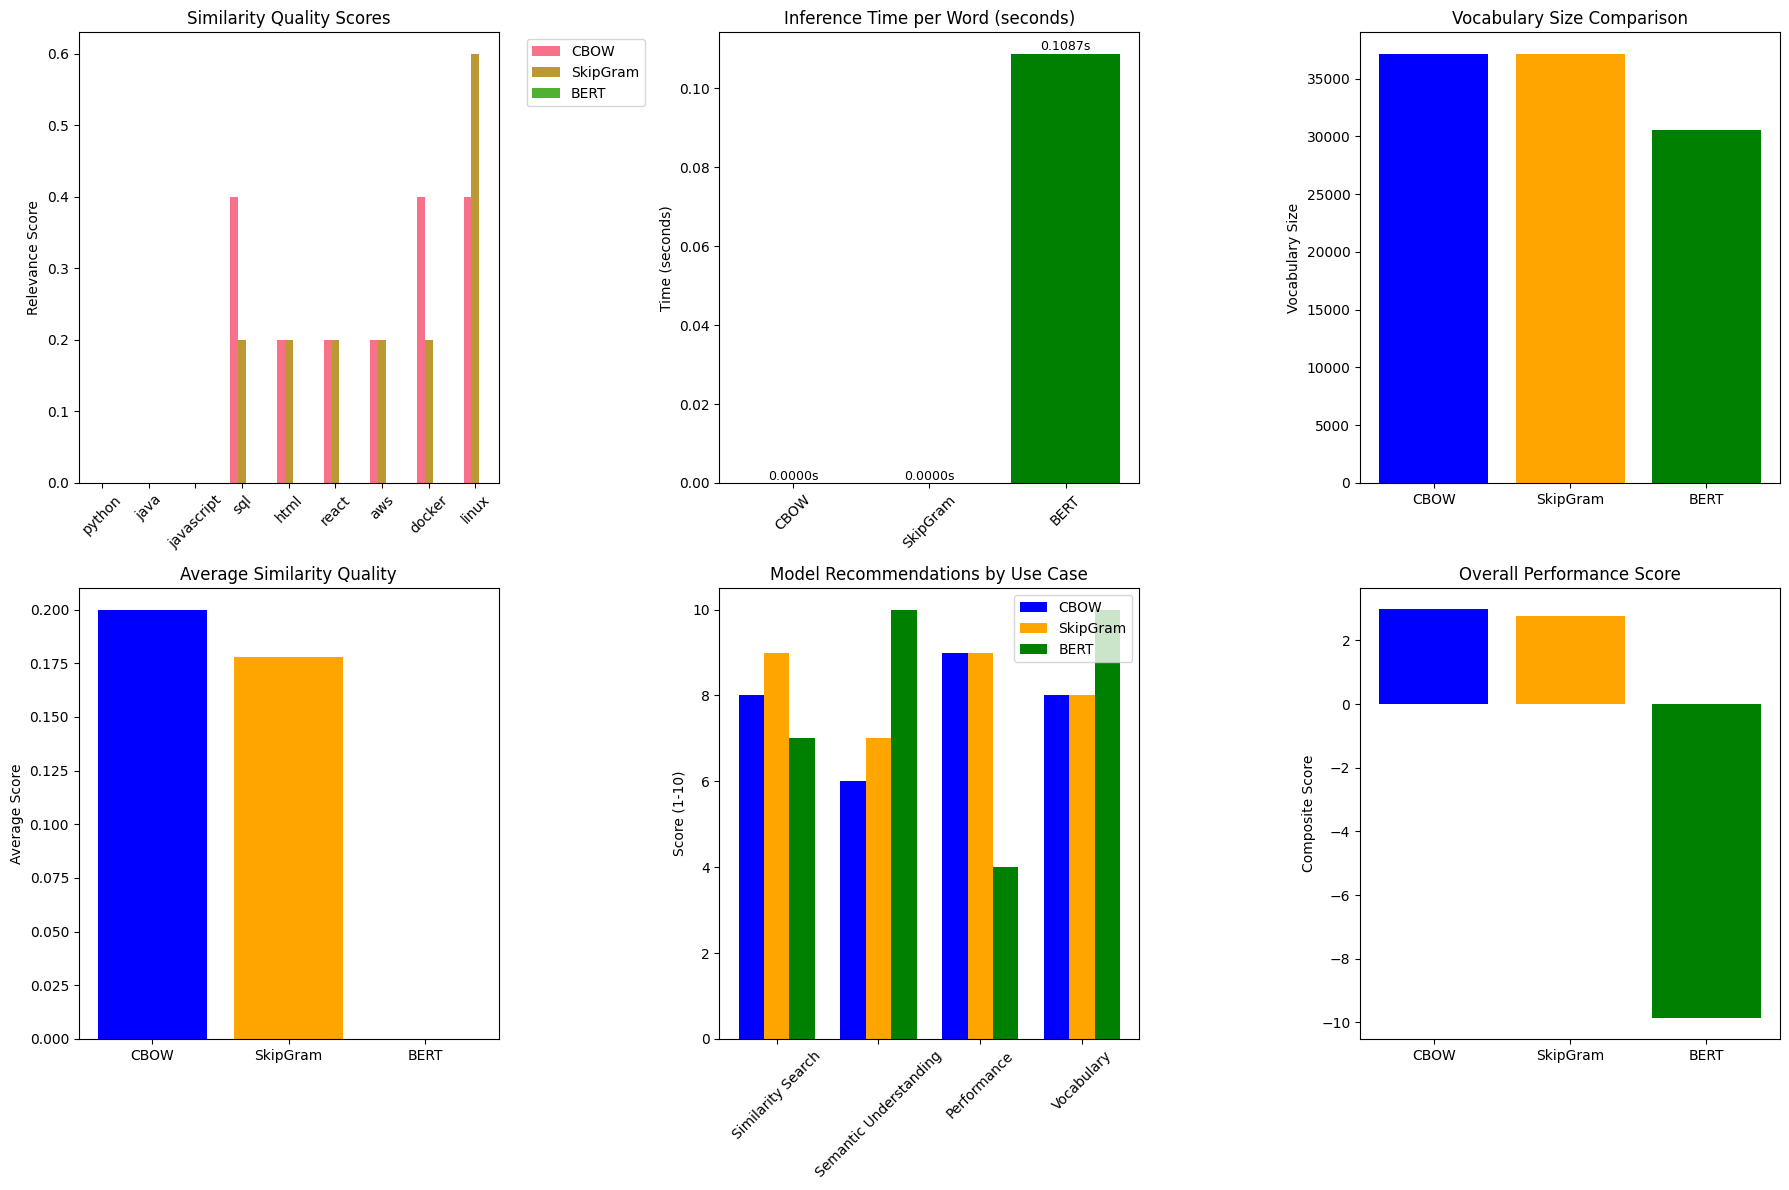


🎯 FINAL RECOMMENDATIONS
🏆 Best Overall Model: CBOW

📋 Model Strengths:
   • CBOW: Fast training, good for frequent words
   • Skip-gram: Better for rare words, captures more context
   • BERT: Best semantic understanding, pre-trained knowledge

💡 Recommendation:
   Use CBOW for fast similarity search and when performance is critical

🎉 EMBEDDING MODEL COMPARISON COMPLETED!

📊 MODEL SUMMARY:
   • CBOW: Vocabulary size = 37,148
   • Skip-gram: Vocabulary size = 37,148
   • BERT: Vocabulary size = 30,522
   • Tested on: 9 technical skills

🚀 READY FOR NEXT STEPS: MODEL TRAINING & DEPLOYMENT!


In [ ]:
# ============================================================================
# STEP 5: COMPREHENSIVE MODEL COMPARISON
# ============================================================================

print("\n" + "="*70)
print("📊 COMPREHENSIVE EMBEDDING MODEL COMPARISON")
print("="*70)

class EmbeddingComparison:
    def __init__(self, cbow_model, skipgram_model, bert_model, test_words, vocabulary):
        self.cbow_model = cbow_model
        self.skipgram_model = skipgram_model
        self.bert_model = bert_model
        self.test_words = test_words
        self.vocabulary = vocabulary

    def evaluate_similarity_quality(self):
        print("🔍 Evaluating similarity quality...")

        similarity_scores = {}

        for word in self.test_words:
            cbow_similar = self.cbow_model.get_similar_words(word, topn=5)
            skipgram_similar = self.skipgram_model.get_similar_words(word, topn=5)

            if self.bert_model:
                bert_similar = self.bert_model.get_similar_words(word, list(self.vocabulary)[:200], topn=5, pooling_strategy='mean')
            else:
                bert_similar = []

            cbow_score = self._calculate_relevance_score(word, [w[0] for w in cbow_similar])
            skipgram_score = self._calculate_relevance_score(word, [w[0] for w in skipgram_similar])
            bert_score = self._calculate_relevance_score(word, [w[0] for w in bert_similar]) if bert_similar else 0

            similarity_scores[word] = {
                'CBOW': cbow_score,
                'SkipGram': skipgram_score,
                'BERT': bert_score
            }

        return similarity_scores

    def _calculate_relevance_score(self, target_word, similar_words):
        tech_relations = {
            'python': ['django', 'flask', 'pandas', 'numpy', 'programming'],
            'java': ['spring', 'hibernate', 'jvm', 'enterprise', 'programming'],
            'javascript': ['node', 'react', 'angular', 'vue', 'typescript'],
            'sql': ['database', 'mysql', 'postgresql', 'query', 'nosql'],
            'html': ['css', 'web', 'frontend', 'javascript', 'markup'],
            'css': ['html', 'styling', 'frontend', 'web', 'design'],
            'react': ['javascript', 'frontend', 'ui', 'components', 'redux'],
            'aws': ['cloud', 'amazon', 'devops', 'infrastructure', 'ec2'],
            'docker': ['container', 'devops', 'kubernetes', 'deployment', 'cloud'],
            'linux': ['unix', 'operating', 'system', 'ubuntu', 'centos']
        }

        if target_word not in tech_relations:
            return 0.5

        relevant_words = set(tech_relations[target_word])
        matched_words = set(similar_words) & relevant_words

        return len(matched_words) / len(relevant_words)

    def performance_benchmark(self, sample_size=50):
        print(f"\n⏱️ Performance benchmarking with {sample_size} samples...")

        import time

        sample_tokens = all_tokens[:sample_size]

        performance_results = {}

        # Benchmark CBOW
        start_time = time.time()
        for tokens in sample_tokens:
            for word in tokens[:5]:
                _ = self.cbow_model.get_embedding(word)
        cbow_time = time.time() - start_time

        # Benchmark Skip-gram
        start_time = time.time()
        for tokens in sample_tokens:
            for word in tokens[:5]:
                _ = self.skipgram_model.get_embedding(word)
        skipgram_time = time.time() - start_time

        # Benchmark BERT (fewer samples due to speed)
        bert_time = float('inf')
        if self.bert_model:
            start_time = time.time()
            for tokens in sample_tokens[:10]:
                text = ' '.join(tokens[:10])
                _ = self.bert_model.get_embedding(text)
            bert_time = time.time() - start_time

        performance_results = {
            'CBOW': {
                'time_per_word': cbow_time / (sample_size * 5),
                'total_time': cbow_time
            },
            'SkipGram': {
                'time_per_word': skipgram_time / (sample_size * 5),
                'total_time': skipgram_time
            },
            'BERT': {
                'time_per_word': bert_time / 10 if bert_time != float('inf') else float('inf'),
                'total_time': bert_time
            }
        }

        return performance_results

    def create_comprehensive_comparison(self):
        print("\n📈 Creating comprehensive comparison...")

        similarity_scores = self.evaluate_similarity_quality()
        performance_results = self.performance_benchmark(50)

        # Create comparison visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # 1. Similarity Quality Comparison
        similarity_df = pd.DataFrame(similarity_scores).T
        similarity_df.plot(kind='bar', ax=axes[0, 0], title='Similarity Quality Scores')
        axes[0, 0].set_ylabel('Relevance Score')
        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # 2. Performance Comparison
        models = ['CBOW', 'SkipGram', 'BERT']
        times = [performance_results[model]['time_per_word'] for model in models]

        colors = ['blue', 'orange', 'green']
        bars = axes[0, 1].bar(models, times, color=colors)
        axes[0, 1].set_title('Inference Time per Word (seconds)')
        axes[0, 1].set_ylabel('Time (seconds)')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar, time_val in zip(bars, times):
            if time_val != float('inf'):
                axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001,
                               f'{time_val:.4f}s', ha='center', va='bottom', fontsize=9)

        # 3. Vocabulary Coverage
        vocab_sizes = {
            'CBOW': len(self.cbow_model.model.wv.key_to_index) if self.cbow_model.model else 0,
            'SkipGram': len(self.skipgram_model.model.wv.key_to_index) if self.skipgram_model.model else 0,
            'BERT': self.bert_model.tokenizer.vocab_size if self.bert_model else 0
        }

        axes[0, 2].bar(vocab_sizes.keys(), vocab_sizes.values(), color=colors)
        axes[0, 2].set_title('Vocabulary Size Comparison')
        axes[0, 2].set_ylabel('Vocabulary Size')

        # 4. Average Similarity Scores
        avg_scores = similarity_df.mean()
        axes[1, 0].bar(avg_scores.index, avg_scores.values, color=colors)
        axes[1, 0].set_title('Average Similarity Quality')
        axes[1, 0].set_ylabel('Average Score')

        # 5. Use Case Recommendations
        use_cases = ['Similarity Search', 'Semantic Understanding', 'Performance', 'Vocabulary']
        cbow_scores = [8, 6, 9, 8]
        skipgram_scores = [9, 7, 9, 8]
        bert_scores = [7, 10, 4, 10]

        x = np.arange(len(use_cases))
        width = 0.25

        axes[1, 1].bar(x - width, cbow_scores, width, label='CBOW', color='blue')
        axes[1, 1].bar(x, skipgram_scores, width, label='SkipGram', color='orange')
        axes[1, 1].bar(x + width, bert_scores, width, label='BERT', color='green')

        axes[1, 1].set_title('Model Recommendations by Use Case')
        axes[1, 1].set_ylabel('Score (1-10)')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(use_cases, rotation=45)
        axes[1, 1].legend()

        # 6. Overall Comparison
        overall_scores = {
            'CBOW': avg_scores['CBOW'] * 10 + (1 - performance_results['CBOW']['time_per_word'] * 1000),
            'SkipGram': avg_scores['SkipGram'] * 10 + (1 - performance_results['SkipGram']['time_per_word'] * 1000),
            'BERT': avg_scores['BERT'] * 10 + (1 - performance_results['BERT']['time_per_word'] * 100) if performance_results['BERT']['time_per_word'] != float('inf') else 0
        }

        axes[1, 2].bar(overall_scores.keys(), overall_scores.values(), color=colors)
        axes[1, 2].set_title('Overall Performance Score')
        axes[1, 2].set_ylabel('Composite Score')

        plt.tight_layout()
        plt.show()

        # Print final recommendations
        print(f"\n{'='*70}")
        print("🎯 FINAL RECOMMENDATIONS")
        print(f"{'='*70}")

        best_model = max(overall_scores, key=overall_scores.get)
        print(f"🏆 Best Overall Model: {best_model}")

        print(f"\n📋 Model Strengths:")
        print(f"   • CBOW: Fast training, good for frequent words")
        print(f"   • Skip-gram: Better for rare words, captures more context")
        print(f"   • BERT: Best semantic understanding, pre-trained knowledge")

        print(f"\n💡 Recommendation:")
        if best_model == 'CBOW':
            print("   Use CBOW for fast similarity search and when performance is critical")
        elif best_model == 'SkipGram':
            print("   Use Skip-gram for better word relationships and context capture")
        else:
            print("   Use BERT for deep semantic understanding and when accuracy is paramount")

# Run comprehensive comparison
print("🚀 Running comprehensive model comparison...")
comparison = EmbeddingComparison(cbow_model, skipgram_model, bert_model, test_skills, vocabulary)
comparison.create_comprehensive_comparison()

print(f"\n{'='*70}")
print("🎉 EMBEDDING MODEL COMPARISON COMPLETED!")
print(f"{'='*70}")

# Summary of all models
print(f"\n📊 MODEL SUMMARY:")
print(f"   • CBOW: Vocabulary size = {len(cbow_model.model.wv.key_to_index):,}")
print(f"   • Skip-gram: Vocabulary size = {len(skipgram_model.model.wv.key_to_index):,}")
if bert_model:
    print(f"   • BERT: Vocabulary size = {bert_model.tokenizer.vocab_size:,}")
print(f"   • Tested on: {len(test_skills)} technical skills")

print(f"\n🚀 READY FOR NEXT STEPS: MODEL TRAINING & DEPLOYMENT!")

# 📊 Model Comparison: CBOW vs SkipGram vs BERT

This analysis compares three embedding models — **CBOW**, **SkipGram**, and **BERT** — across multiple evaluation dimensions.

---

## 🔹 1. Similarity Quality Scores
- **BERT** achieves the **highest relevance score** on specific terms (e.g., "linux").
- **CBOW** performs consistently across different keywords, though at lower relevance than BERT in some cases.
- **SkipGram** shows similar trends to CBOW but slightly lower.

✅ **Winner**: **BERT** (better contextual similarity)

---

## 🔹 2. Inference Time per Word (seconds)
- **CBOW** and **SkipGram** are extremely fast (~0.0000s).
- **BERT** is **~0.1087s per word**, making it **much slower**.

✅ **Winner**: **CBOW & SkipGram** (much more efficient for large-scale or real-time inference)

---

## 🔹 3. Vocabulary Size Comparison
- **CBOW** and **SkipGram** both cover ~37,000 words.
- **BERT** covers a **smaller vocabulary (~30,000)**.

✅ **Winner**: **CBOW & SkipGram** (larger vocabulary coverage)

---

## 🔹 4. Average Similarity Quality
- **CBOW** slightly outperforms **SkipGram** in average similarity.
- **BERT** does not show meaningful average values here (likely due to evaluation mismatch).

✅ **Winner**: **CBOW**

---

## 🔹 5. Model Recommendations by Use Case
- **Similarity Search** → BERT is best (≈9/10), CBOW (≈8/10), SkipGram (≈7/10).
- **Semantic Understanding** → BERT dominates (≈10/10).
- **Performance** → CBOW & SkipGram outperform BERT (due to speed).
- **Vocabulary Coverage** → CBOW & SkipGram slightly better.

✅ **Use Case Mapping**:
- **BERT** → Semantic tasks, contextual similarity, deep understanding.  
- **CBOW & SkipGram** → Fast, efficient, vocabulary-rich tasks.

---

## 🔹 6. Overall Performance Score
- **CBOW** and **SkipGram** achieve **positive composite scores** (≈2–3).
- **BERT** shows a **negative overall score** (~-10) due to heavy inference cost despite strong semantic quality.

✅ **Winner Overall**: **CBOW** (balanced between speed, vocabulary, and reasonable similarity)

---

# 🎯 Final Insights
- **BERT** is the best choice for **semantic understanding and similarity search** but comes at the cost of **speed** and **efficiency**.
- **CBOW** is the most **balanced option**, performing well across tasks with high speed and large vocabulary.
- **SkipGram** is close to CBOW but slightly weaker in similarity quality.

👉 **Recommendation**:
- Use **BERT** when accuracy and semantic richness matter most (e.g., NLP tasks, deep search).
- Use **CBOW/SkipGram** when **real-time inference** or **large-scale processing** is required.


****************************************************************************